In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns=None
pd.options.display.max_rows=None
plt.style.use('fivethirtyeight')

In [2]:
train_transaction=pd.read_csv('train_transaction.csv')
test_transaction=pd.read_csv('test_transaction.csv')

train_identity=pd.read_csv('train_identity.csv')
test_identity=pd.read_csv('test_identity.csv')

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
train_transaction=reduce_mem_usage(train_transaction)
test_transaction=reduce_mem_usage(test_transaction)
train_identity=reduce_mem_usage(train_identity)
test_identity=reduce_mem_usage(test_identity)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 472.59 Mb (68.9% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)


In [5]:
print("Train Transaction shape: {}".format(train_transaction.shape))
print("Test Transaction shape: {}".format(test_transaction.shape))
print("Train Identity shape: {}".format(train_identity.shape))
print("Test Identity shape: {}".format(test_identity.shape))

Train Transaction shape: (590540, 394)
Test Transaction shape: (506691, 393)
Train Identity shape: (144233, 41)
Test Identity shape: (141907, 41)


In [6]:
train=pd.merge(train_transaction,train_identity,on='TransactionID',how='left')
test=pd.merge(test_transaction,test_identity,on='TransactionID',how='left')

In [7]:
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (590540, 434)
Test shape: (506691, 433)


In [8]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [9]:
test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224       31.953125         W  10409  111.0   
1        3663550       18403263       49.000000         W   4272  111.0   
2        3663551       18403310      171.000000         W   4476  574.0   
3        3663552       18403310      285.000000         W  10989  360.0   
4        3663553       18403317       67.937500         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2636.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN  F    F    T    T  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
print(round((sum(train_identity['TransactionID'].isin(train_transaction['TransactionID'].unique())))/len(train_transaction),4)*100,'% data in test_transaction have data with test_identity')
print(round((sum(test_identity['TransactionID'].isin(test_transaction['TransactionID'].unique())))/len(test_transaction),4)*100,'% data in test_transaction have data with test_identity')

24.42 % data in test_transaction have data with test_identity
28.01 % data in test_transaction have data with test_identity


In [11]:
print("There are ",train.isnull().any().sum()," columns with missing values in the train data")
print("There are ",test.isnull().any().sum()," columns with missing values in the test data")

There are  414  columns with missing values in the train data
There are  385  columns with missing values in the test data


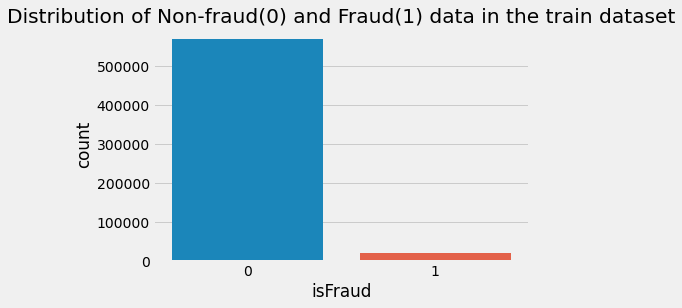

3.5 % of the cases in the train dataset are fraud


In [12]:
ax=sns.countplot(train.isFraud,order=train.isFraud.value_counts().index)
plt.title('Distribution of Non-fraud(0) and Fraud(1) data in the train dataset')
plt.show()
print(round(len(train[train.isFraud==1])/len(train)*100,2),"% of the cases in the train dataset are fraud")

# DATA EXPLORATION

TransactionDT(Given:timedelta from a given reference datetime)

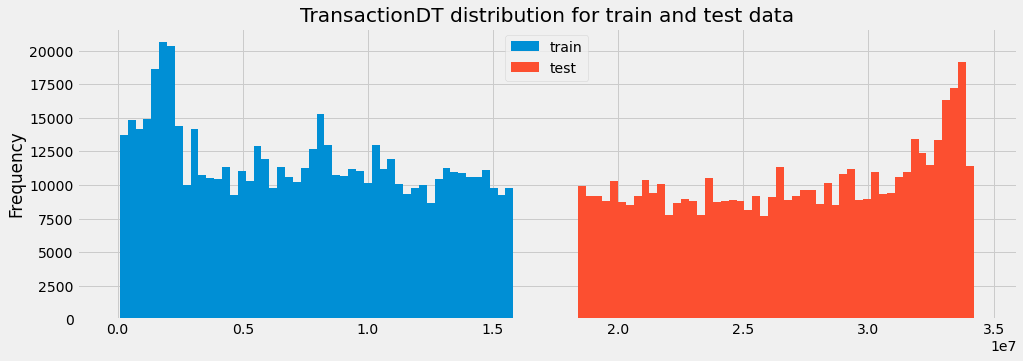

In [13]:
train.TransactionDT.plot(kind='hist',figsize=(15,5),bins=50,label='train',title="TransactionDT distribution for train and test data")
test.TransactionDT.plot(kind='hist',bins=50,label='test')
plt.legend()
plt.show()

The train and the test data seems to be a timedelta for a given reference datetime. There are few datapoints which are missing in the middle.

In [14]:
print('Minimum timedelta in train is',train.TransactionDT.min(),'seconds')
print('Maximum timedelta in train is',train.TransactionDT.max(),'seconds')
print('Minimum timedelta in test is',test.TransactionDT.min(),'seconds')
print('Maximum timedelta in train is',test.TransactionDT.max(),'seconds')
print('Difference between maximum timedelta in test and minimum timedelta in train is',test.TransactionDT.max()-train.TransactionDT.min(),'seconds')
print('Difference between maximum timedelta in test and minimum timedelta in train is',(test.TransactionDT.max()-train.TransactionDT.min())/(60*60*24),'days')

Minimum timedelta in train is 86400 seconds
Maximum timedelta in train is 15811131 seconds
Minimum timedelta in test is 18403224 seconds
Maximum timedelta in train is 34214345 seconds
Difference between maximum timedelta in test and minimum timedelta in train is 34127945 seconds
Difference between maximum timedelta in test and minimum timedelta in train is 394.99936342592594 days


TransactionAmt

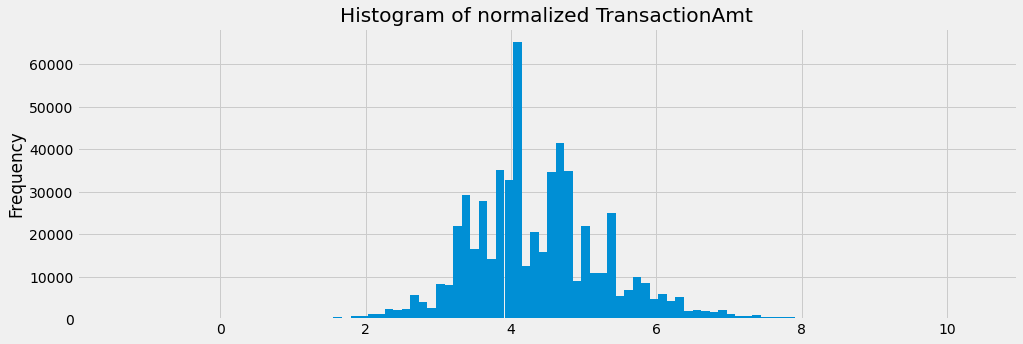

In [15]:
plt.figure(figsize=(15,5))
train.TransactionAmt.apply(np.log).plot(kind='hist',bins=100)
plt.title('Histogram of normalized TransactionAmt')
plt.show()

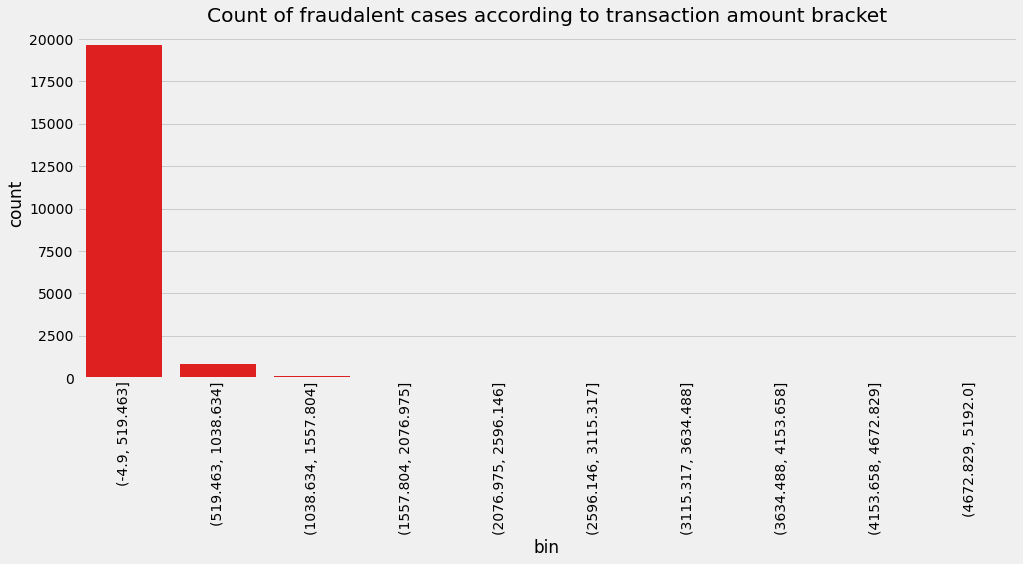

In [16]:
plt.figure(figsize=(15,6))
trans_amount_bin=pd.cut(train.TransactionAmt.loc[train.isFraud==1],bins=10)
trans_amount_bin=pd.DataFrame(trans_amount_bin.value_counts()).reset_index().rename(columns={'index':'bin','TransactionAmt':'count'})
sns.barplot(x='bin',y='count',data=trans_amount_bin,color='red')
plt.title('Count of fraudalent cases according to transaction amount bracket')
plt.xticks(rotation=(90))
plt.show()

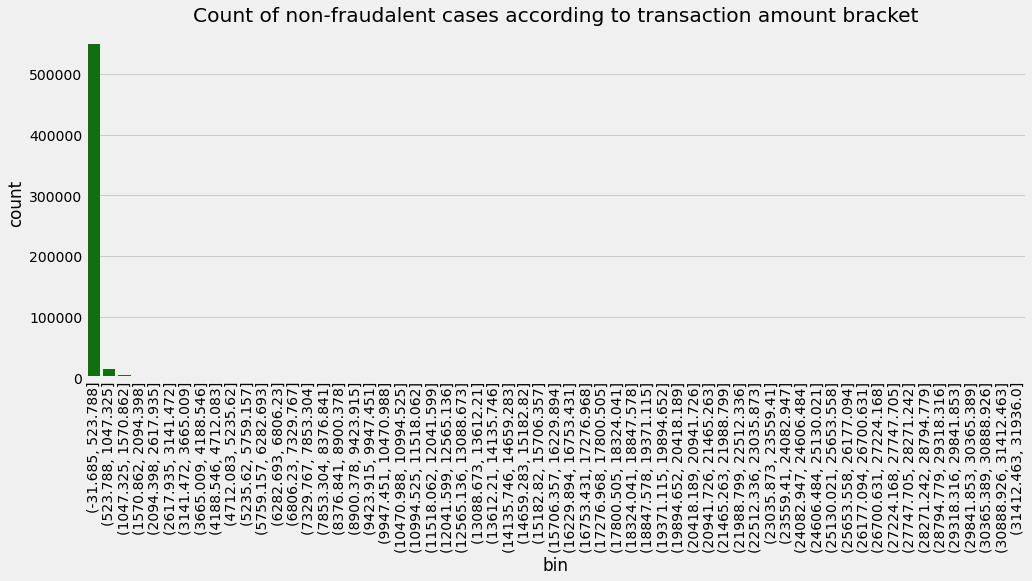

In [17]:
plt.figure(figsize=(15,6))
trans_amount_bin_nonfraud=pd.cut(train.TransactionAmt.loc[train.isFraud==0],bins=61)
trans_amount_bin_nonfraud=pd.DataFrame(trans_amount_bin_nonfraud.value_counts()).reset_index().rename(columns={'index':'bin','TransactionAmt':'count'})
sns.barplot(x='bin',y='count',data=trans_amount_bin_nonfraud,color='green')
plt.title('Count of non-fraudalent cases according to transaction amount bracket')
plt.xticks(rotation=(90))
plt.show()

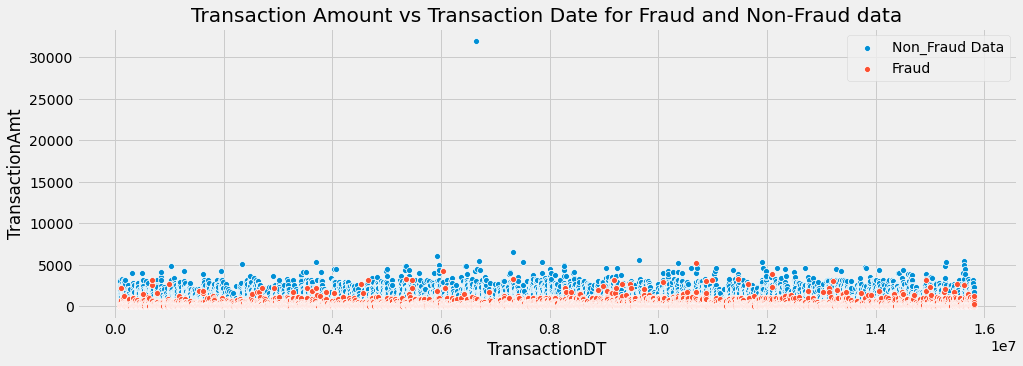

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='TransactionDT',y='TransactionAmt',data=train,label='Non_Fraud Data')
fraud=train[train.isFraud==1]
sns.scatterplot(x='TransactionDT',y='TransactionAmt',data=fraud,label='Fraud')
plt.title('Transaction Amount vs Transaction Date for Fraud and Non-Fraud data')
plt.show()

ProductCD

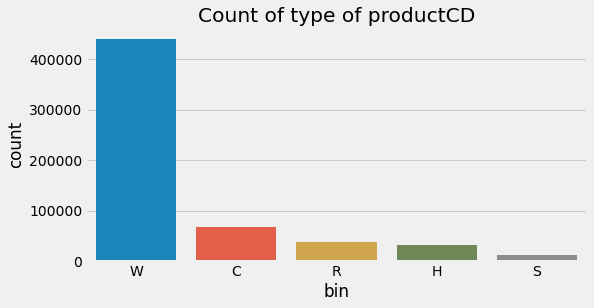

In [19]:
tran_ProductCD=pd.DataFrame(train.ProductCD.value_counts()).reset_index().rename(columns={'index':'bin','ProductCD':'count'})
plt.figure(figsize=(8,4))
sns.barplot(x='bin',y='count',data=tran_ProductCD)
plt.title('Count of type of productCD')
plt.show()

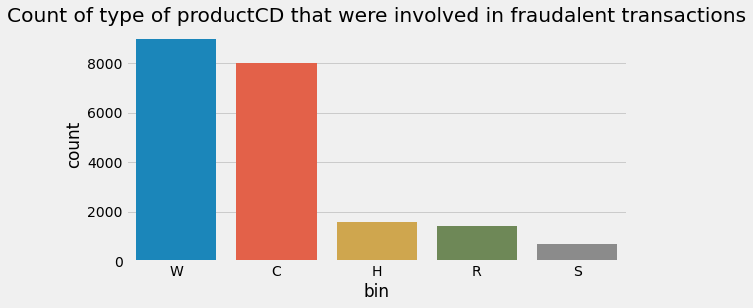

In [20]:
tran_ProductCD=pd.DataFrame(train.ProductCD.loc[train.isFraud==1].value_counts()).reset_index().rename(columns={'index':'bin','ProductCD':'count'})
plt.figure(figsize=(8,4))
sns.barplot(x='bin',y='count',data=tran_ProductCD)
plt.title('Count of type of productCD that were involved in fraudalent transactions')
plt.show()

Function for analysis

In [21]:
def analysis_categorical(card,num_features,fig_r=15,fig_c=25,rotate=90):
    print('Missing data in ',card, ': ',(train[card].isna().sum()/len(train[card])*100).round(3),'%')
    print('Count of ',num_features,' ',card,'types for fraud and non-fraud')
    card_type_fraud=pd.DataFrame(train[card].loc[train.isFraud==1].value_counts(dropna=False).head(num_features)).reset_index().rename(columns={'index':'card_type_fraud',card:'count'})
    card_type_non_fraud=pd.DataFrame(train[card].loc[train.isFraud==0].value_counts(dropna=False).head(num_features)).reset_index().rename(columns={'index':'card_type_non_fraud',card:'count'})
    #plt.figure(figsize=(12,5))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_r, fig_c))
    plt.title(card)
    sns.barplot('card_type_fraud','count',data=card_type_fraud,ax=ax1,palette='rocket')
    sns.barplot('card_type_non_fraud','count',data=card_type_non_fraud,ax=ax2,palette='rocket')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=rotate)
    plt.show()
    
def analysis_numerical(card,fig_r=15,fig_c=20,rotate=90):
    print('Missing data in ',card, ': ',(train[card].isna().sum()/len(train[card])*100).round(3),'%')
    print('Distribution of ',card,'(Red: Fraud| Green: Non Fraud)')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_r, fig_c))
    plt.title('Fraud- Red | Non-fraud- Green')
    sns.distplot(train[card].loc[train.isFraud==1],bins=50,kde=None,ax=ax1,label='Fraud',color='red')
    sns.distplot(train[card].loc[train.isFraud==0],bins=50,kde=None,ax=ax2,label='Non Fraud',color='green')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=rotate)
    plt.legend()
    plt.show()

card1-card6

In [22]:
card=[c for c in train.columns if 'card' in c]
train[card].describe()

card1     card2     card3     card5
count  590540.000000  581607.0  588975.0  586281.0
mean     9898.734658       NaN       NaN       NaN
std      4901.170153       NaN       0.0       0.0
min      1000.000000     100.0     100.0     100.0
25%      6019.000000     214.0     150.0     166.0
50%      9678.000000     361.0     150.0     226.0
75%     14184.000000     512.0     150.0     226.0
max     18396.000000     600.0     231.0     237.0

card4 and card6 are categorical

Missing data in  card1 :  0.0 %
Distribution of  card1 (Red: Fraud| Green: Non Fraud)


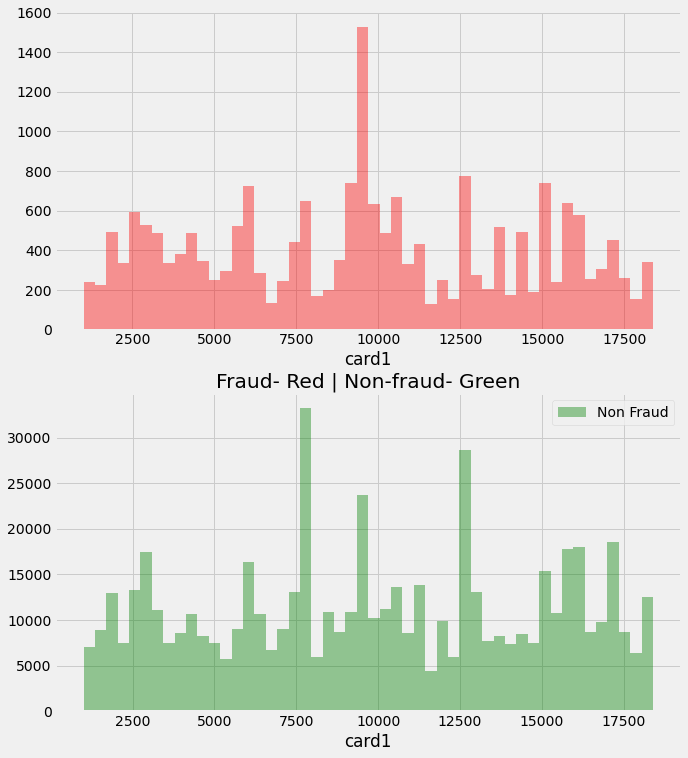

In [23]:
analysis_numerical(card='card1',fig_r=10,fig_c=12,rotate=0)

Missing data in  card2 :  1.513 %
Distribution of  card2 (Red: Fraud| Green: Non Fraud)


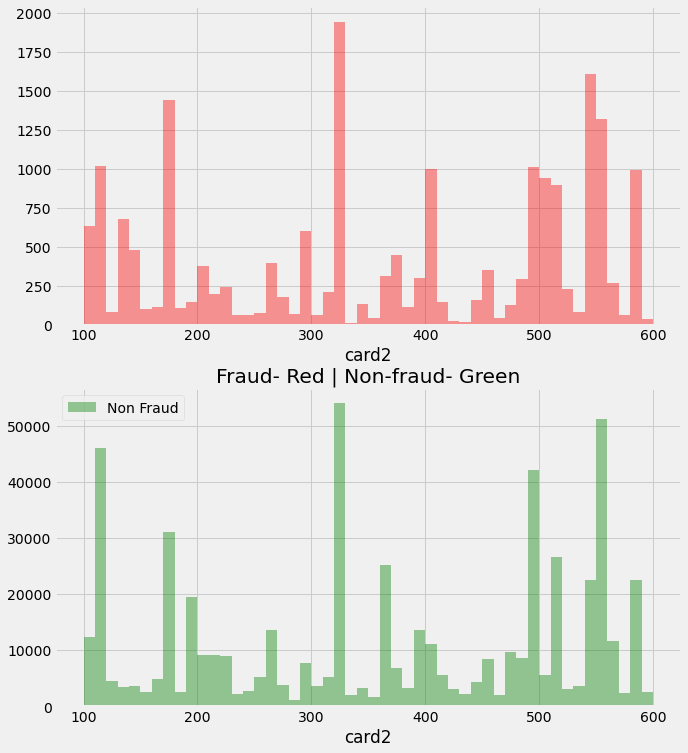

In [24]:
analysis_numerical(card='card2',fig_r=10,fig_c=12,rotate=0)

Missing data in  card3 :  0.265 %
Distribution of  card3 (Red: Fraud| Green: Non Fraud)


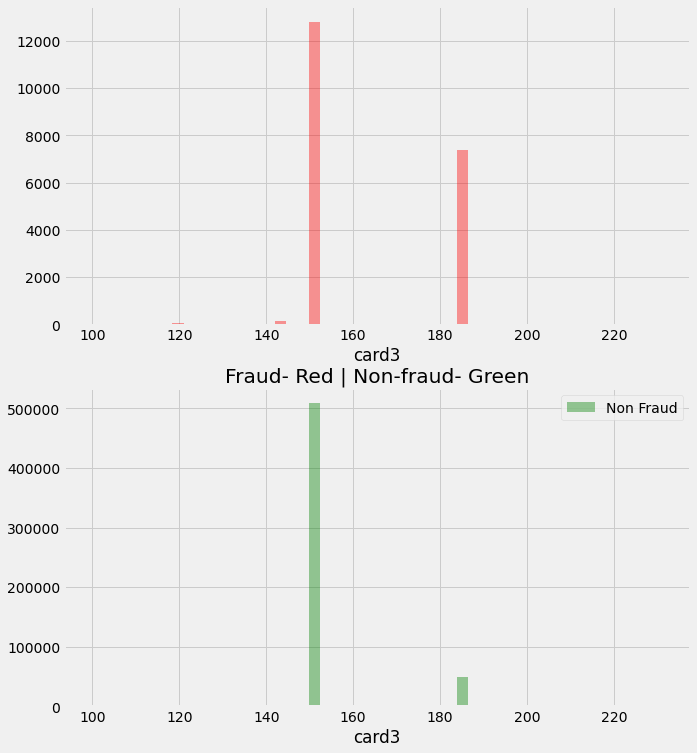

In [25]:
analysis_numerical(card='card3',fig_r=10,fig_c=12,rotate=0)

Missing data in  card4 :  0.267 %
Count of  4   card4 types for fraud and non-fraud


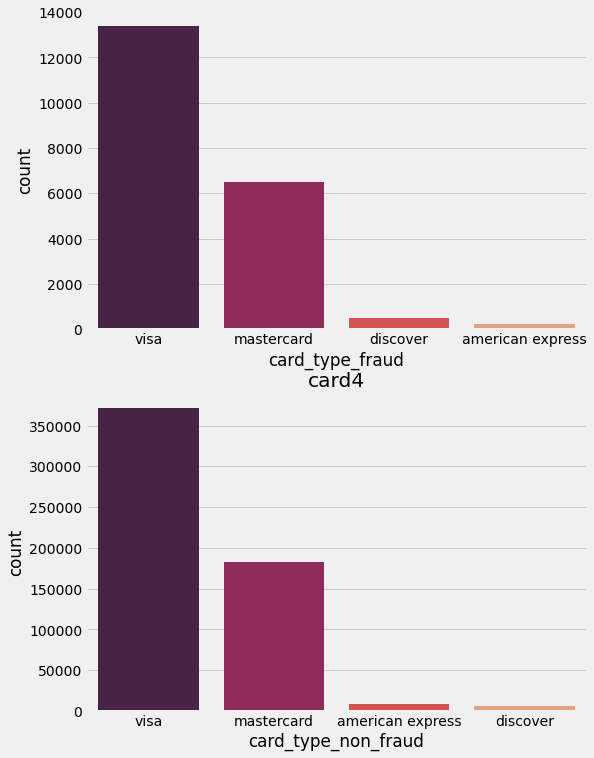

In [26]:
analysis_categorical(card='card4',num_features=4,fig_r=8,fig_c=12,rotate=0)

Missing data in  card5 :  0.721 %
Distribution of  card5 (Red: Fraud| Green: Non Fraud)


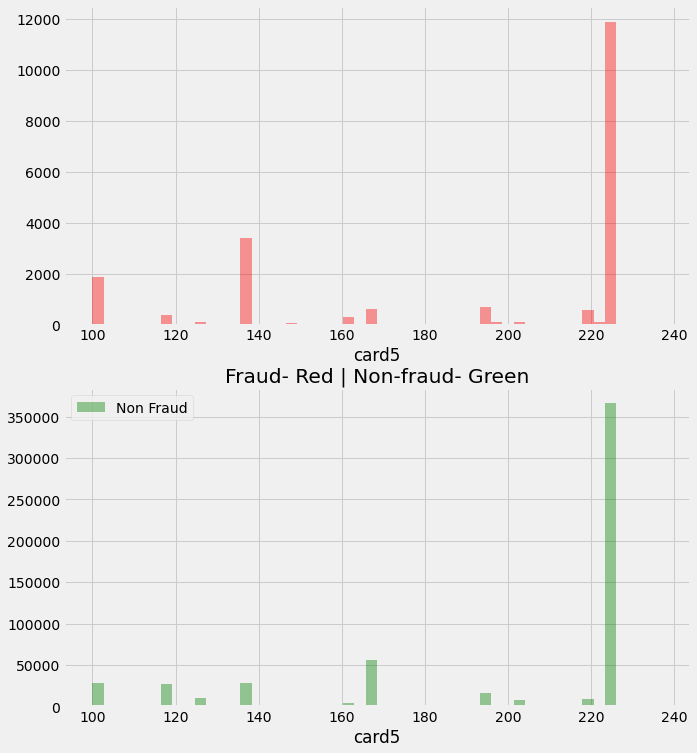

In [27]:
analysis_numerical('card5',fig_r=10,fig_c=12,rotate=0)

Missing data in  card6 :  0.266 %
Count of  2   card6 types for fraud and non-fraud


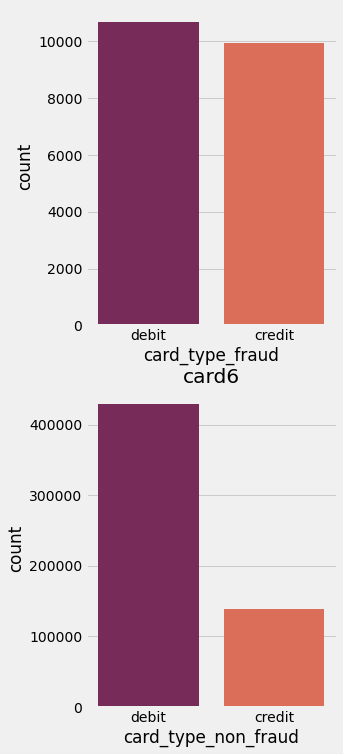

In [28]:
analysis_categorical('card6',2,fig_r=4,fig_c=12,rotate=0)

addr1 & addr2 [Given:categorical features]

Missing data in  addr1 :  11.126 %
Count of  20   addr1 types for fraud and non-fraud


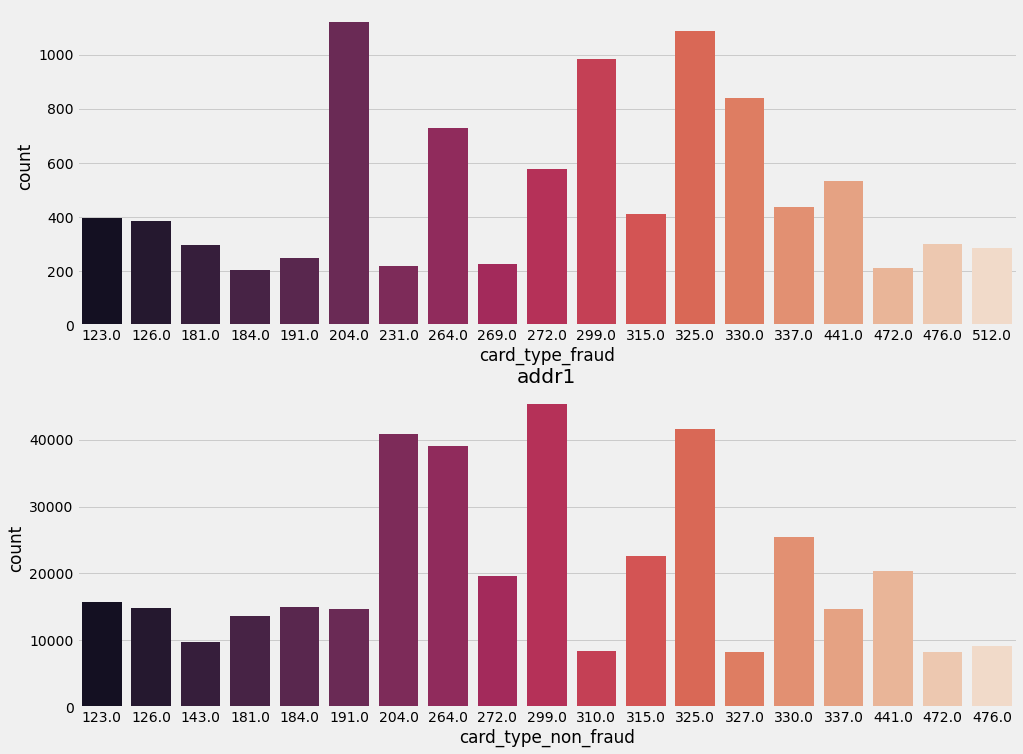

In [29]:
analysis_categorical('addr1',20,rotate=0,fig_c=12)

Missing data in  addr2 :  11.126 %
Count of  20   addr2 types for fraud and non-fraud


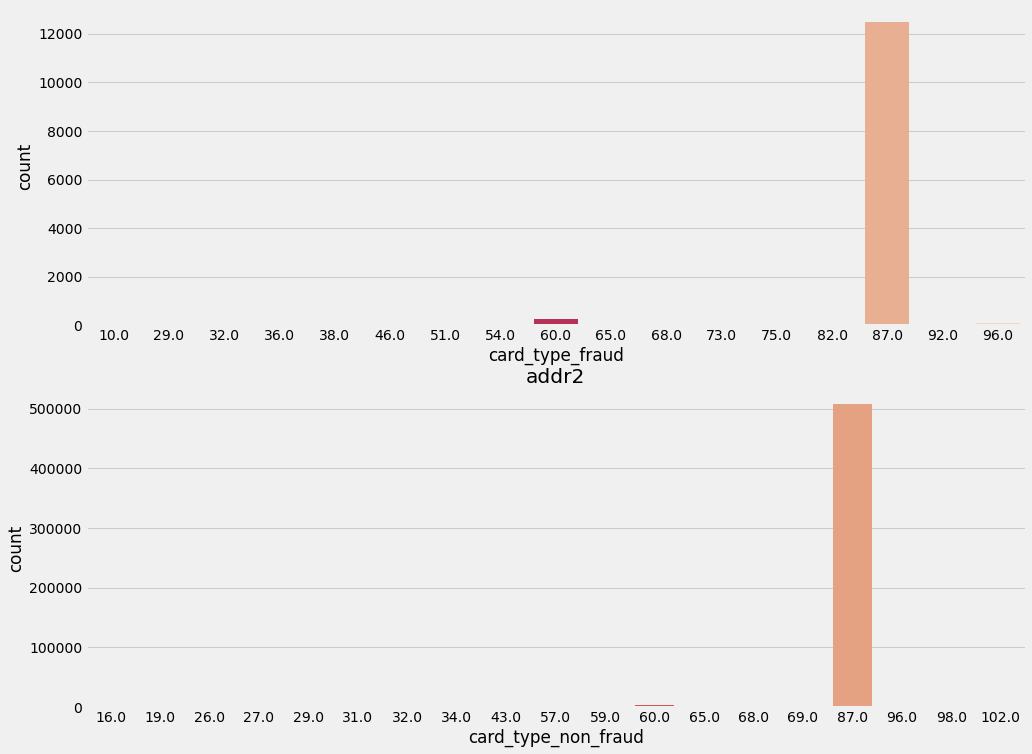

In [30]:
analysis_categorical('addr2',20,rotate=0,fig_c=12)

dist1 & dist2

Missing data in  dist1 :  59.652 %
Distribution of  dist1 (Red: Fraud| Green: Non Fraud)


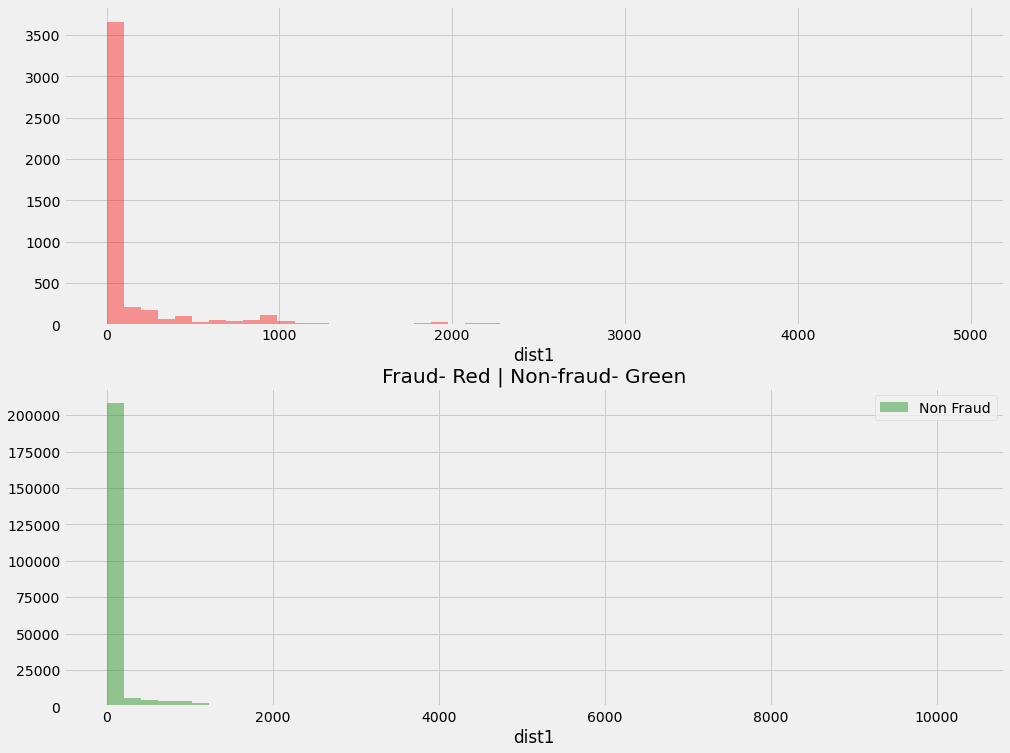

In [31]:
analysis_numerical('dist1',rotate=0,fig_c=12)

Almost 60% missing data in dist1 and majority of the distances are close to 0

Missing data in  dist2 :  93.628 %
Distribution of  dist2 (Red: Fraud| Green: Non Fraud)


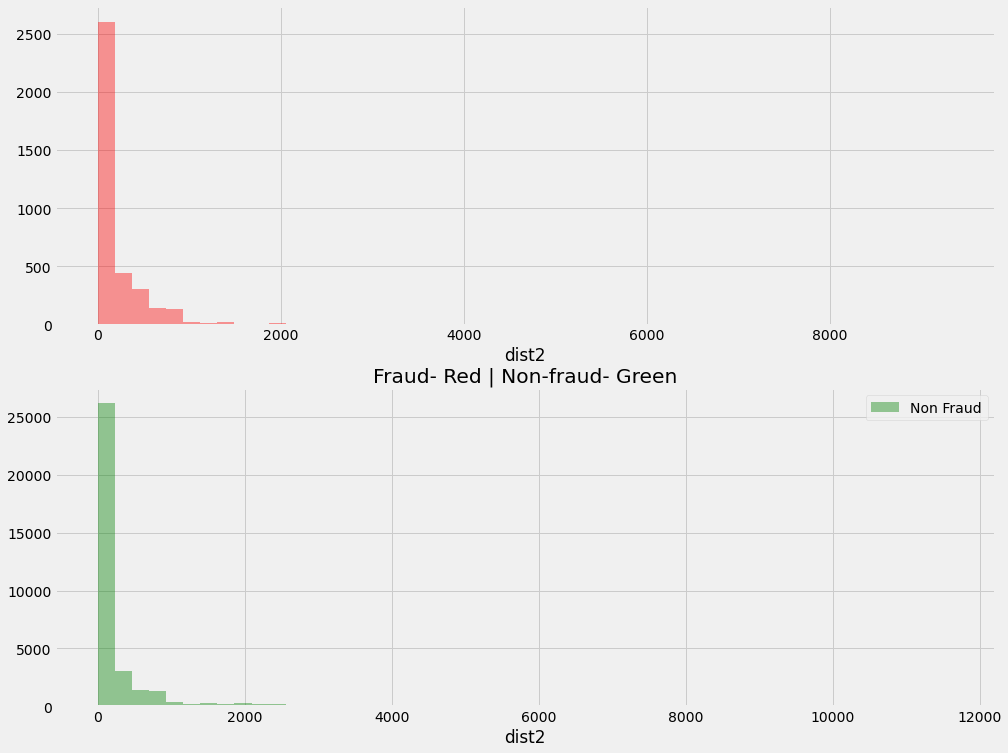

In [32]:
analysis_numerical('dist2',rotate=0,fig_c=12)

Almost 94% missing data in dist2 and majority of the distances are close to 0

P_emaildomain[Purchaser Email Domain]

In [33]:
train.P_emaildomain.nunique()

59

In [34]:
train.P_emaildomain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [35]:
train.P_emaildomain.replace({'gmail':'gmail.com',
 'yahoo.com.mx':'yahoo.com',
 'yahoo.fr':'yahoo.com', 
 'yahoo.de':'yahoo.com', 
 'yahoo.es':'yahoo.com',
'yahoo.co.uk':'yahoo.com',
'yahoo.co.jp':'yahoo.com',
'hotmail.fr':'hotmail.com',
 'hotmail.de':'hotmail.com',
 'hotmail.co.uk':'hotmail.com'},inplace=True)

In [36]:
train.P_emaildomain.nunique()

49

Missing data in  P_emaildomain :  15.995 %
Count of  10   P_emaildomain types for fraud and non-fraud


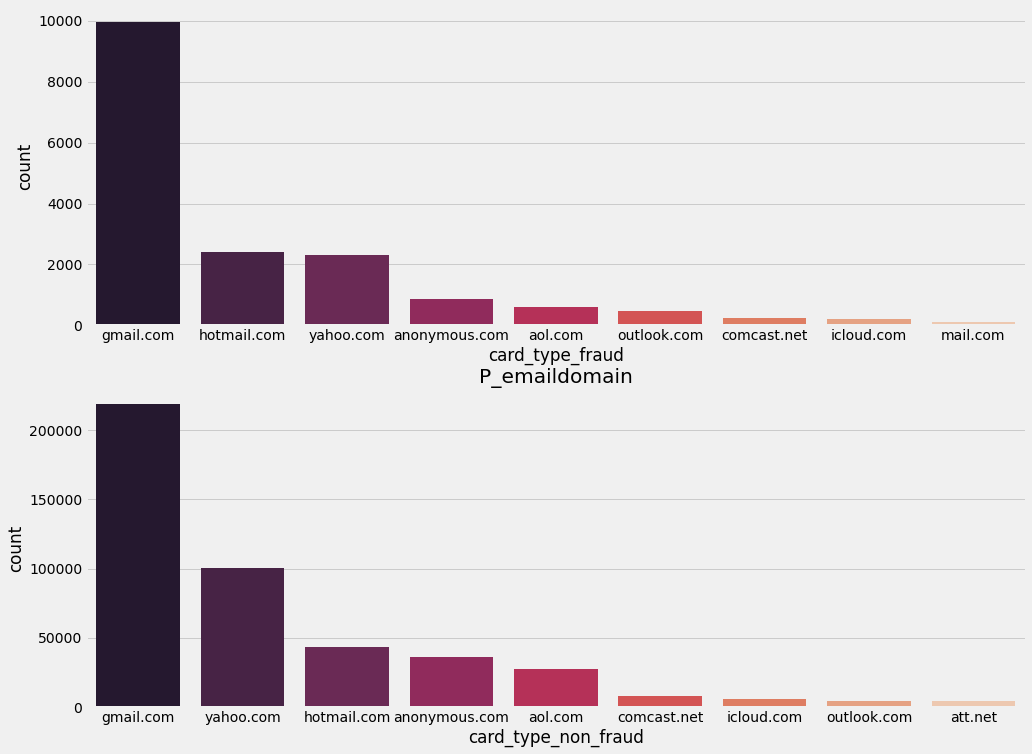

In [37]:
analysis_categorical('P_emaildomain',10,fig_r=15,fig_c=12,rotate=0)

R_emaildomain[Receiver Email Domain]

In [38]:
train.R_emaildomain.nunique()

60

In [39]:
train.R_emaildomain.unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [40]:
train.R_emaildomain.replace({'gmail':'gmail.com',
 'yahoo.com.mx':'yahoo.com',
 'yahoo.fr':'yahoo.com', 
 'yahoo.de':'yahoo.com', 
 'yahoo.es':'yahoo.com',
'yahoo.co.uk':'yahoo.com',
'yahoo.co.jp':'yahoo.com',
'hotmail.fr':'hotmail.com',
 'hotmail.de':'hotmail.com',
 'hotmail.co.uk':'hotmail.com'},inplace=True)

In [41]:
train.R_emaildomain.nunique()

50

Missing data in  R_emaildomain :  76.752 %
Count of  10   R_emaildomain types for fraud and non-fraud


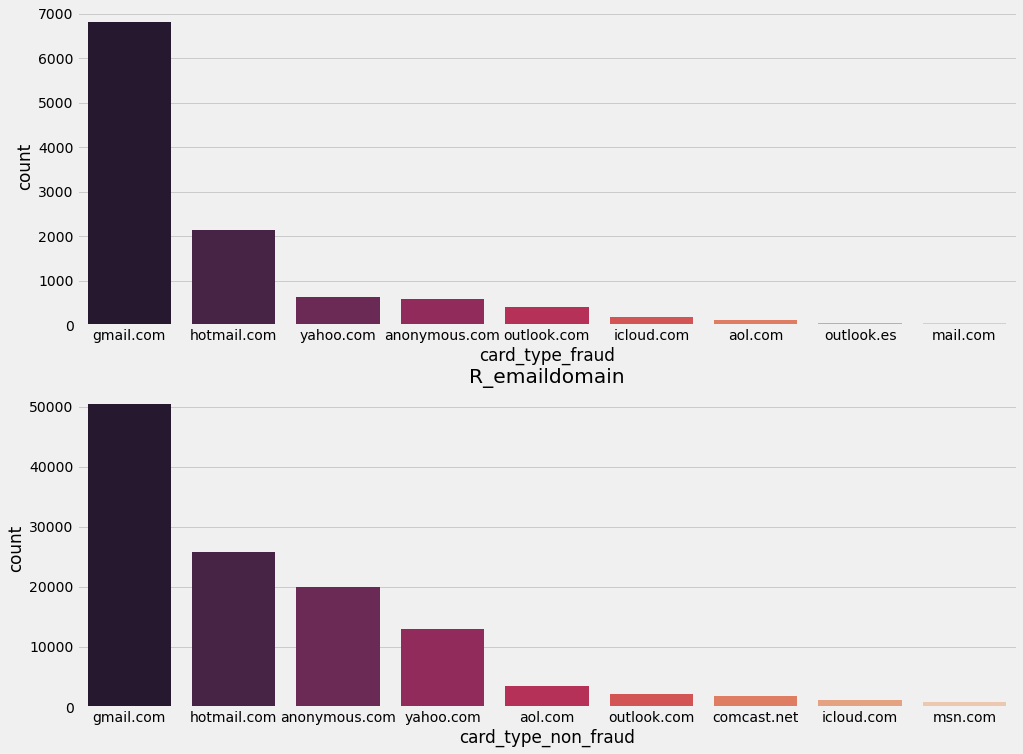

In [42]:
analysis_categorical('R_emaildomain',10,fig_r=15,fig_c=12,rotate=0)

Almost 77% of the data is missing

C1-C14


Given:
    C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [43]:
C=[c for c in train.columns if 'C' in c]
C=C[1:]
train[C].head()

C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0
1  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0
3  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0

In [44]:
train[C].describe()

C1        C2             C3        C4        C5        C6  \
count  590540.0  590540.0  590540.000000  590540.0  590540.0  590540.0   
mean        NaN       NaN       0.005650       NaN       NaN       NaN   
std         NaN       NaN       0.150635       NaN       NaN       NaN   
min         0.0       0.0       0.000000       0.0       0.0       0.0   
25%         1.0       1.0       0.000000       0.0       0.0       1.0   
50%         1.0       1.0       0.000000       0.0       0.0       1.0   
75%         3.0       3.0       0.000000       0.0       1.0       2.0   
max      4684.0    5692.0      26.000000    2252.0     349.0    2252.0   

             C7        C8        C9       C10       C11       C12       C13  \
count  590540.0  590540.0  590540.0  590540.0  590540.0  590540.0  590540.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         NaN       NaN       0.0       NaN       NaN       NaN       NaN   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       1.0       0.0       1.0   
50%         0.0       0.0       1.0       0.0       1.0       0.0       3.0   
75%         0.0       0.0       2.0       0.0       2.0       0.0      12.0   
max      2256.0    3332.0     210.0    3256.0    3188.0    3188.0    2918.0   

            C14  
count  590540.0  
mean        NaN  
std         NaN  
min         0.0  
25%         1.0  
50%         1.0  
75%         2.0  
max      1429.0

Missing data in  C1 :  0.0 %
Count of  10   C1 types for fraud and non-fraud


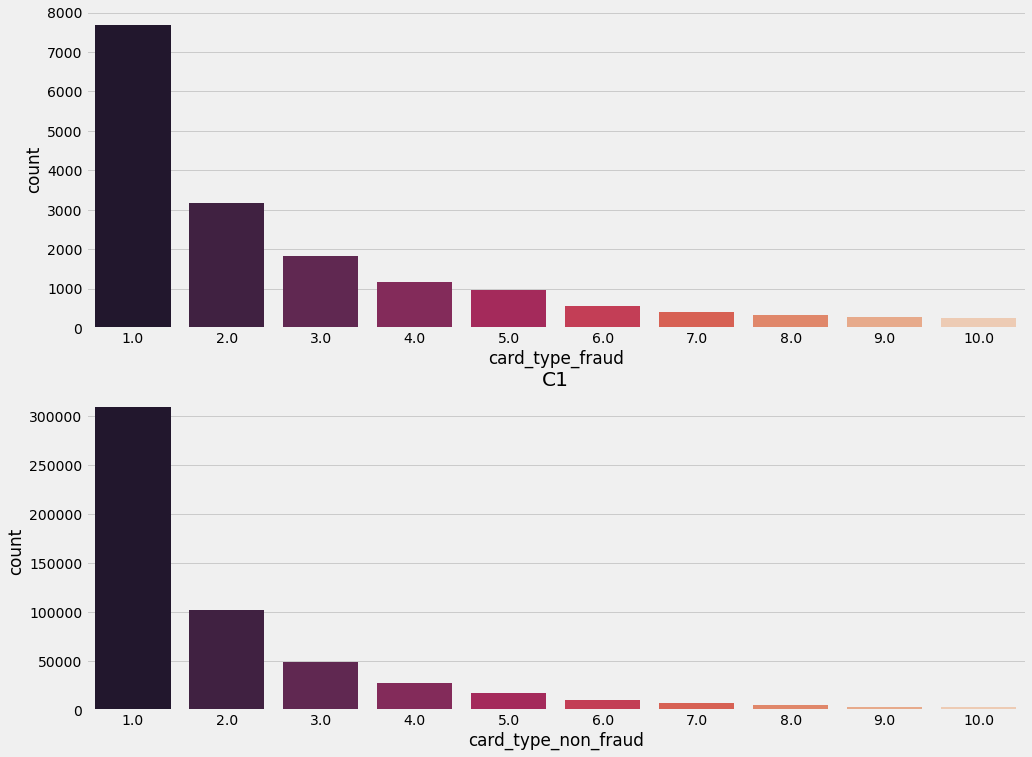

Missing data in  C2 :  0.0 %
Count of  10   C2 types for fraud and non-fraud


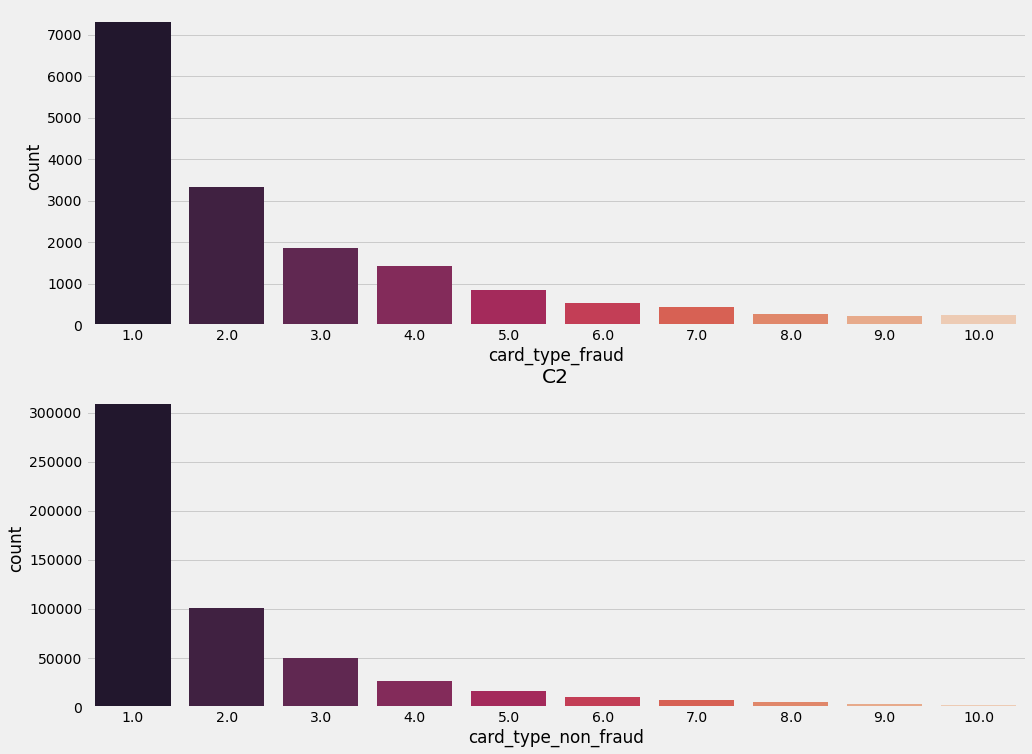

Missing data in  C3 :  0.0 %
Count of  10   C3 types for fraud and non-fraud


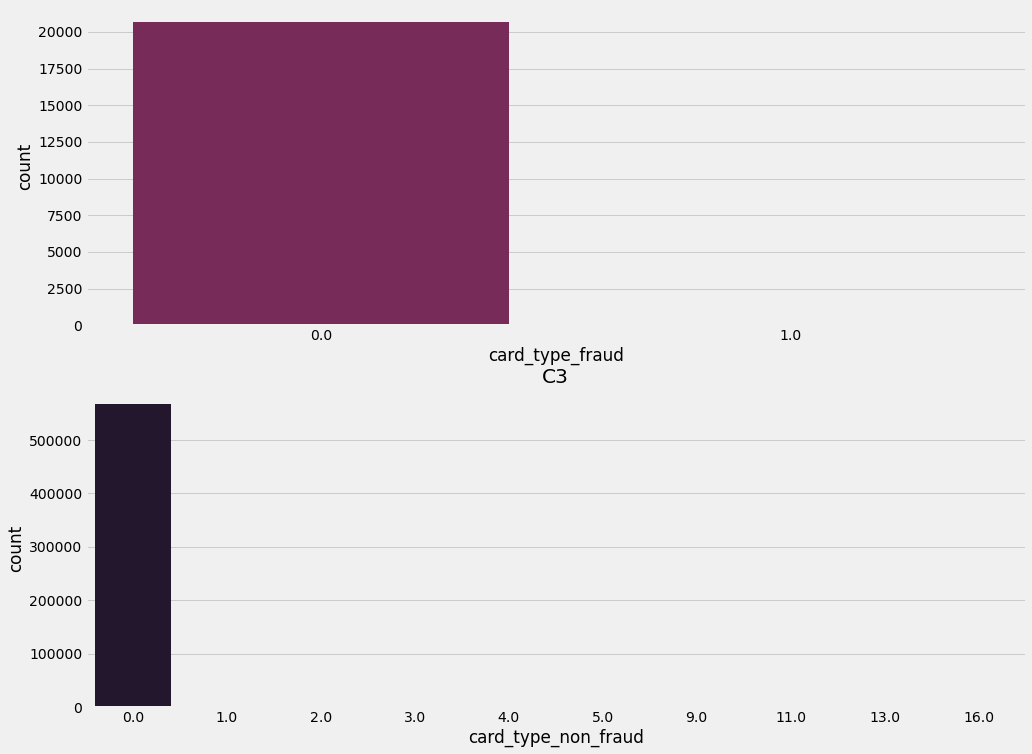

Missing data in  C4 :  0.0 %
Count of  10   C4 types for fraud and non-fraud


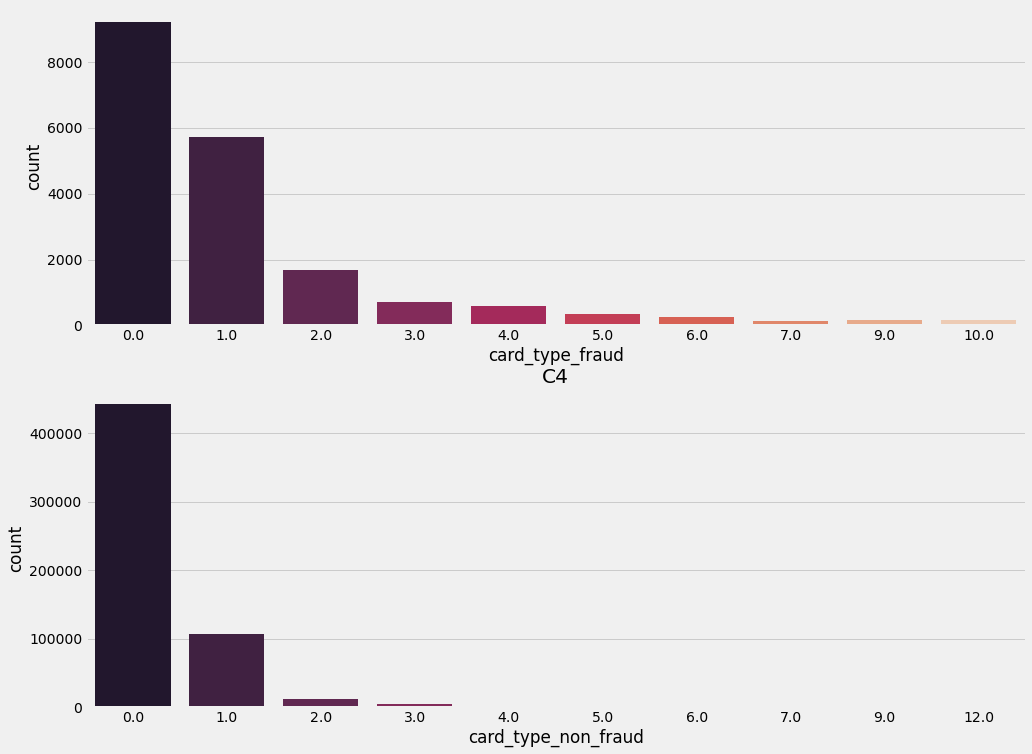

Missing data in  C5 :  0.0 %
Count of  10   C5 types for fraud and non-fraud


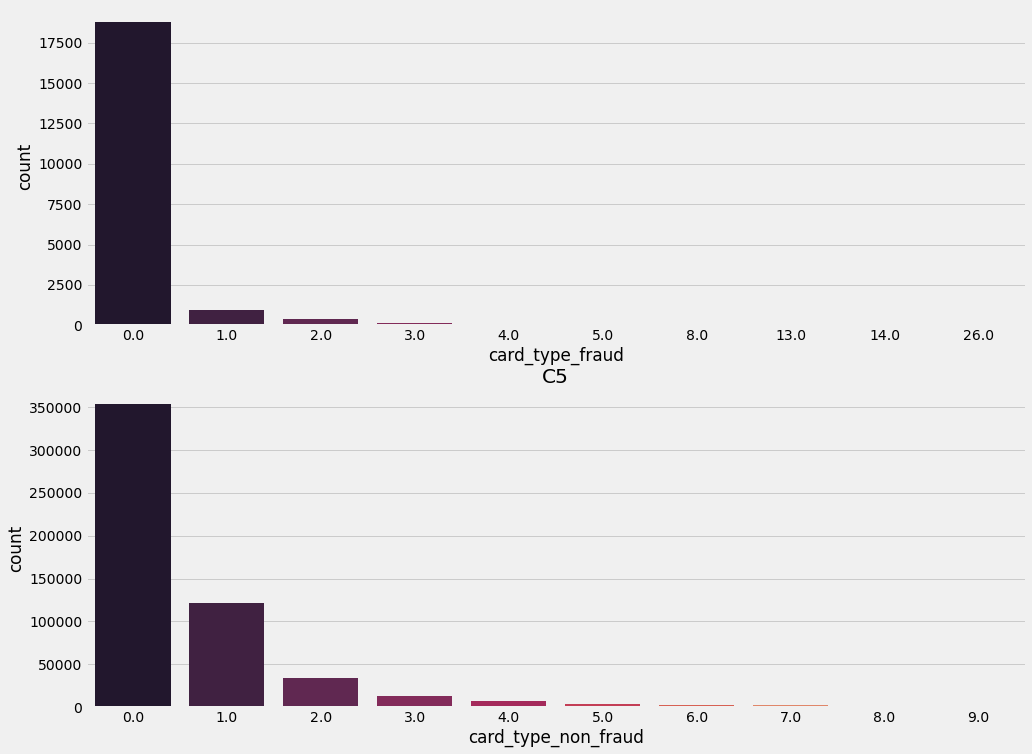

Missing data in  C6 :  0.0 %
Count of  10   C6 types for fraud and non-fraud


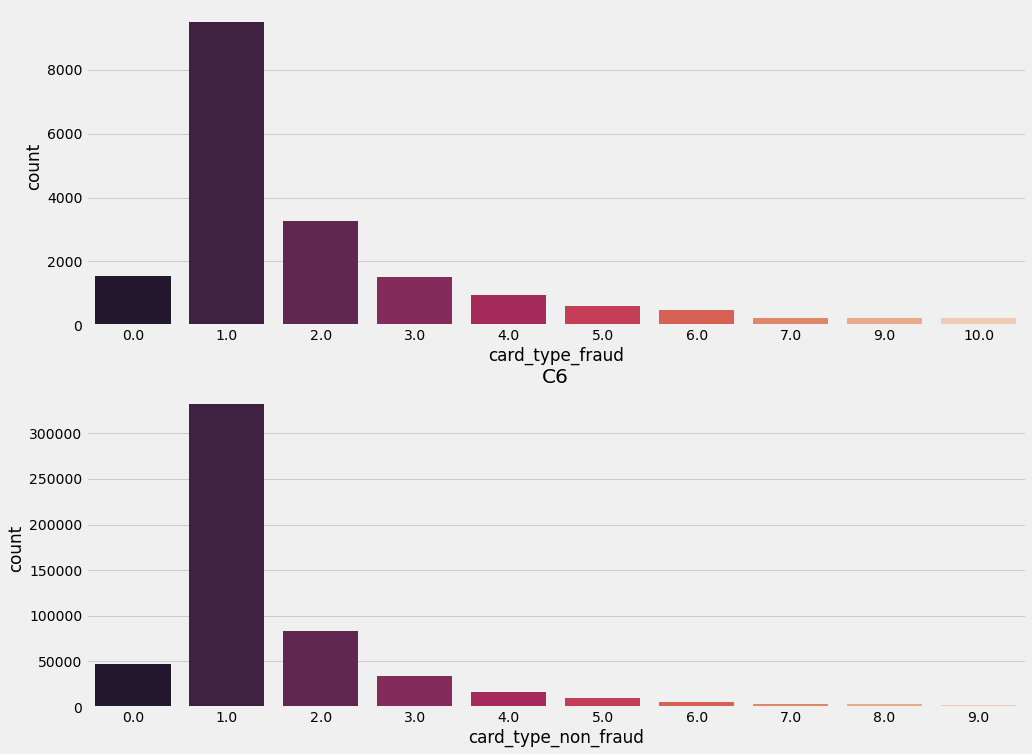

Missing data in  C7 :  0.0 %
Count of  10   C7 types for fraud and non-fraud


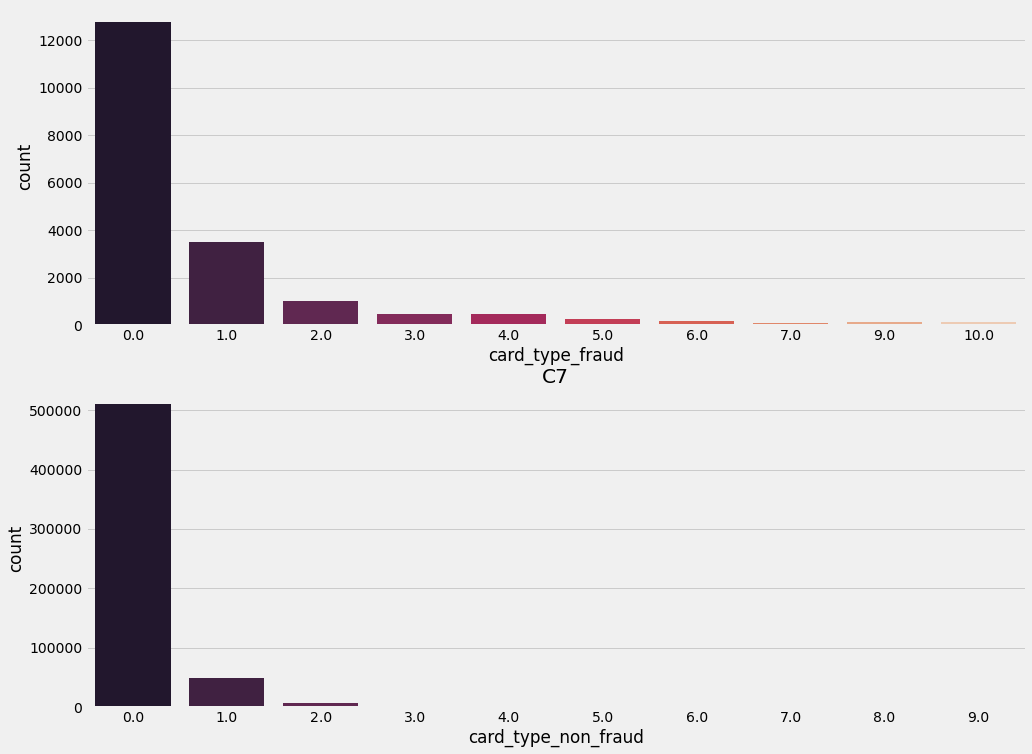

Missing data in  C8 :  0.0 %
Count of  10   C8 types for fraud and non-fraud


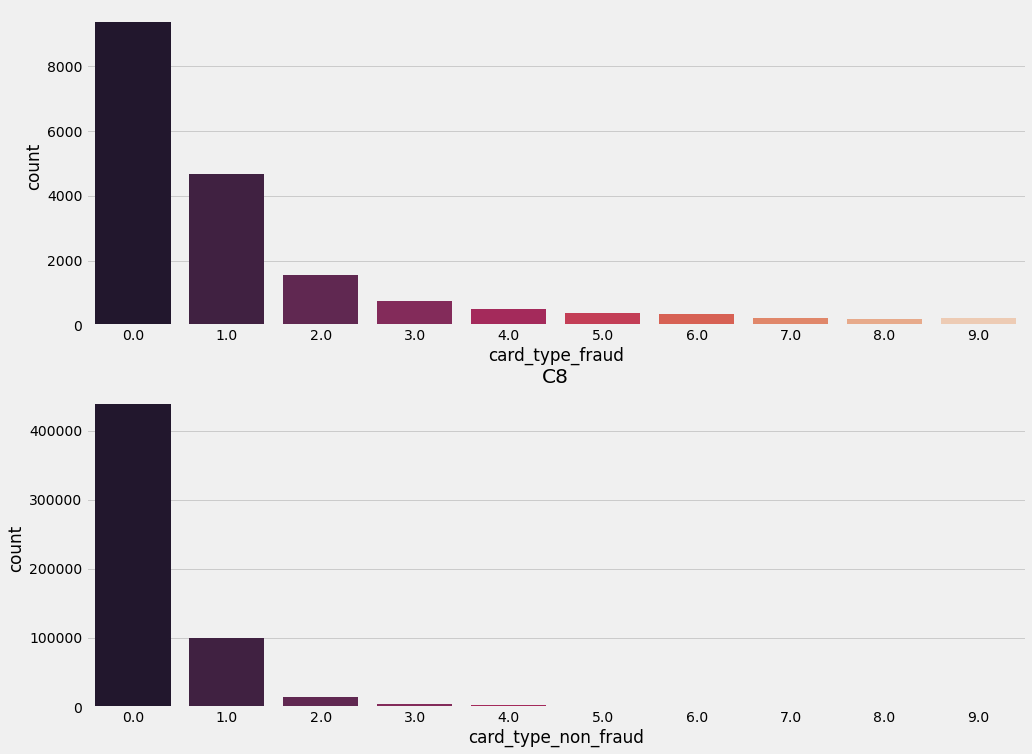

Missing data in  C9 :  0.0 %
Count of  10   C9 types for fraud and non-fraud


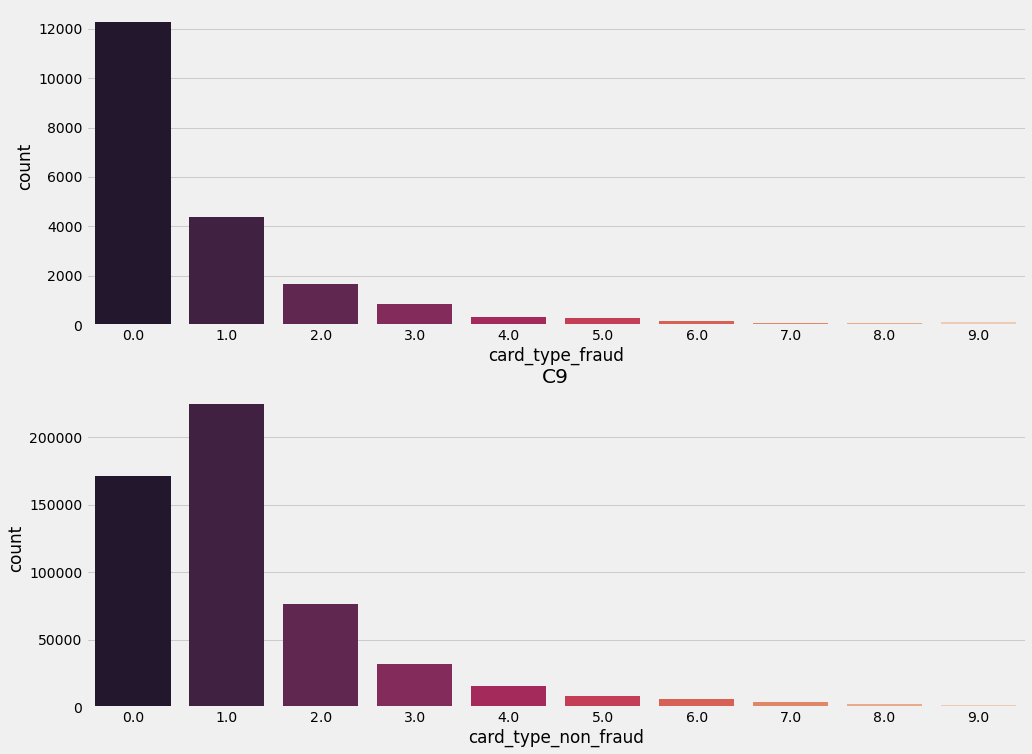

Missing data in  C10 :  0.0 %
Count of  10   C10 types for fraud and non-fraud


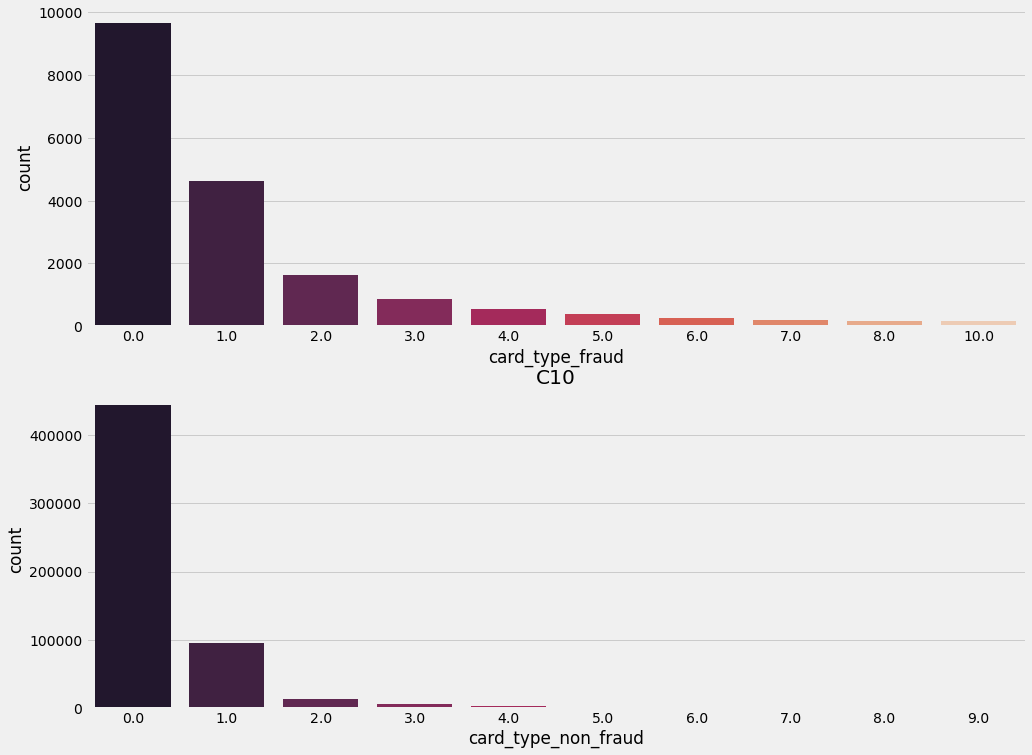

Missing data in  C11 :  0.0 %
Count of  10   C11 types for fraud and non-fraud


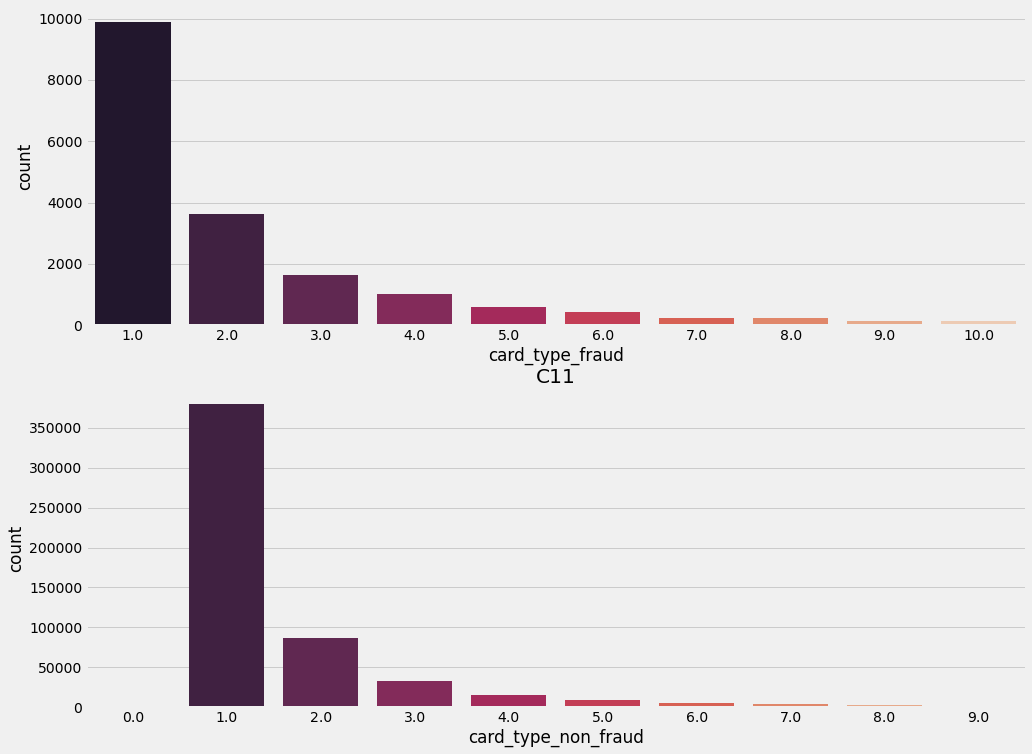

Missing data in  C12 :  0.0 %
Count of  10   C12 types for fraud and non-fraud


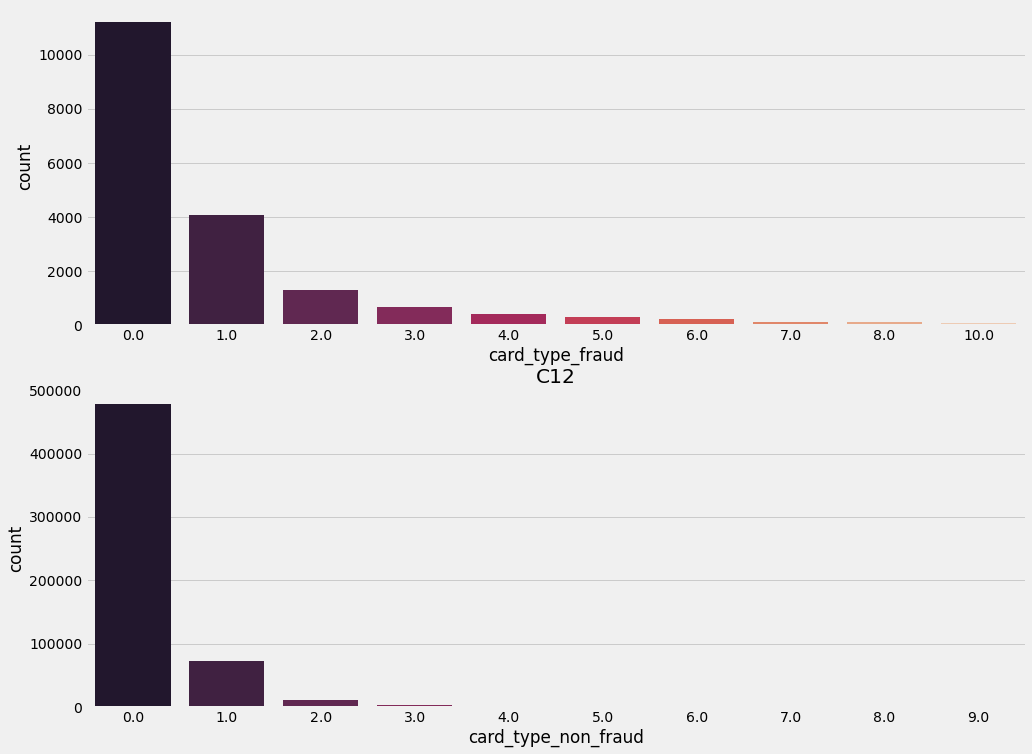

Missing data in  C13 :  0.0 %
Count of  10   C13 types for fraud and non-fraud


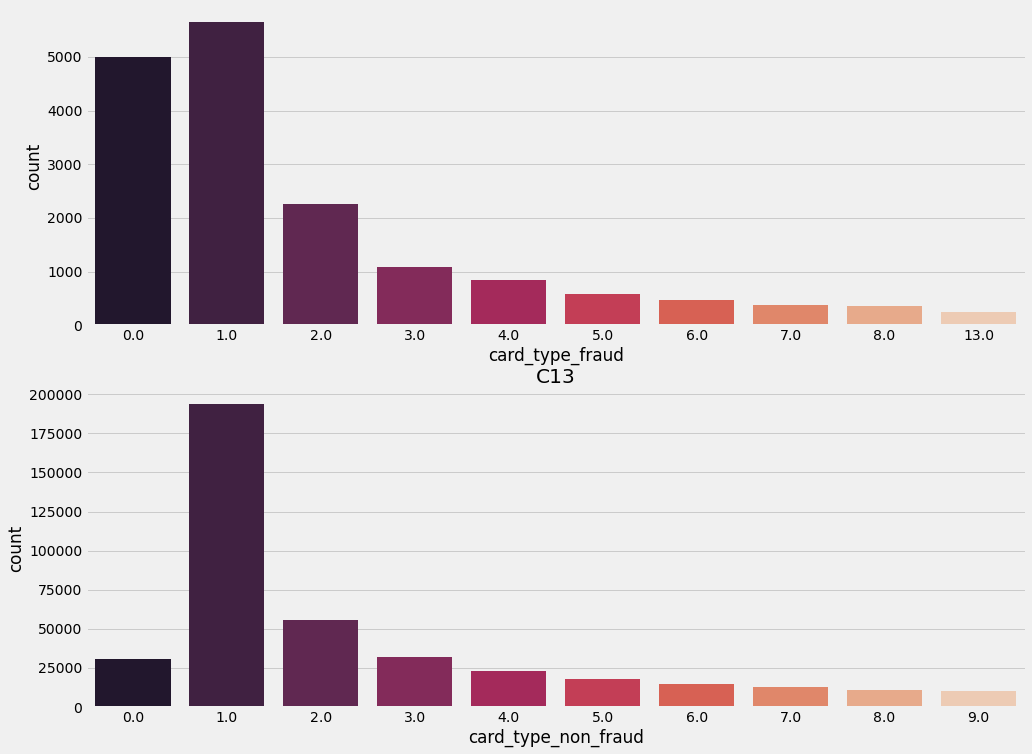

Missing data in  C14 :  0.0 %
Count of  10   C14 types for fraud and non-fraud


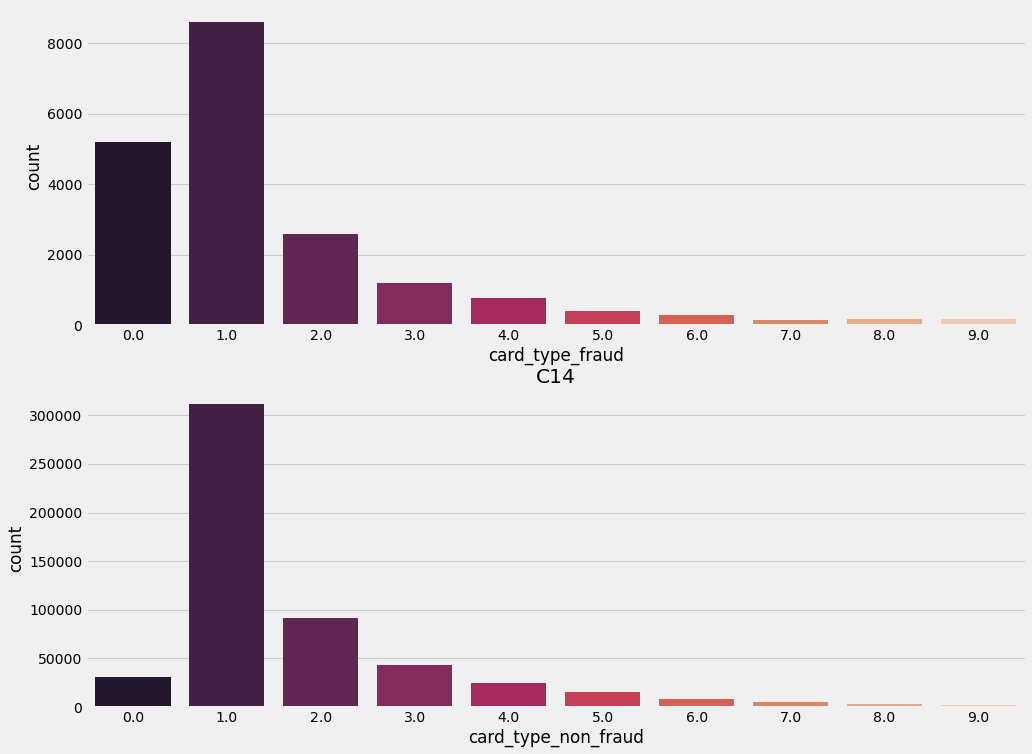

In [45]:
for i in C:
    analysis_categorical(str(i),10,fig_r=15,fig_c=12,rotate=0)


Observation:
    There are no missing values in the C1-C14 columns.
    Counts of 0 or 1 / 0 and 1 are high in almost all the columns

D1-D15

Given:
    D1-D15: timedelta, such as days between previous transaction, etc.

In [46]:
D=[d for d in train.columns if 'D' in d]
D=D[3:18]
train[D].head()

D1     D2    D3    D4   D5  D6  D7  D8  D9   D10    D11  D12  D13  D14  \
0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN  13.0   13.0  NaN  NaN  NaN   
1    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0    NaN  NaN  NaN  NaN   
2    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0  315.0  NaN  NaN  NaN   
3  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN  84.0    NaN  NaN  NaN  NaN   
4    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   NaN    NaN  NaN  NaN  NaN   

     D15  
0    0.0  
1    0.0  
2  315.0  
3  111.0  
4    NaN

In [47]:
train[D].describe()

D1        D2        D3        D4        D5       D6       D7  \
count  589271.0  309743.0  327662.0  421618.0  280699.0  73187.0  38917.0   
mean        NaN       NaN       NaN       NaN       NaN      NaN      inf   
std         NaN       NaN       NaN       NaN       NaN      NaN      inf   
min         0.0       0.0       0.0    -122.0       0.0    -83.0      0.0   
25%         0.0      26.0       1.0       0.0       1.0      0.0      0.0   
50%         3.0      97.0       8.0      26.0      10.0      0.0      0.0   
75%       122.0     276.0      27.0     253.0      32.0     40.0     17.0   
max       640.0     640.0     819.0     869.0     819.0    873.0    843.0   

                 D8            D9       D10       D11      D12      D13  \
count  74926.000000  74926.000000  514518.0  311253.0  64717.0  61952.0   
mean            NaN      0.560059       NaN       NaN      inf      inf   
std             NaN      0.316650       NaN       NaN      inf      inf   
min        0.000000      0.000000       0.0     -53.0    -83.0      0.0   
25%        0.958496      0.208374       0.0       0.0      0.0      0.0   
50%       37.875000      0.666504      15.0      43.0      0.0      0.0   
75%      188.000000      0.833496     197.0     274.0     13.0      0.0   
max     1708.000000      0.958496     876.0     670.0    648.0    847.0   

           D14       D15  
count  62187.0  501427.0  
mean       inf       NaN  
std        inf       NaN  
min     -193.0     -83.0  
25%        0.0       0.0  
50%        0.0      52.0  
75%        2.0     314.0  
max      878.0     879.0

Missing data in  D1 :  0.215 %
Count of  10   D1 types for fraud and non-fraud


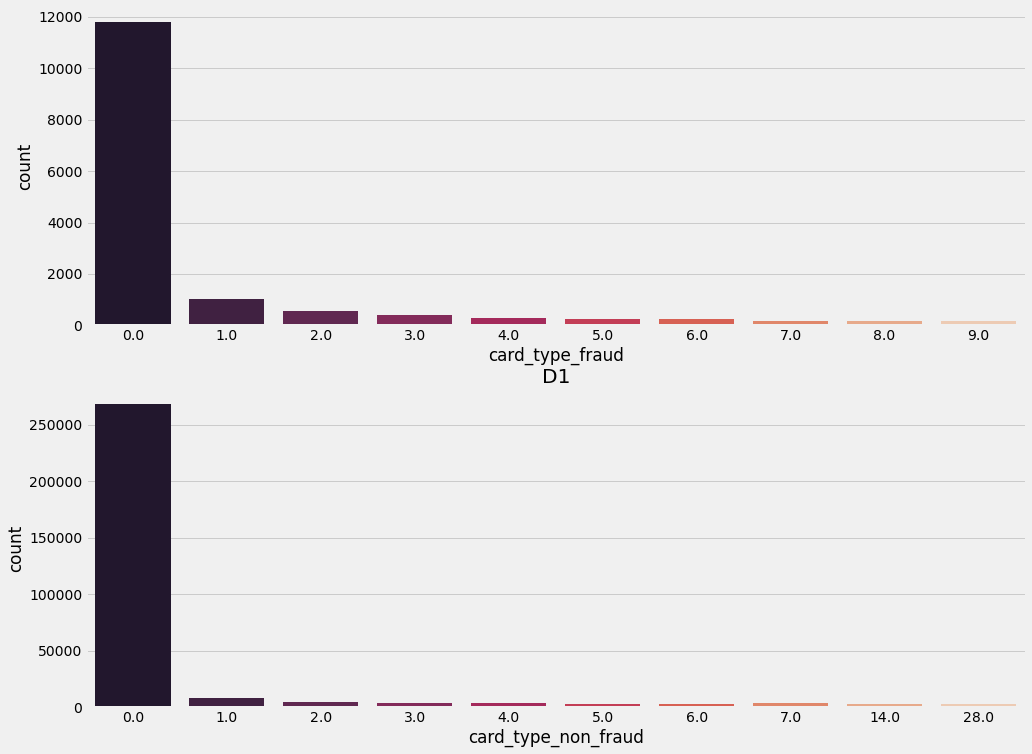

Missing data in  D2 :  47.549 %
Count of  10   D2 types for fraud and non-fraud


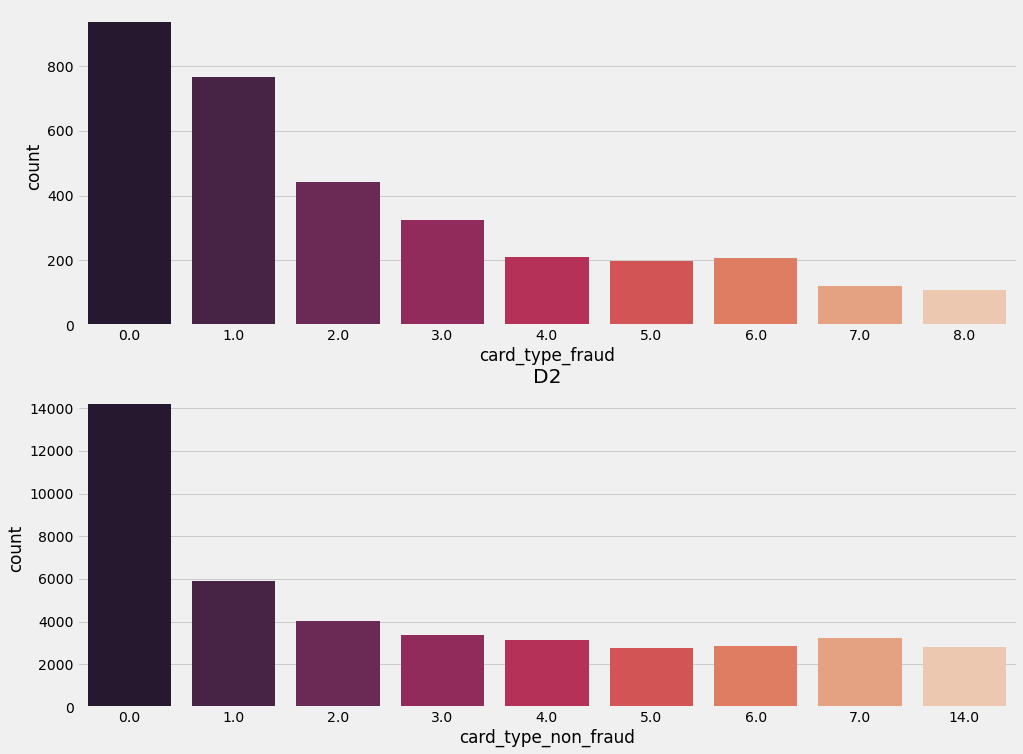

Missing data in  D3 :  44.515 %
Count of  10   D3 types for fraud and non-fraud


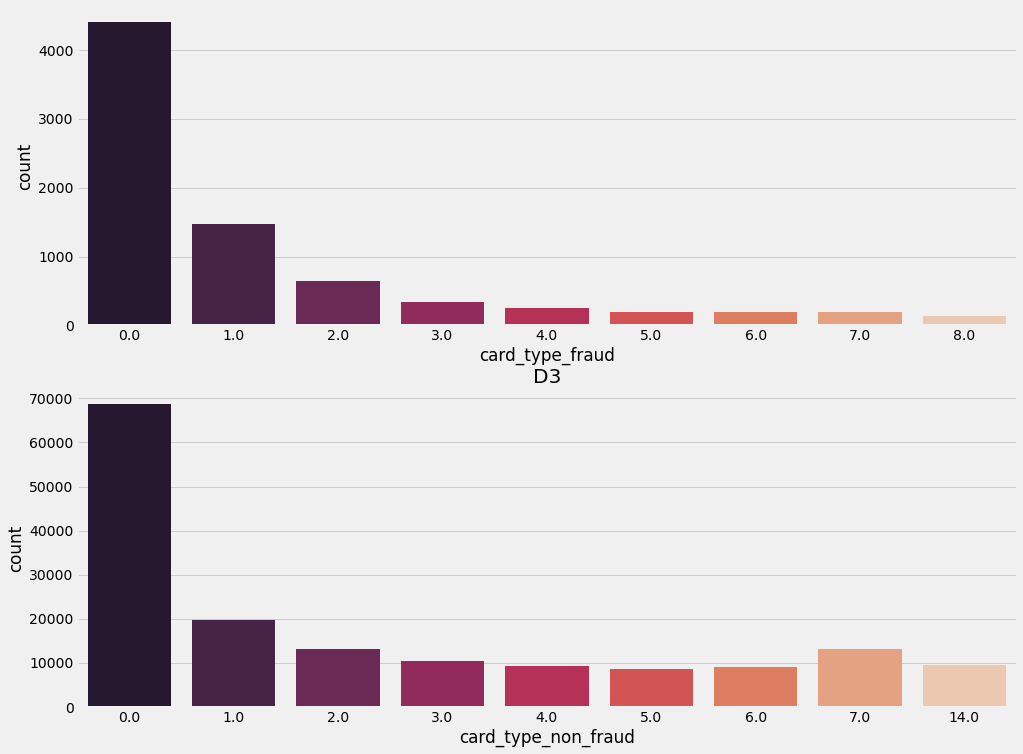

Missing data in  D4 :  28.605 %
Count of  10   D4 types for fraud and non-fraud


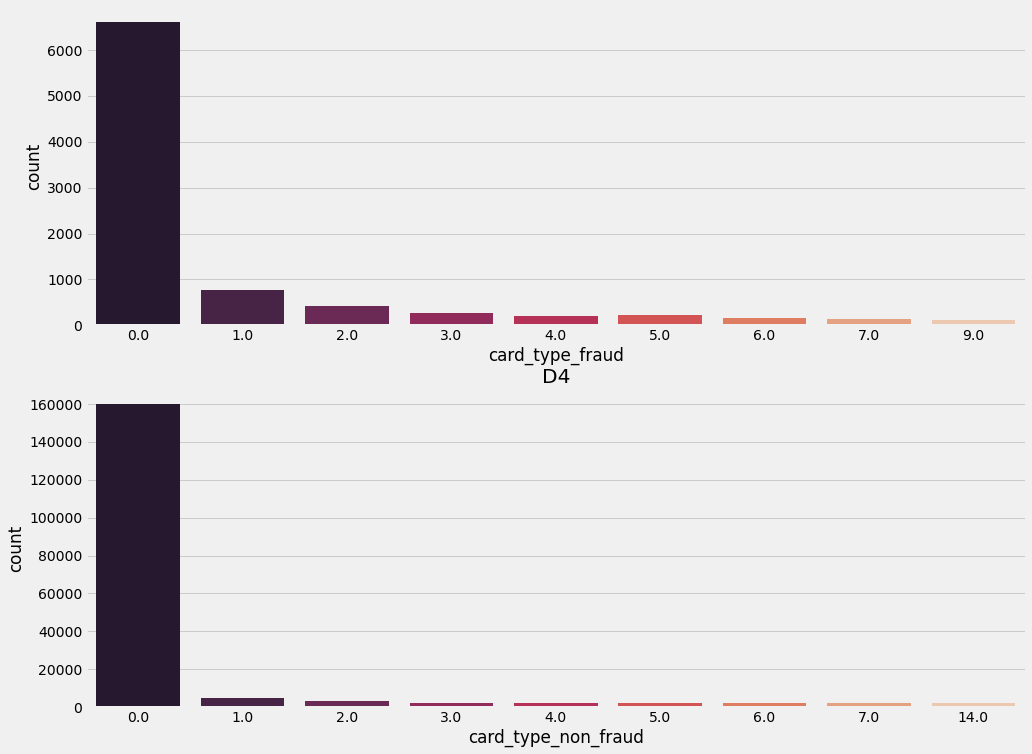

Missing data in  D5 :  52.467 %
Count of  10   D5 types for fraud and non-fraud


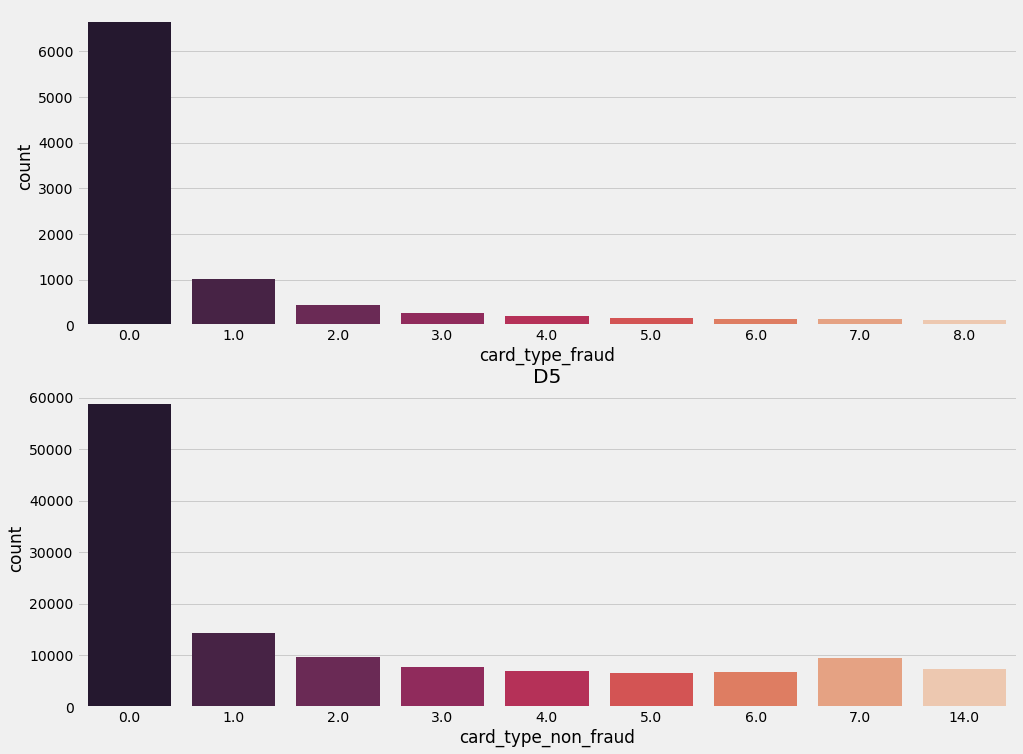

Missing data in  D6 :  87.607 %
Count of  10   D6 types for fraud and non-fraud


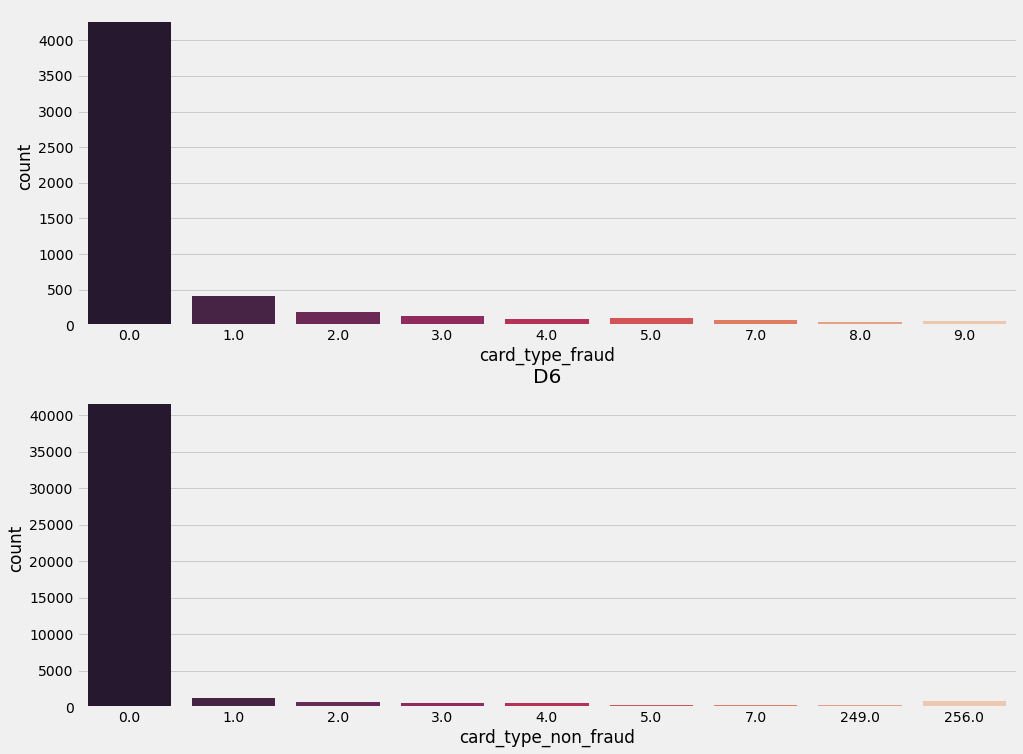

Missing data in  D7 :  93.41 %
Count of  10   D7 types for fraud and non-fraud


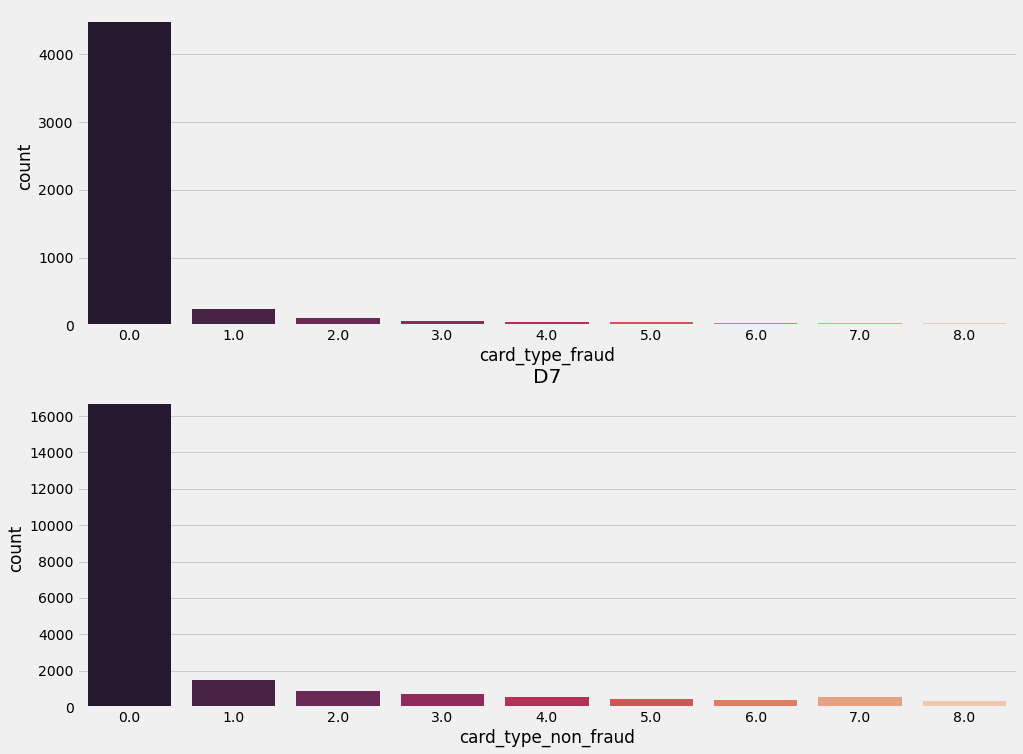

Missing data in  D8 :  87.312 %
Count of  10   D8 types for fraud and non-fraud


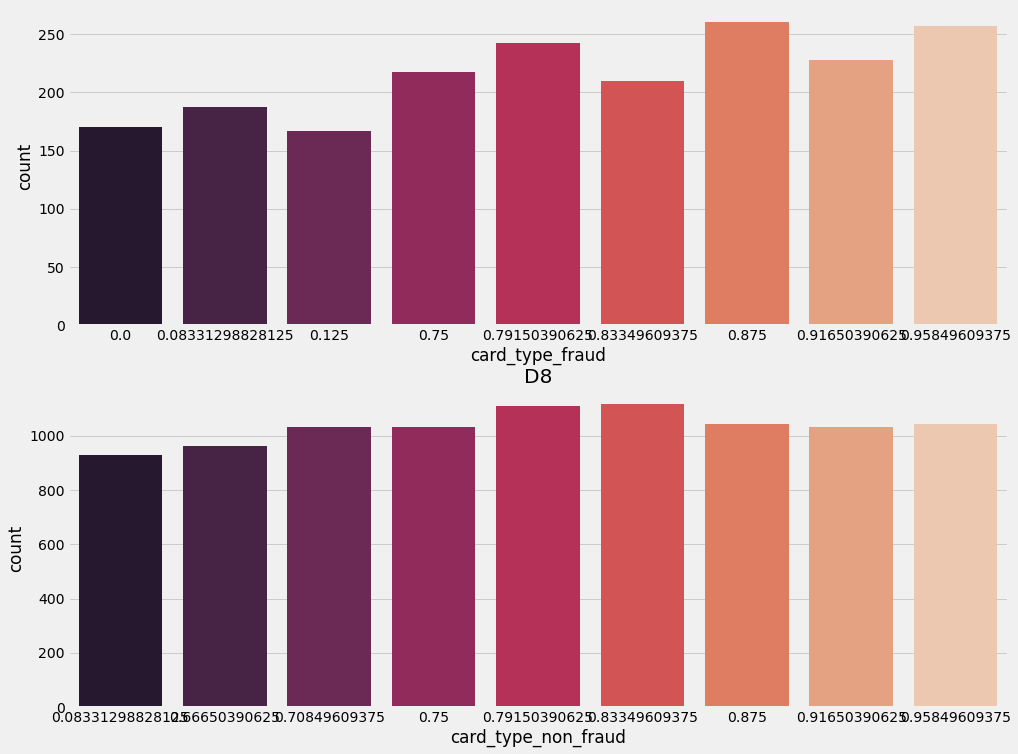

Missing data in  D9 :  87.312 %
Count of  10   D9 types for fraud and non-fraud


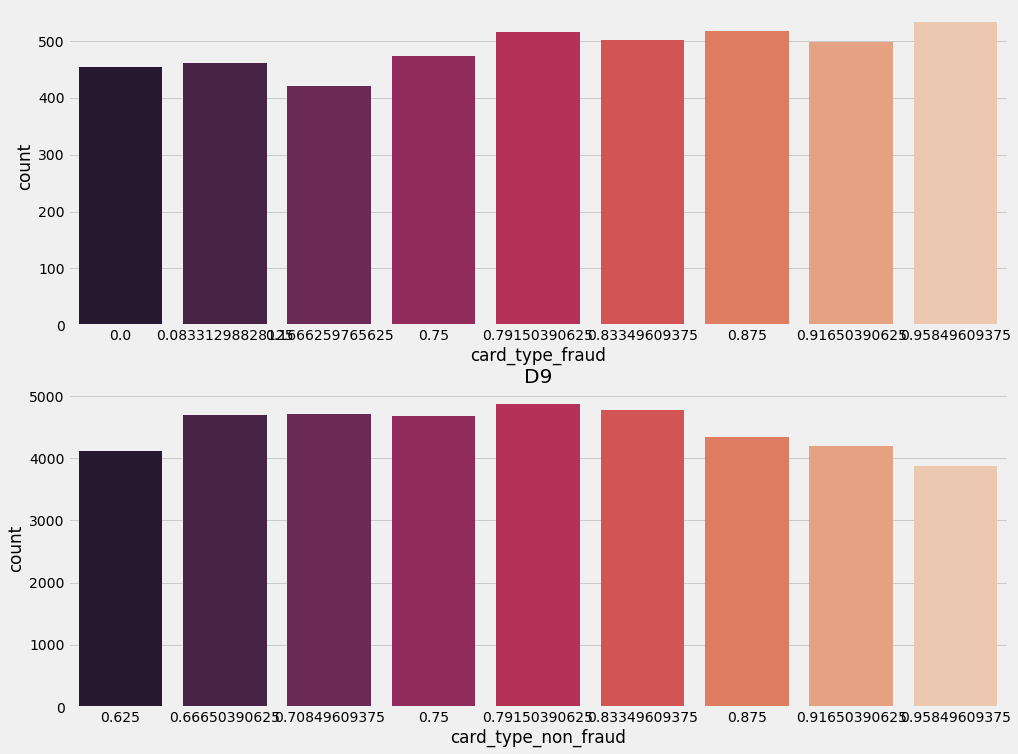

Missing data in  D10 :  12.873 %
Count of  10   D10 types for fraud and non-fraud


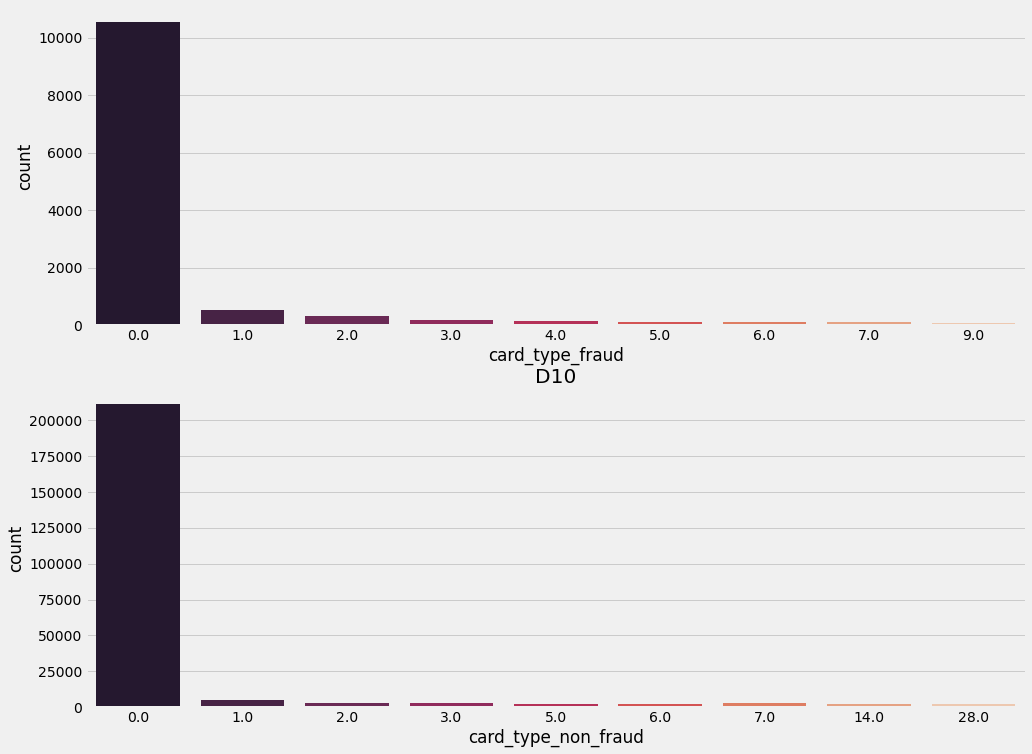

Missing data in  D11 :  47.293 %
Count of  10   D11 types for fraud and non-fraud


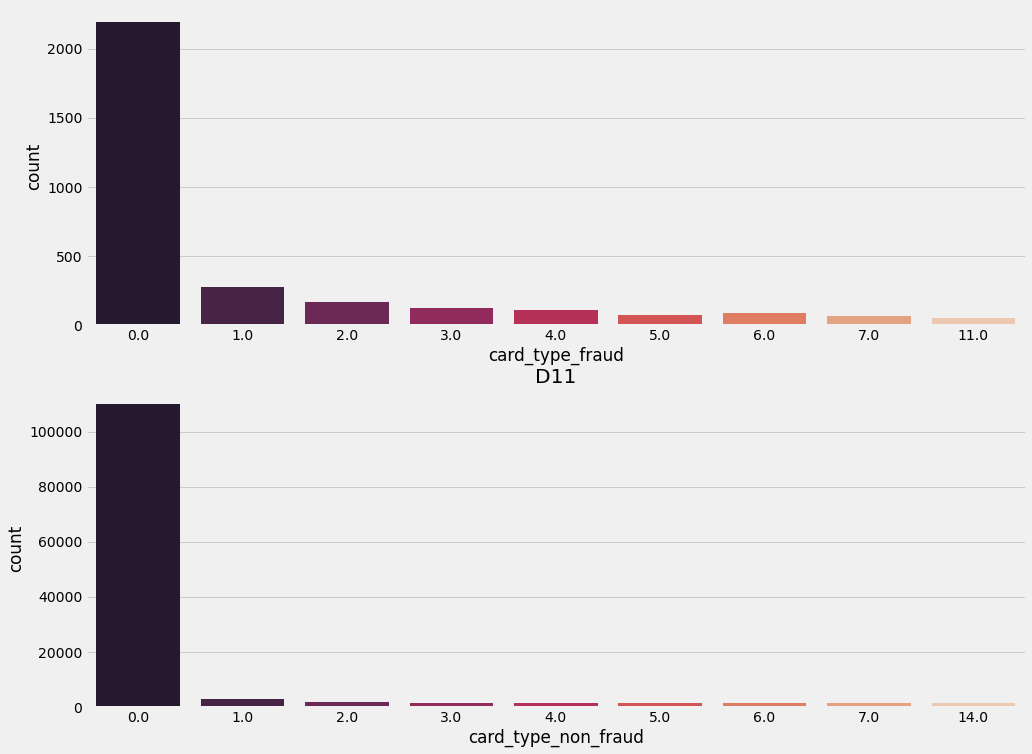

Missing data in  D12 :  89.041 %
Count of  10   D12 types for fraud and non-fraud


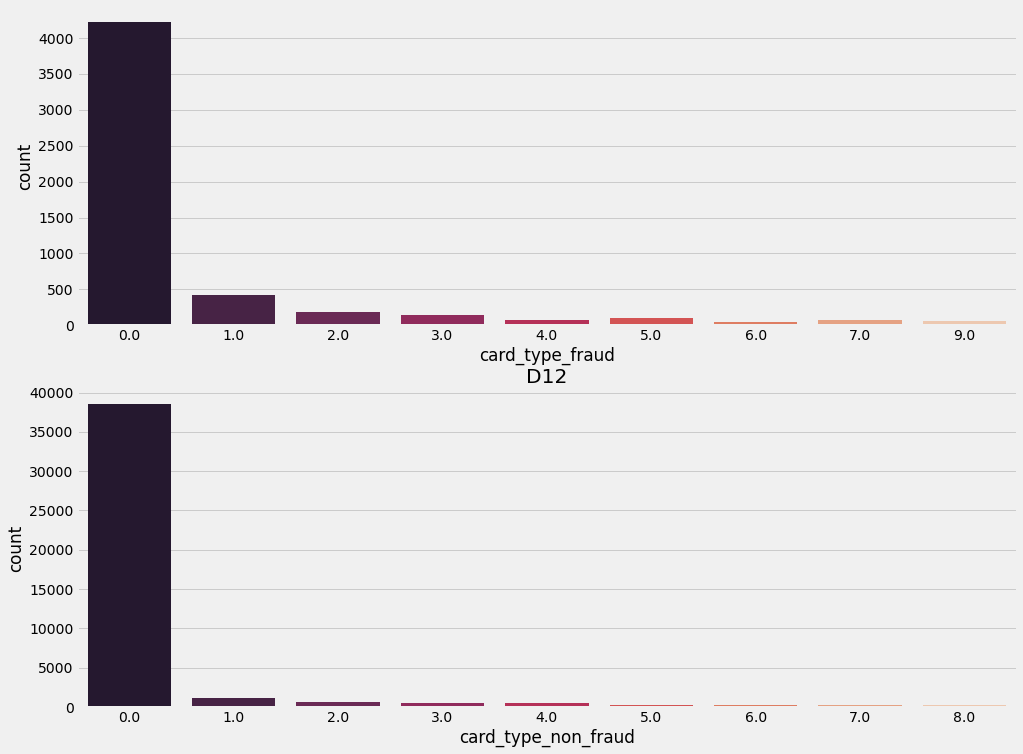

Missing data in  D13 :  89.509 %
Count of  10   D13 types for fraud and non-fraud


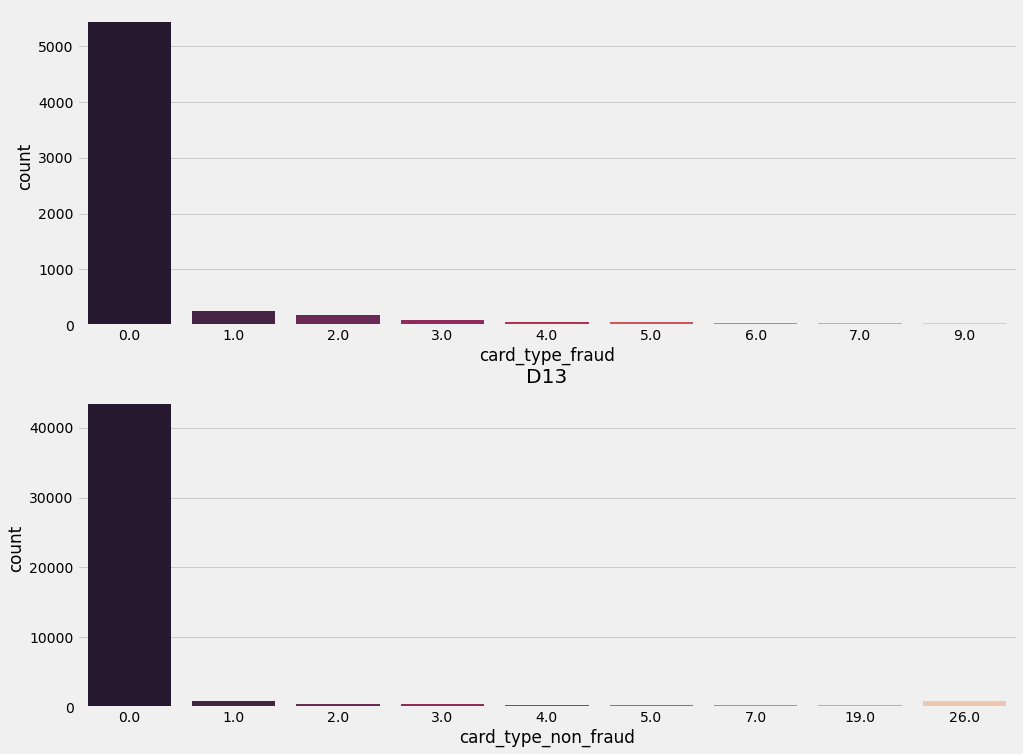

Missing data in  D14 :  89.469 %
Count of  10   D14 types for fraud and non-fraud


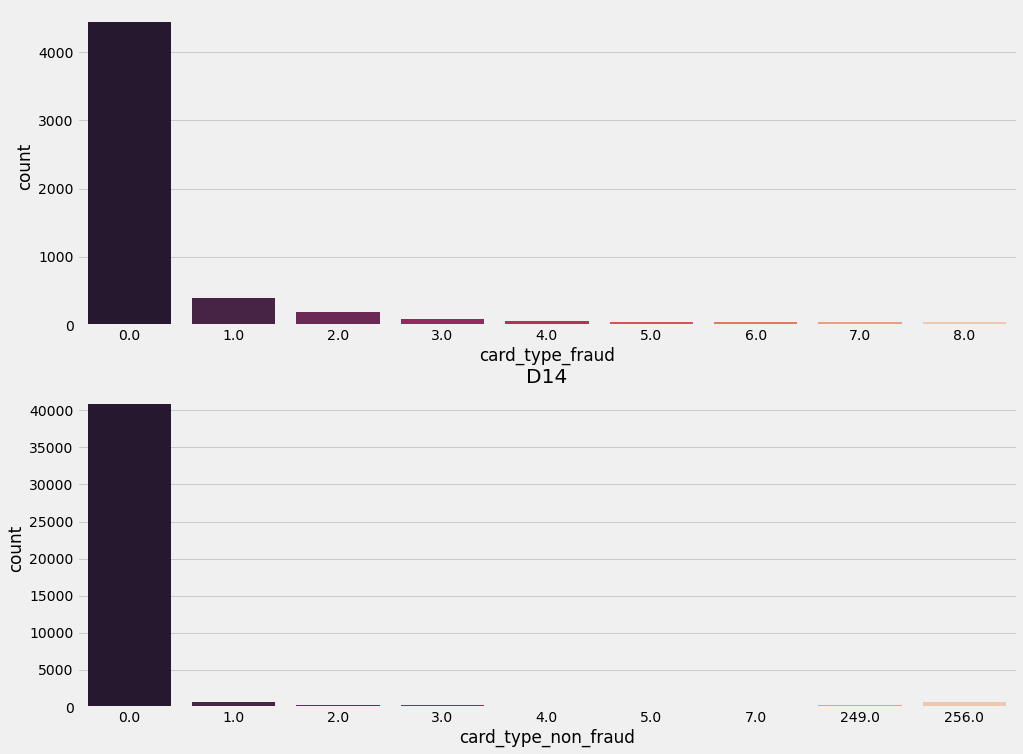

Missing data in  D15 :  15.09 %
Count of  10   D15 types for fraud and non-fraud


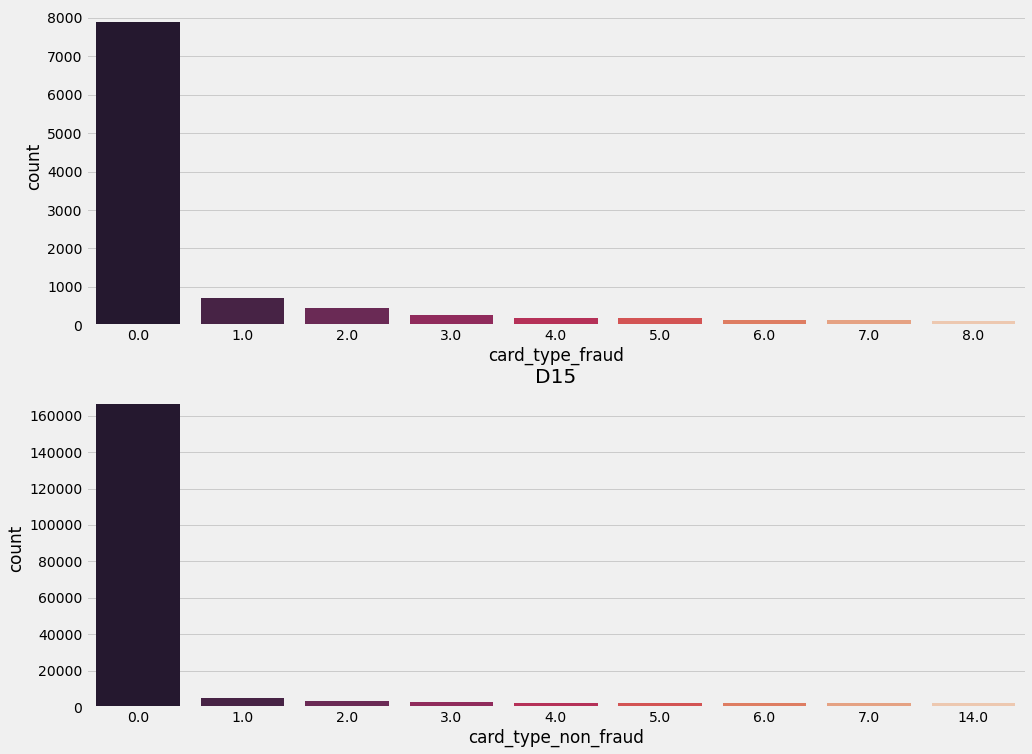

In [48]:
for i in D:
    analysis_categorical(str(i),10,fig_r=15,fig_c=12,rotate=0)

In [49]:
print('Missing values of D1-D15')
pd.DataFrame((train[D].isna().sum()/len(train[D])*100).reset_index().rename(columns={'index':'column',0:'Missing %'}))

Missing values of D1-D15


column  Missing %
0      D1   0.214888
1      D2  47.549192
2      D3  44.514851
3      D4  28.604667
4      D5  52.467403
5      D6  87.606767
6      D7  93.409930
7      D8  87.312290
8      D9  87.312290
9     D10  12.873302
10    D11  47.293494
11    D12  89.041047
12    D13  89.509263
13    D14  89.469469
14    D15  15.090087

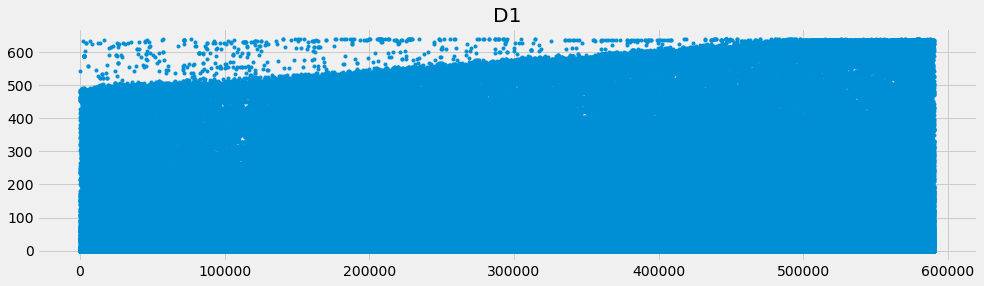

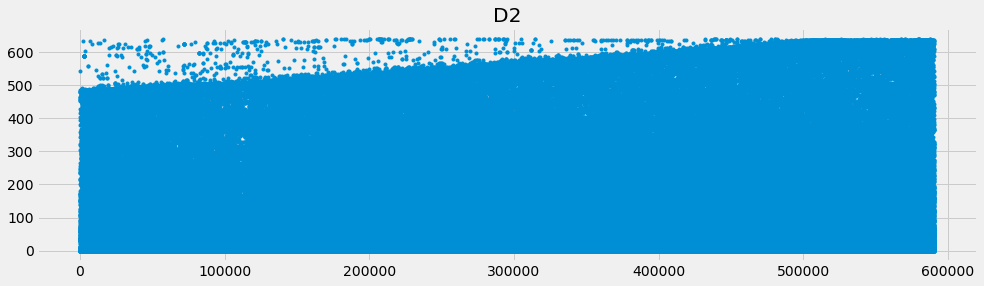

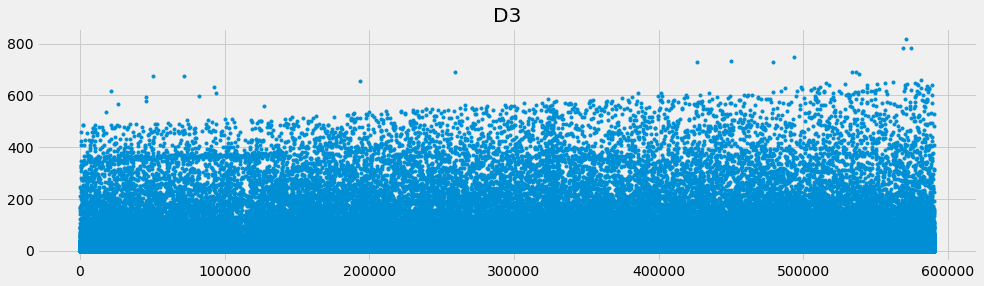

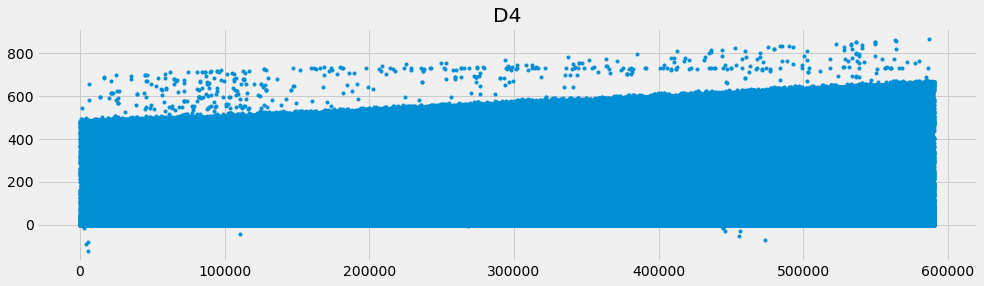

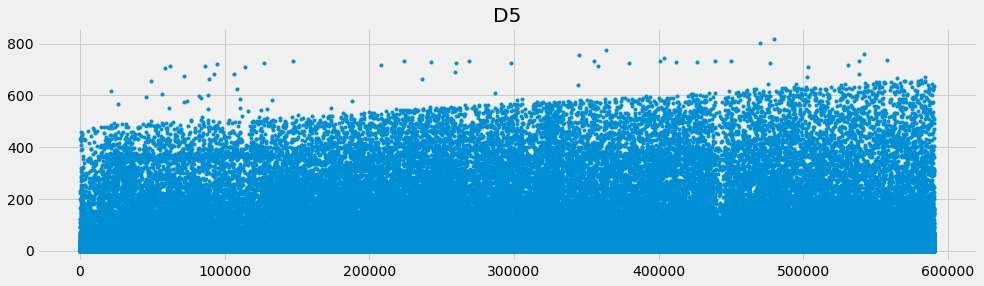

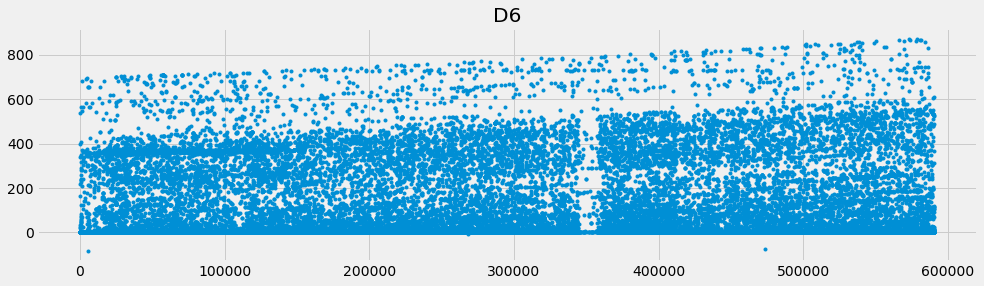

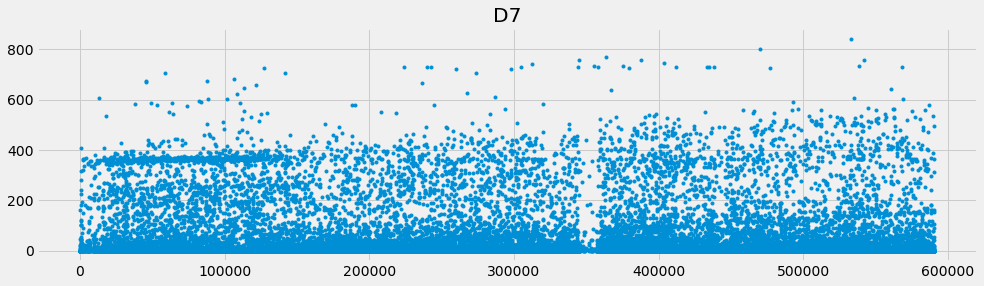

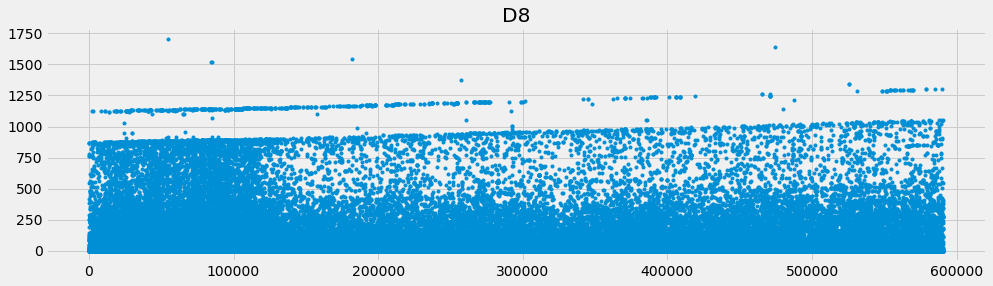

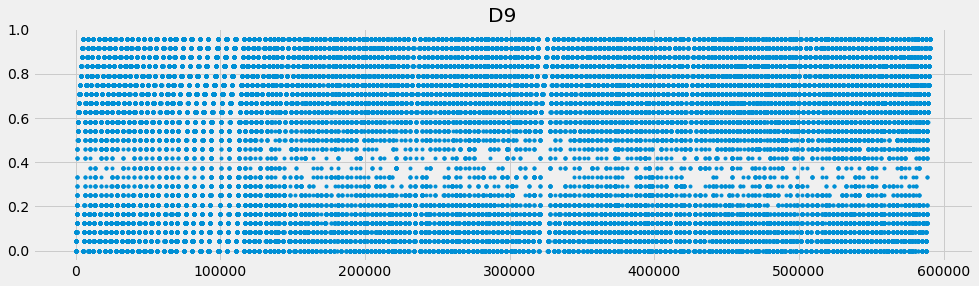

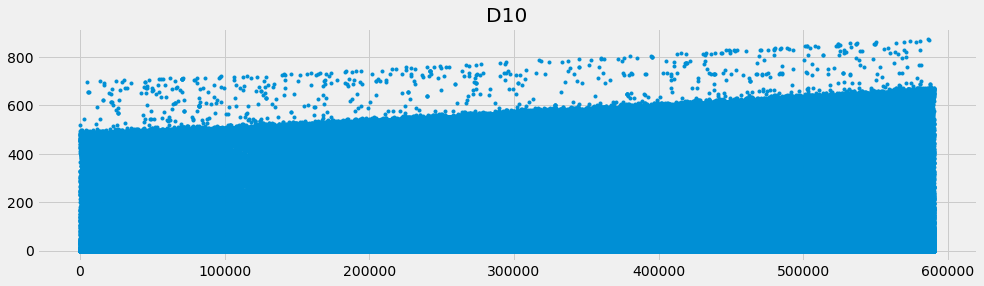

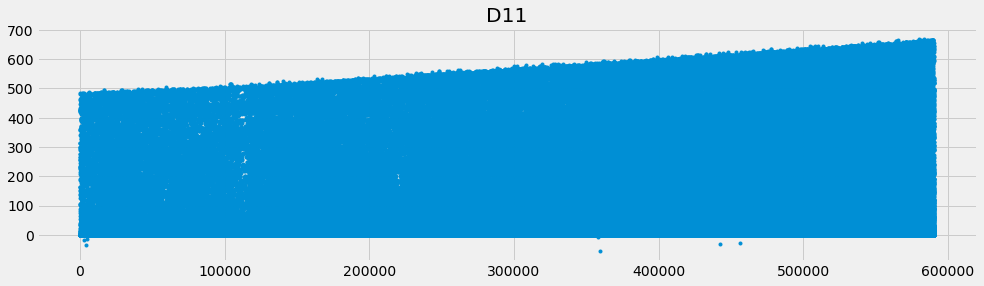

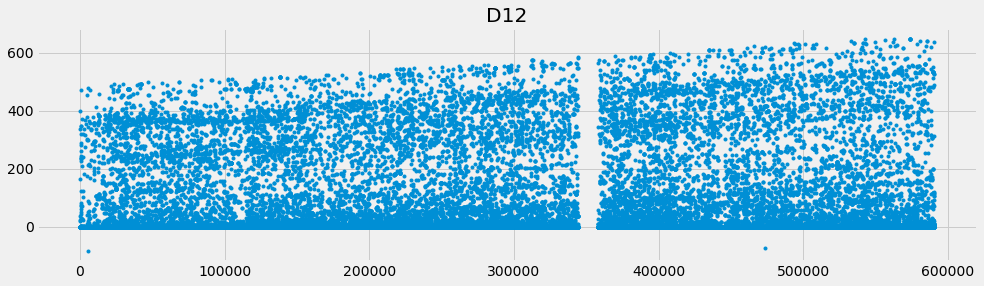

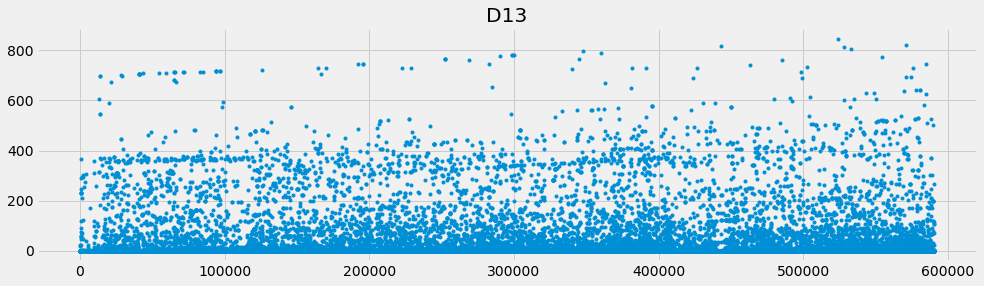

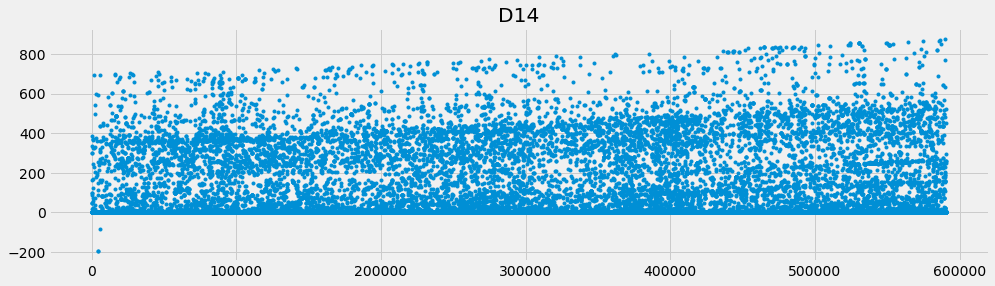

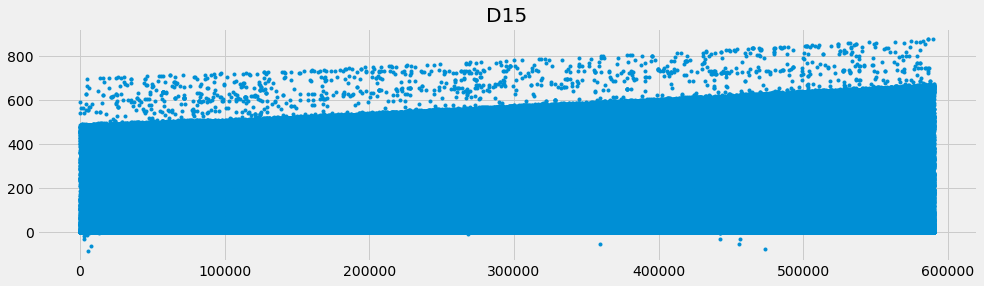

In [50]:
for d in D:
    train[d].plot(style='.',title=d,figsize=(15,4))
    plt.show()

M1-M9

Given:
    M1-M9: match, such as names on card and address, etc

In [51]:
M=[m for m in train.columns if 'M' in m]
train[M].head()

M1   M2   M3   M4   M5   M6   M7   M8   M9
0    T    T    T   M2    F    T  NaN  NaN  NaN
1  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN
2    T    T    T   M0    F    F    F    F    F
3  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [52]:
train[M].describe()

M1      M2      M3      M4      M5      M6      M7      M8      M9
count   319440  319440  319440  309096  240058  421180  244275  244288  244288
unique       2       2       2       3       2       2       2       2       2
top          T       T       T      M0       F       F       F       F       T
freq    319415  285468  251731  196405  132491  227856  211374  155251  205656

Except for M4, all the other variables M1,M2,M3,M5,M6,M7,M8,M9 are binary classes

In [53]:
def analysis_cat(card,num_features,fig_r=15,fig_c=20,rotate=0):
    print('Missing data in ',card, ': ',(train[card].isna().sum()/len(train[card])*100).round(3),'%')
    print('Count of ',card,'types for fraud and non-fraud')
    card_type_fraud=pd.DataFrame(train[card].loc[train.isFraud==1].value_counts(dropna=False).head(num_features)).reset_index().rename(columns={'index':'card_type_fraud',card:'count'})
    card_type_non_fraud=pd.DataFrame(train[card].loc[train.isFraud==0].value_counts(dropna=False).head(num_features)).reset_index().rename(columns={'index':'card_type_non_fraud',card:'count'})
    #plt.figure(figsize=(12,5))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_r,fig_c))
    sns.barplot('card_type_fraud','count',data=card_type_fraud,ax=ax1,palette='rocket')
    sns.barplot('card_type_non_fraud','count',data=card_type_non_fraud,ax=ax2,palette='rocket')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=rotate)
    plt.title(card)
    plt.show()

Missing data in  M1 :  45.907 %
Count of  M1 types for fraud and non-fraud


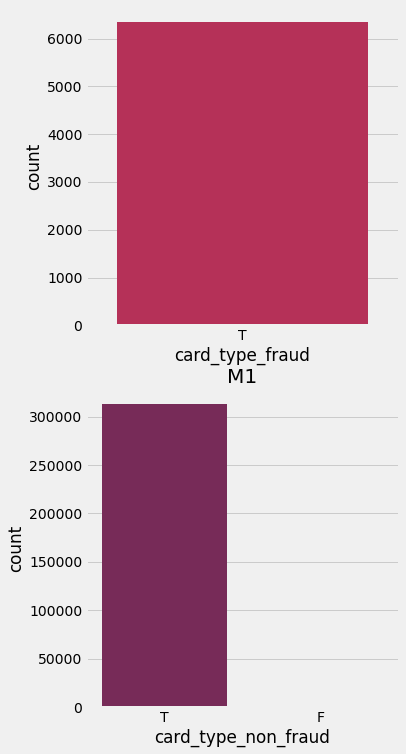

Missing data in  M2 :  45.907 %
Count of  M2 types for fraud and non-fraud


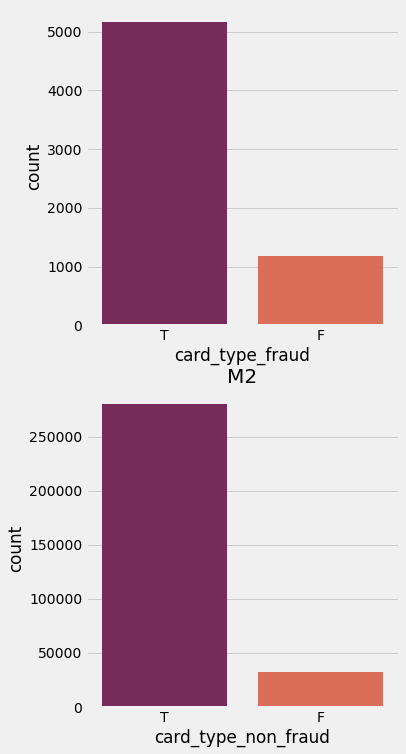

Missing data in  M3 :  45.907 %
Count of  M3 types for fraud and non-fraud


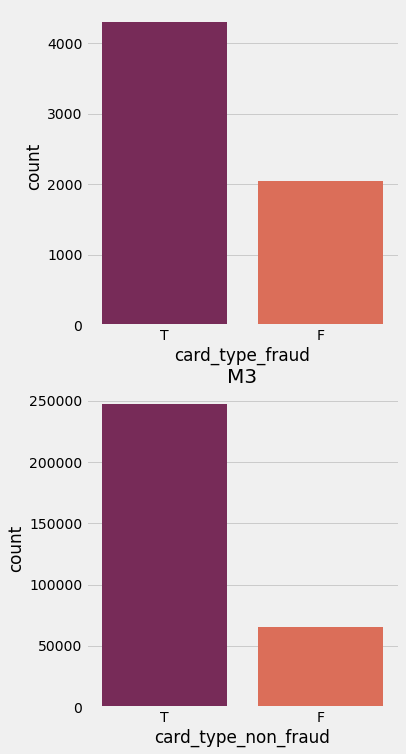

Missing data in  M4 :  47.659 %
Count of  M4 types for fraud and non-fraud


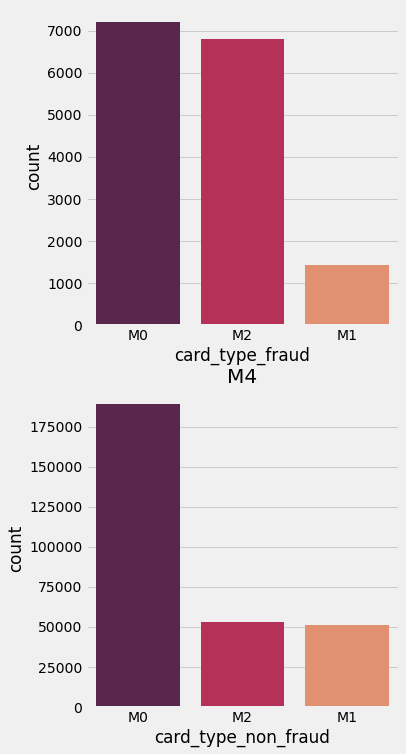

Missing data in  M5 :  59.349 %
Count of  M5 types for fraud and non-fraud


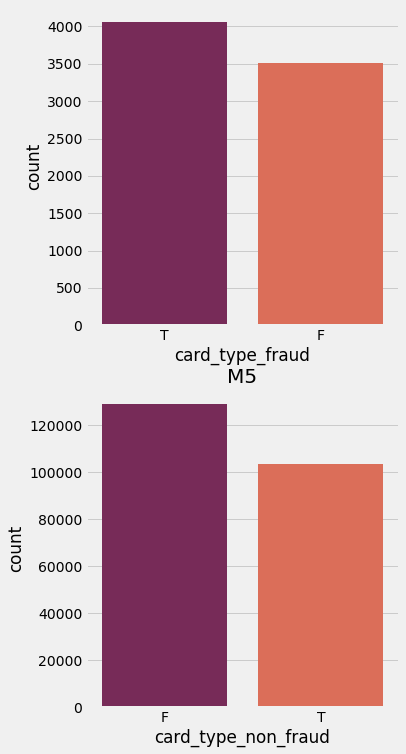

Missing data in  M6 :  28.679 %
Count of  M6 types for fraud and non-fraud


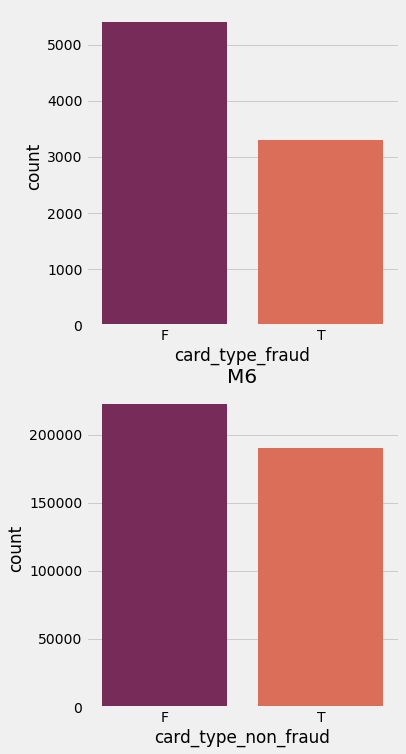

Missing data in  M7 :  58.635 %
Count of  M7 types for fraud and non-fraud


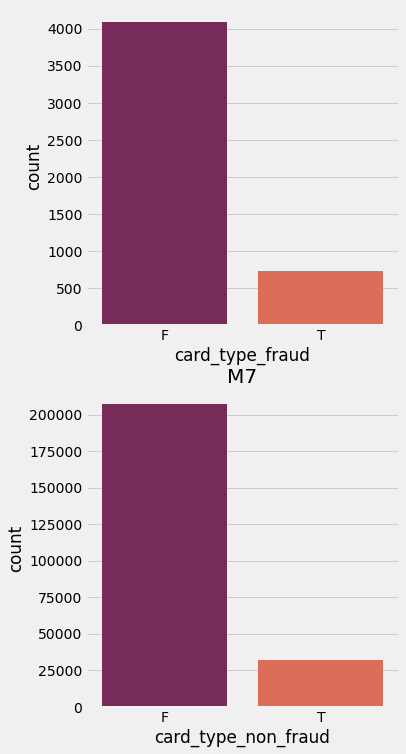

Missing data in  M8 :  58.633 %
Count of  M8 types for fraud and non-fraud


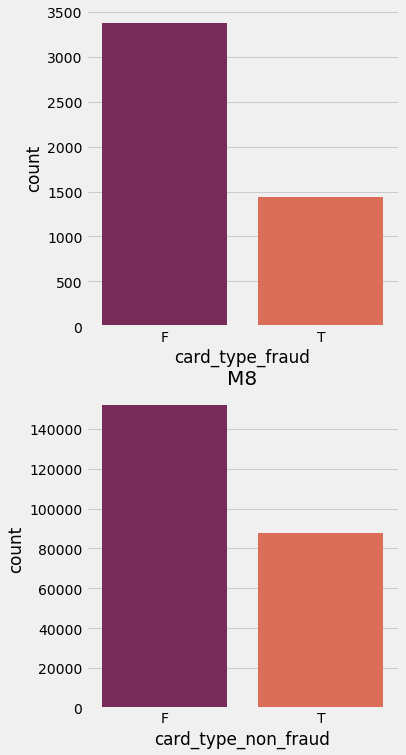

Missing data in  M9 :  58.633 %
Count of  M9 types for fraud and non-fraud


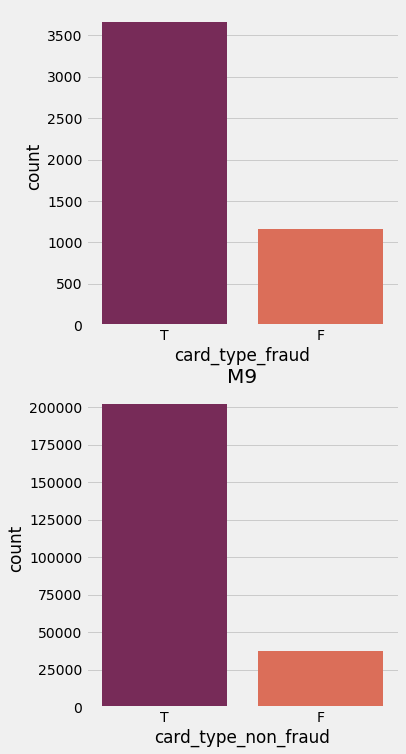

In [54]:
for i in M:
    analysis_cat(str(i),4,fig_r=5,fig_c=12,rotate=0)

V1-V339

Given:
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

In [55]:
V=[v for v in train.columns if 'V' in v]
train[V].head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  V89  V90  \
0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V91  V92  V93  V94  V95   V96   V97  V98   V99  V100  V101  V102  V103  \
0  0.0  0.0  0.0  0.0  0.0   1.0   0.0  0.0   0.0   0.0   0.0   1.0   0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  1.0  48.0  28.0  0.0  10.0   4.0   1.0  38.0  24.0   
4  NaN  NaN  NaN  NaN  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   

   V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  \
0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126    V127  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   117.0   
1   1.0   1.0   1.0   1.0   1.0   

In [56]:
train[V].describe()

V1        V2        V3        V4        V5        V6        V7  \
count  311253.0  311253.0  311253.0  311253.0  311253.0  311253.0  311253.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
50%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
75%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
max         1.0       8.0       9.0       6.0       6.0       9.0       9.0   

             V8        V9       V10       V11       V12       V13       V14  \
count  311253.0  311253.0  311253.0  311253.0  514467.0  514467.0  514467.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       1.0       0.0       0.0       0.0       0.0       1.0   
50%         1.0       1.0       0.0       0.0       1.0       1.0       1.0   
75%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
max         8.0       8.0       4.0       5.0       3.0       6.0       1.0   

                 V15            V16       V17       V18       V19       V20  \
count  514467.000000  514467.000000  514467.0  514467.0  514467.0  514467.0   
mean        0.122375       0.123352       NaN       NaN       NaN       NaN   
std         0.332520       0.342529       0.0       0.0       0.0       0.0   
min         0.000000       0.000000       0.0       0.0       0.0       0.0   
25%         0.000000       0.000000       0.0       0.0       1.0       1.0   
50%         0.000000       0.000000       0.0       0.0       1.0       1.0   
75%         0.000000       0.000000       0.0       0.0       1.0       1.0   
max         7.000000      15.000000      15.0      15.0       7.0      15.0   

            V21       V22       V23       V24       V25       V26  \
count  514467.0  514467.0  514467.0  514467.0  514467.0  514467.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       1.0       1.0       1.0       1.0   
50%         0.0       0.0       1.0       1.0       1.0       1.0   
75%         0.0       0.0       1.0       1.0       1.0       1.0   
max         5.0       8.0      13.0      13.0       7.0      13.0   

                 V27            V28       V29       V30       V31       V32  \
count  514467.000000  514467.000000  514467.0  514467.0  514467.0  514467.0   
mean        0.000775       0.000830       NaN       NaN       NaN       NaN   
std         0.028595       0.031128       0.0       0.0       0.0       0.0   
min         0.000000       0.000000       0.0       0.0       0.0       0.0   
25%         0.000000       0.000000       0.0       0.0       0.0       0.0   
50%         0.000000       0.000000       0.0       0.0       0.0       0.0   
75%         0.000000       0.000000       1.0       1.0       0.0       0.0   
max         4.000000       4.000000       5.0       9.0       7.0      15.0   

            V33       V34       V35       V36       V37       V38       V39  \
count  514467.0  514467.0  421571.0  421571.0  421571.0  421571.0  421571.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       1.0       1.0       0.0   
50%         0.0       0.0       1.0       1.0       1.0       1.0    

In [57]:
print('Missing values of V1-V339')
pd.DataFrame((train[V].isna().sum()/len(train[V])*100).reset_index().rename(columns={'index':'column',0:'Missing %'}))

Missing values of V1-V339


column  Missing %
0       V1  47.293494
1       V2  47.293494
2       V3  47.293494
3       V4  47.293494
4       V5  47.293494
5       V6  47.293494
6       V7  47.293494
7       V8  47.293494
8       V9  47.293494
9      V10  47.293494
10     V11  47.293494
11     V12  12.881939
12     V13  12.881939
13     V14  12.881939
14     V15  12.881939
15     V16  12.881939
16     V17  12.881939
17     V18  12.881939
18     V19  12.881939
19     V20  12.881939
20     V21  12.881939
21     V22  12.881939
22     V23  12.881939
23     V24  12.881939
24     V25  12.881939
25     V26  12.881939
26     V27  12.881939
27     V28  12.881939
28     V29  12.881939
29     V30  12.881939
30     V31  12.881939
31     V32  12.881939
32     V33  12.881939
33     V34  12.881939
34     V35  28.612626
35     V36  28.612626
36     V37  28.612626
37     V38  28.612626
38     V39  28.612626
39     V40  28.612626
40     V41  28.612626
41     V42  28.612626
42     V43  28.612626
43     V44  28.612626
44     V45  28.612626
45     V46  28.612626
46     V47  28.612626
47     V48  28.612626
48     V49  28.612626
49     V50  28.612626
50     V51  28.612626
51     V52  28.612626
52     V53  13.055170
53     V54  13.055170
54     V55  13.055170
55     V56  13.055170
56     V57  13.055170
57     V58  13.055170
58     V59  13.055170
59     V60  13.055170
60     V61  13.055170
61     V62  13.055170
62     V63  13.055170
63     V64  13.055170
64     V65  13.055170
65     V66  13.055170
66     V67  13.055170
67     V68  13.055170
68     V69  13.055170
69     V70  13.055170
70     V71  13.055170
71     V72  13.055170
72     V73  13.055170
73     V74  13.055170
74     V75  15.098723
75     V76  15.098723
76     V77  15.098723
77     V78  15.098723
78     V79  15.098723
79     V80  15.098723
80     V81  15.098723
81     V82  15.098723
82     V83  15.098723
83     V84  15.098723
84     V85  15.098723
85     V86  15.098723
86     V87  15.098723
87     V88  15.098723
88     V89  15.098723
89     V90  15.098723
90     V91  15.098723
91     V92  15.098723
92     V93  15.098723
93     V94  15.098723
94     V95   0.053172
95     V96   0.053172
96     V97   0.053172
97     V98   0.053172
98     V99   0.053172
99    V100   0.053172
100   V101   0.053172
101   V102   0.053172
102   V103   0.053172
103   V104   0.053172
104   V105   0.053172
105   V106   0.053172
106   V107   0.053172
107   V108   0.053172
108   V109   0.053172
109   V110   0.053172
110   V111   0.053172
111   V112   0.053172
112   V113   0.053172
113   V114   0.053172
114   V115   0.053172
115   V116   0.053172
116   V117   0.053172
117   V118   0.053172
118   V119   0.053172
119   V120   0.053172
120   V121   0.053172
121   V122   0.053172
122   V123   0.053172
123   V124   0.053172
124   V125   0.053172
125   V126   0.053172
126   V127   0.053172
127   V128   0.053172
128   V129   0.053172
129   V130   0.053172
130   V131   0.053172
131   V132   0.053172
132   V133   0.053172
133   V134   0.053172
134   V135   0.053172
135   V136   0.053172
136   V137   0.053172
137   V138  86.123717
138   V139  86.123717
139   V140  86.123717
140   V141  86.123717
141   V142  86.123717
142   V143  86.122701
143   V144  86.122701
144   V145  86.122701
145   V146  86.123717
146   V147  86.123717
147   V148  86.123717
148   V149  86.123717
149   V150  86.122701
150   V151  86.122701
151   V152  86.122701
152   V153  86.123717
153   V154  86.123717
154   V155  86.123717
155   V156  86.123717
156   V157  86.123717
157   V158  86.123717
158   V159  86.122701
159   V160  86.122701
160   V161  86.123717
161   V162  86.123717
162   V163  86.123717
163   V164  86.122701
164   V165  86.122701
165   V166  86.122701
166   V167  76.355370
167   V168  76.355370
168   V169  76.323534
169   V170  76.323534
170   V171  76.323534
171   V172  76.355370
172   V173  76.355370
173   V174  76.323534
174   V175  76.323534
175   V176  76.355370
176   V177  76.355370
177   V178  76.355370
178   V179  76.355370
179   V180  76.323534
180   V181  76.355370


In [58]:
V_mono_var=[i for i in V if train[i].nunique()==1]
print('V features with single classes: ',V_mono_var)

V features with single classes:  []


No V features with single classes

In [59]:
V_binary_var=[i for i in V if train[i].nunique()==2]
print('V features with binary classes: ',V_binary_var)

V features with binary classes:  ['V1', 'V14', 'V41', 'V65', 'V88', 'V107', 'V305']


In [60]:
V_triply_var=[i for i in V if train[i].nunique()==3]
print('V features with triple classes: ',V_triply_var)

V features with triple classes:  ['V68', 'V89', 'V94']


Count of V1, V14, V41, V65, V88, V107, V305 (binary classes)
Missing data in  V1 :  47.293 %
Count of  3   V1 types for fraud and non-fraud


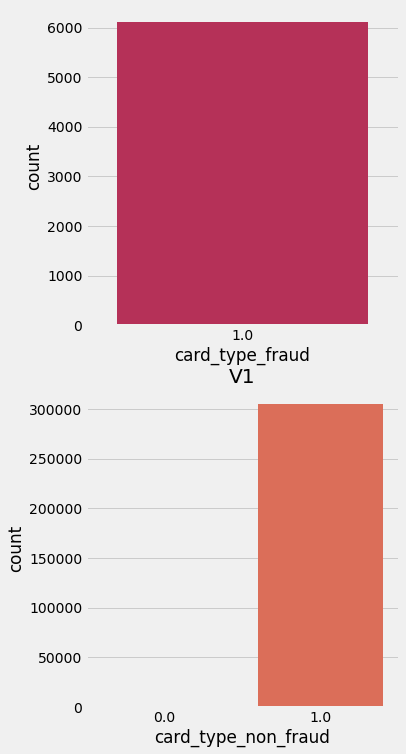

Missing data in  V14 :  12.882 %
Count of  3   V14 types for fraud and non-fraud


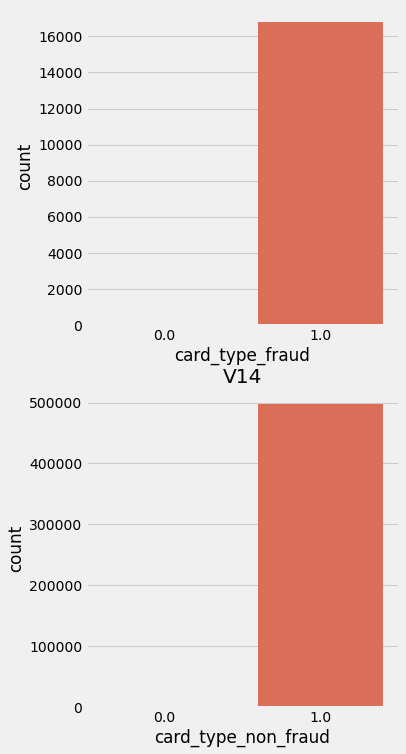

Missing data in  V41 :  28.613 %
Count of  3   V41 types for fraud and non-fraud


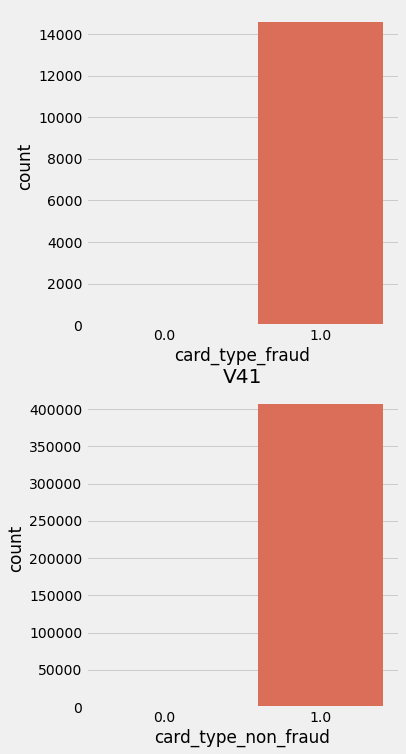

Missing data in  V65 :  13.055 %
Count of  3   V65 types for fraud and non-fraud


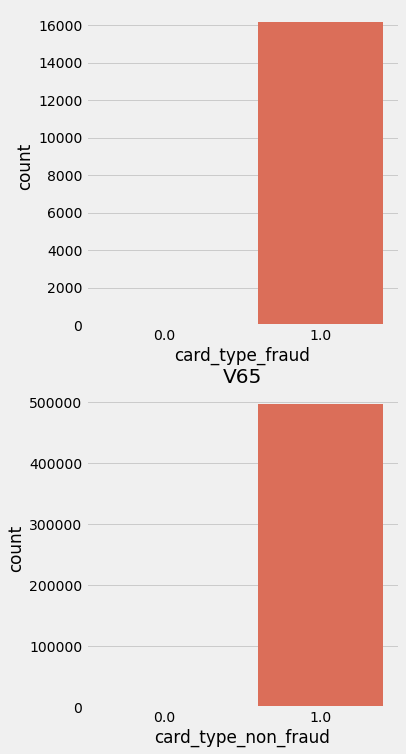

Missing data in  V88 :  15.099 %
Count of  3   V88 types for fraud and non-fraud


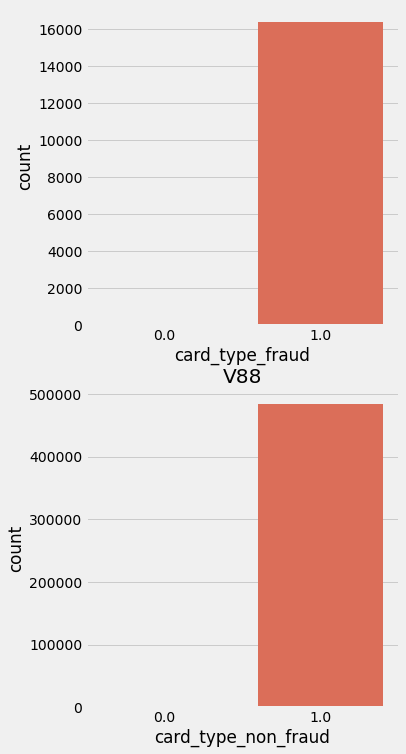

Missing data in  V107 :  0.053 %
Count of  3   V107 types for fraud and non-fraud


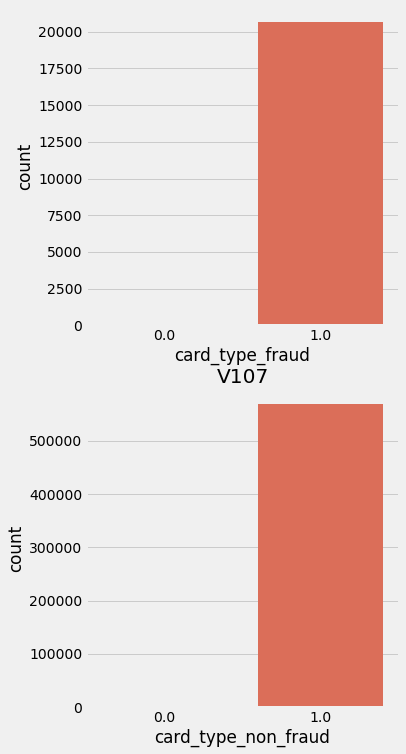

Missing data in  V305 :  0.002 %
Count of  3   V305 types for fraud and non-fraud


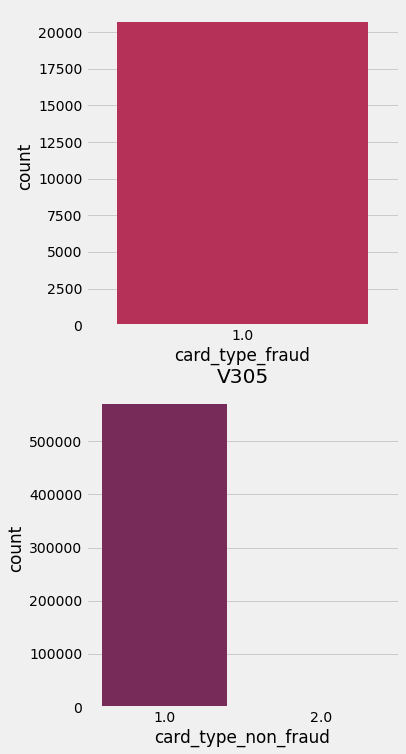

In [61]:
print('Count of V1, V14, V41, V65, V88, V107, V305 (binary classes)')
for i in V_binary_var:
    analysis_categorical(str(i),3,fig_r=5,fig_c=12,rotate=0)

id_01- id_11

Given:
Numerical features

In [62]:
id=[c for c in train.columns if 'id_' in c]

In [63]:
train[id[:11]].head()

id_01    id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  \
0    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    0.0  70787.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   id_11  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4  100.0

In [64]:
train[id[:11]].describe()

id_01        id_02         id_03         id_04     id_05     id_06  \
count  144233.0  140872.0000  66324.000000  66324.000000  136865.0  136865.0   
mean        NaN  174716.9375      0.060089     -0.059052       NaN       NaN   
std         0.0  159650.0000      0.598145      0.701172       0.0       0.0   
min      -100.0       1.0000    -13.000000    -28.000000     -72.0    -100.0   
25%       -10.0   67992.0000      0.000000      0.000000       0.0      -6.0   
50%        -5.0  125800.5000      0.000000      0.000000       0.0       0.0   
75%        -5.0  228749.0000      0.000000      0.000000       1.0       0.0   
max         0.0  999595.0000     10.000000      0.000000      52.0       0.0   

             id_07        id_08         id_09         id_10     id_11  
count  5155.000000  5155.000000  74926.000000  74926.000000  140978.0  
mean           inf         -inf      0.091187     -0.301025       NaN  
std      11.382812    26.078125      0.000000      0.000000       0.0  
min     -46.000000  -100.000000    -36.000000   -100.000000      90.0  
25%       5.000000   -48.000000      0.000000      0.000000     100.0  
50%      14.000000   -34.000000      0.000000      0.000000     100.0  
75%      22.000000   -23.000000      0.000000      0.000000     100.0  
max      61.000000     0.000000     25.000000      0.000000     100.0

Missing data in  id_01 :  75.576 %
Distribution of  id_01 (Red: Fraud| Green: Non Fraud)


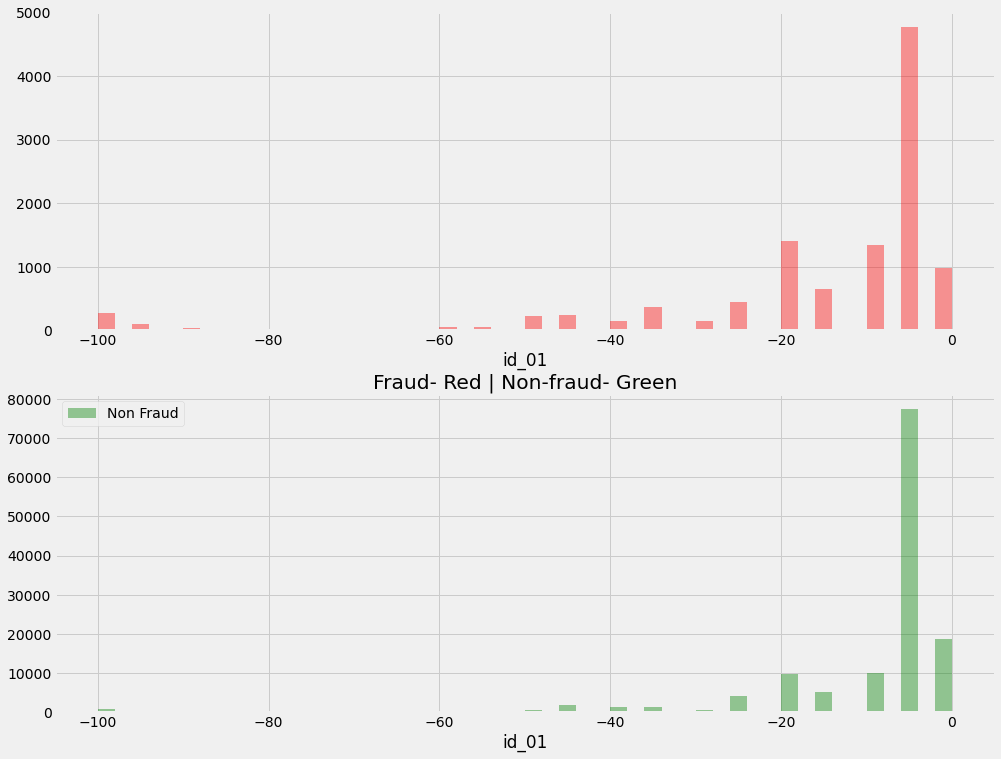

Missing data in  id_02 :  76.145 %
Distribution of  id_02 (Red: Fraud| Green: Non Fraud)


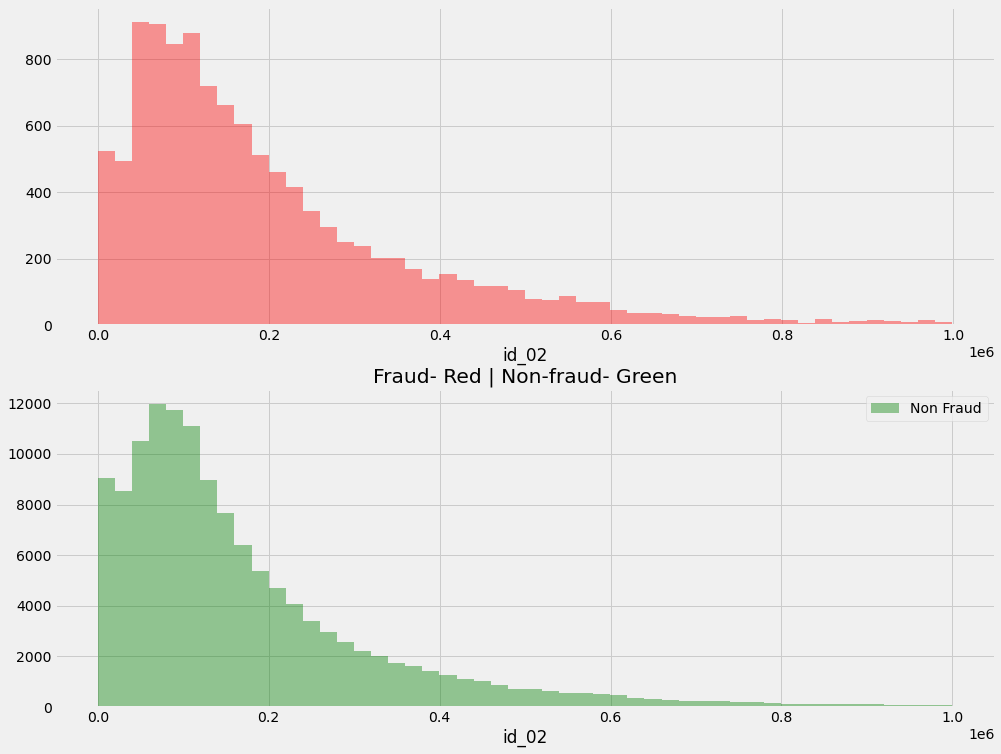

Missing data in  id_03 :  88.769 %
Distribution of  id_03 (Red: Fraud| Green: Non Fraud)


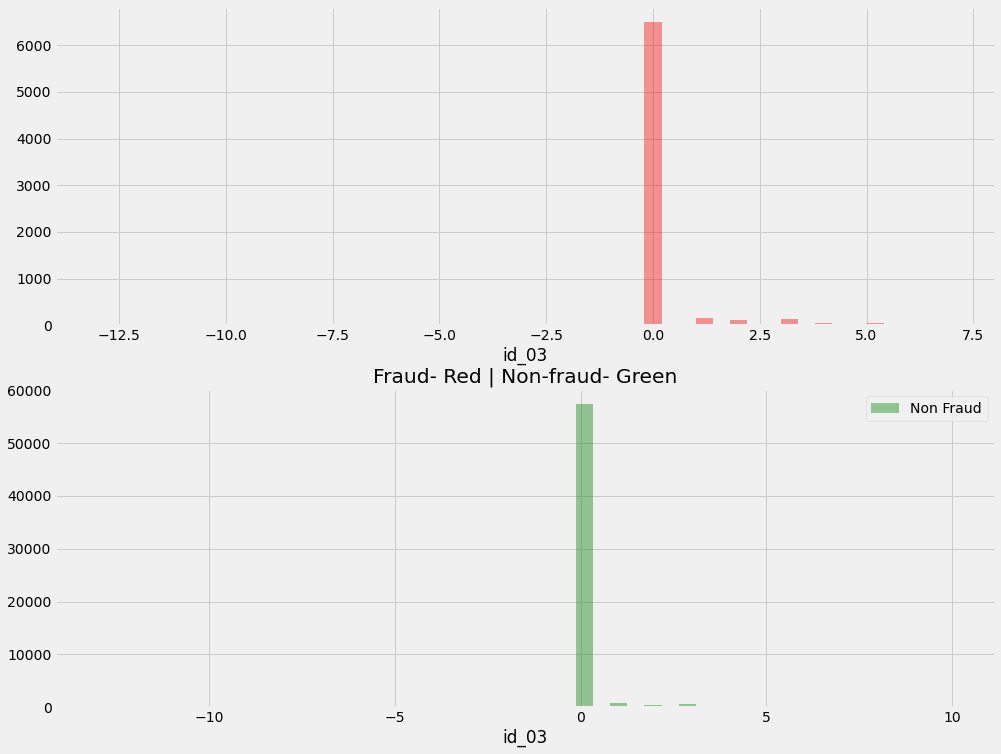

Missing data in  id_04 :  88.769 %
Distribution of  id_04 (Red: Fraud| Green: Non Fraud)


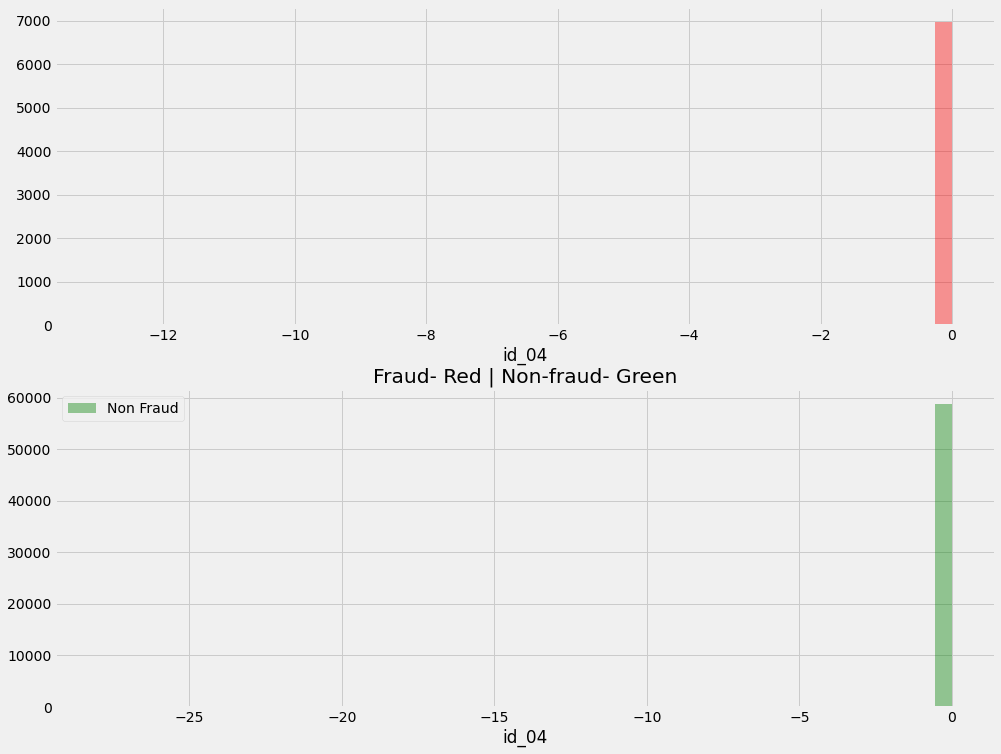

Missing data in  id_05 :  76.824 %
Distribution of  id_05 (Red: Fraud| Green: Non Fraud)


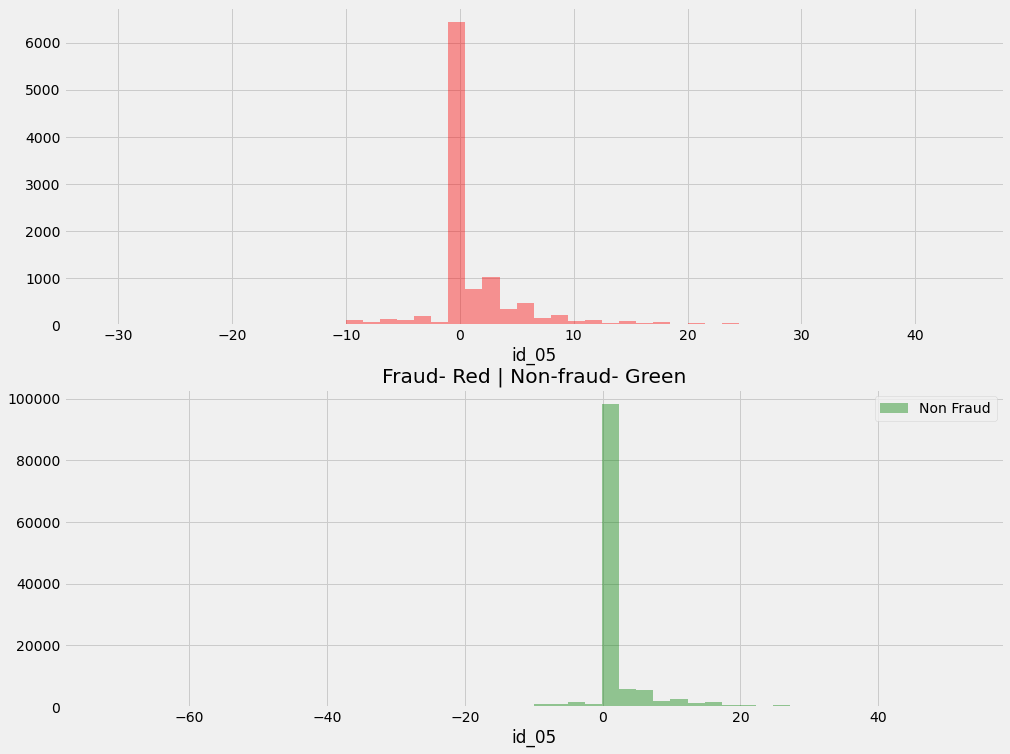

Missing data in  id_06 :  76.824 %
Distribution of  id_06 (Red: Fraud| Green: Non Fraud)


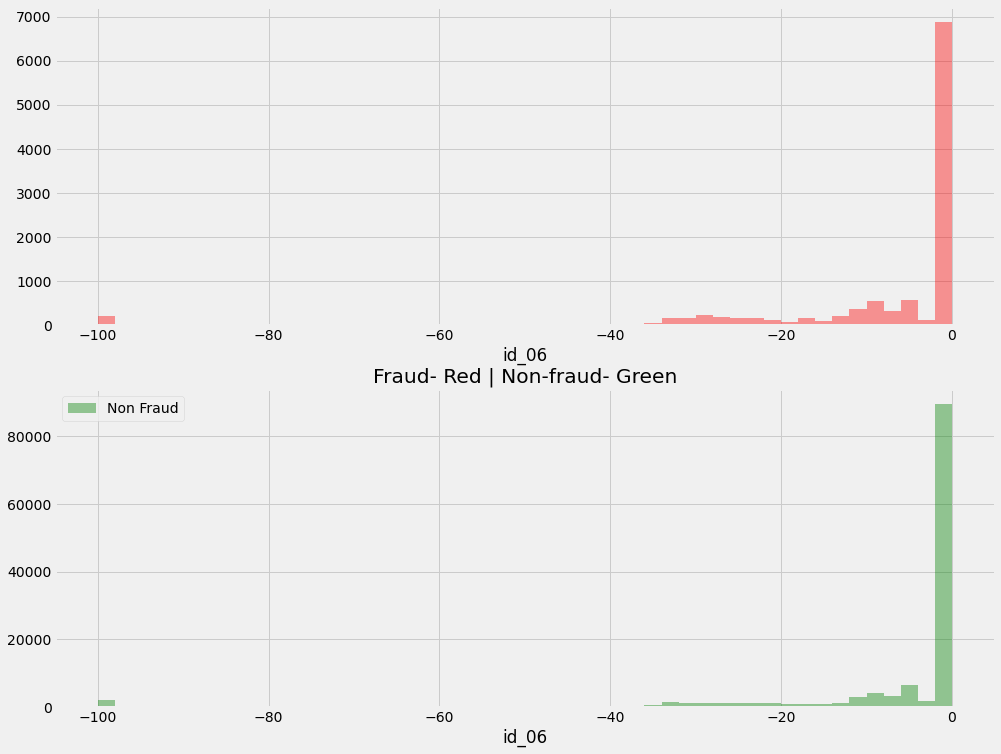

Missing data in  id_07 :  99.127 %
Distribution of  id_07 (Red: Fraud| Green: Non Fraud)


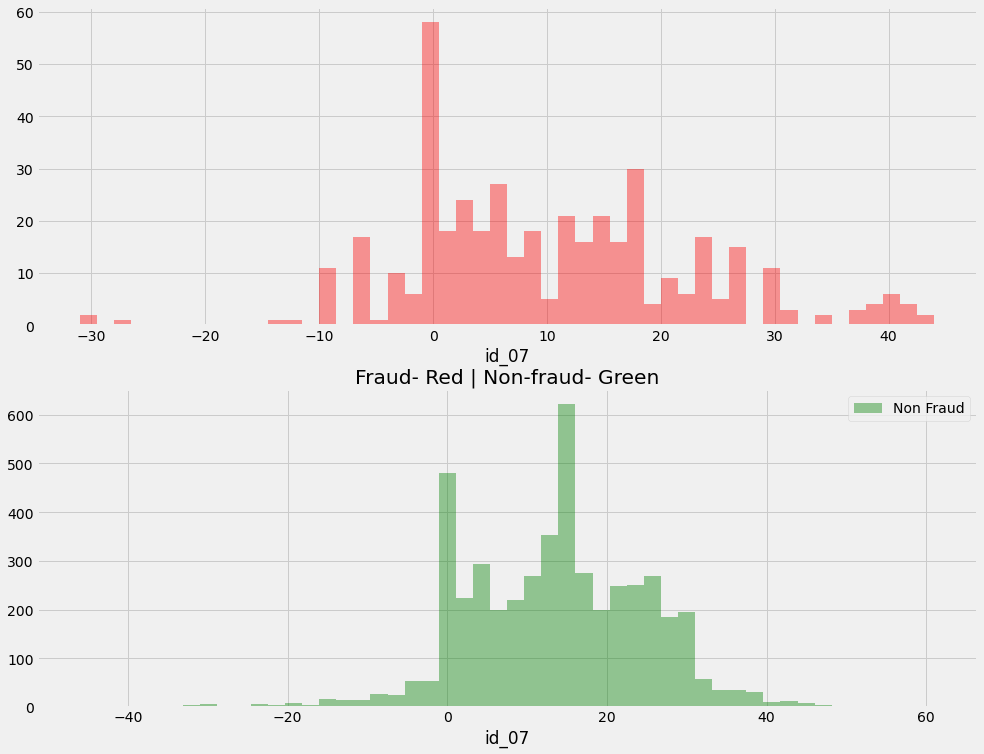

Missing data in  id_08 :  99.127 %
Distribution of  id_08 (Red: Fraud| Green: Non Fraud)


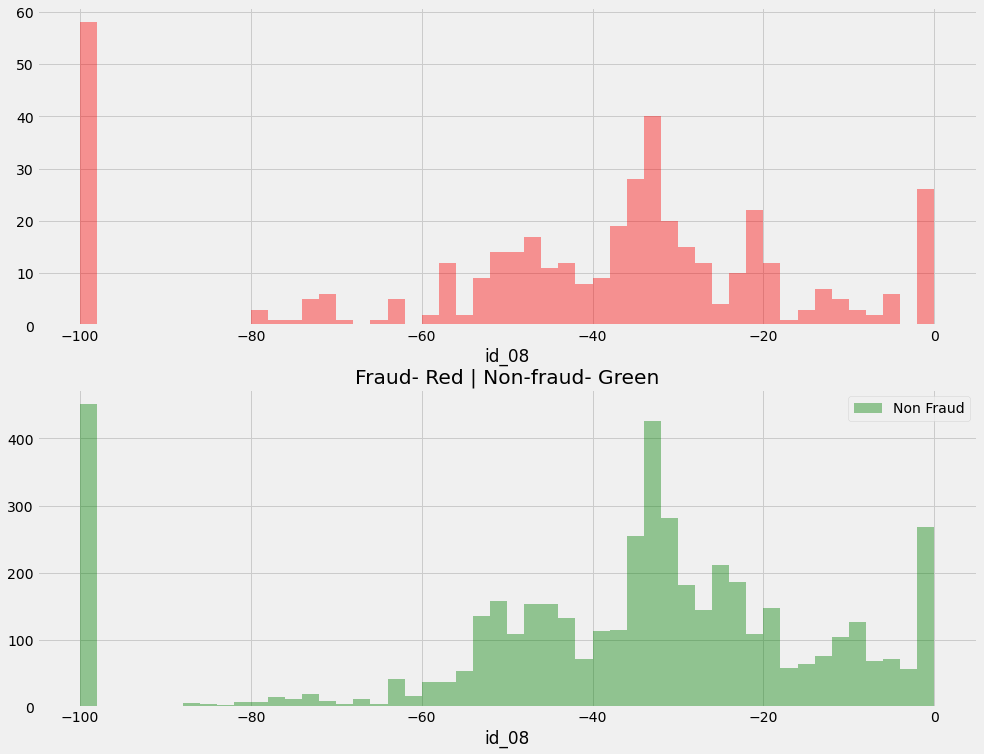

Missing data in  id_09 :  87.312 %
Distribution of  id_09 (Red: Fraud| Green: Non Fraud)


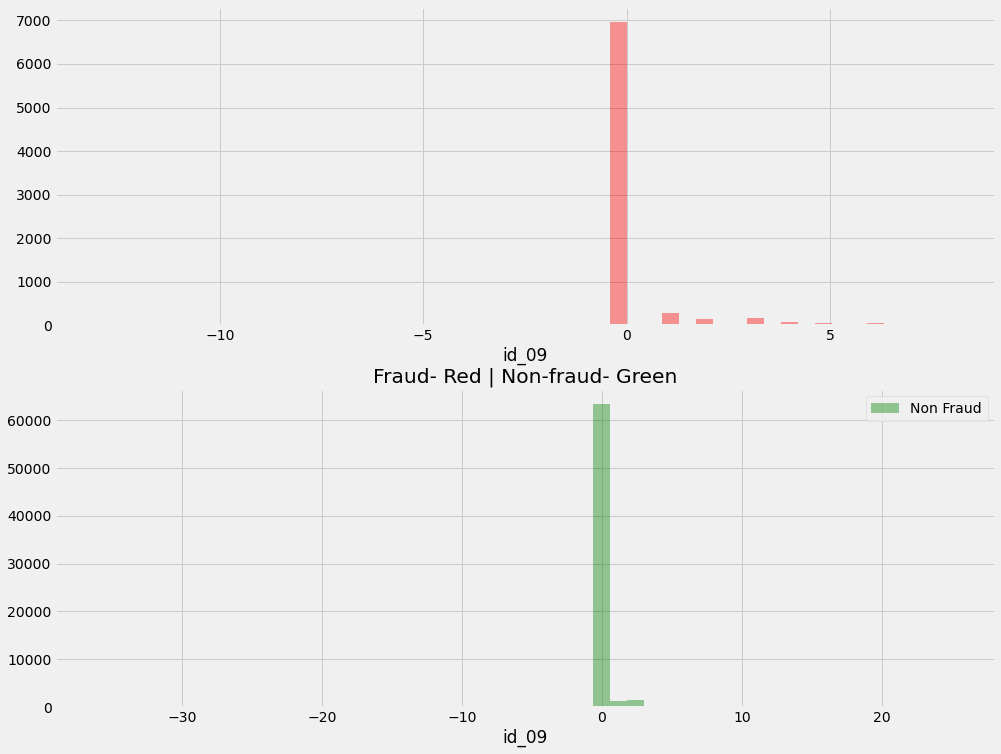

Missing data in  id_10 :  87.312 %
Distribution of  id_10 (Red: Fraud| Green: Non Fraud)


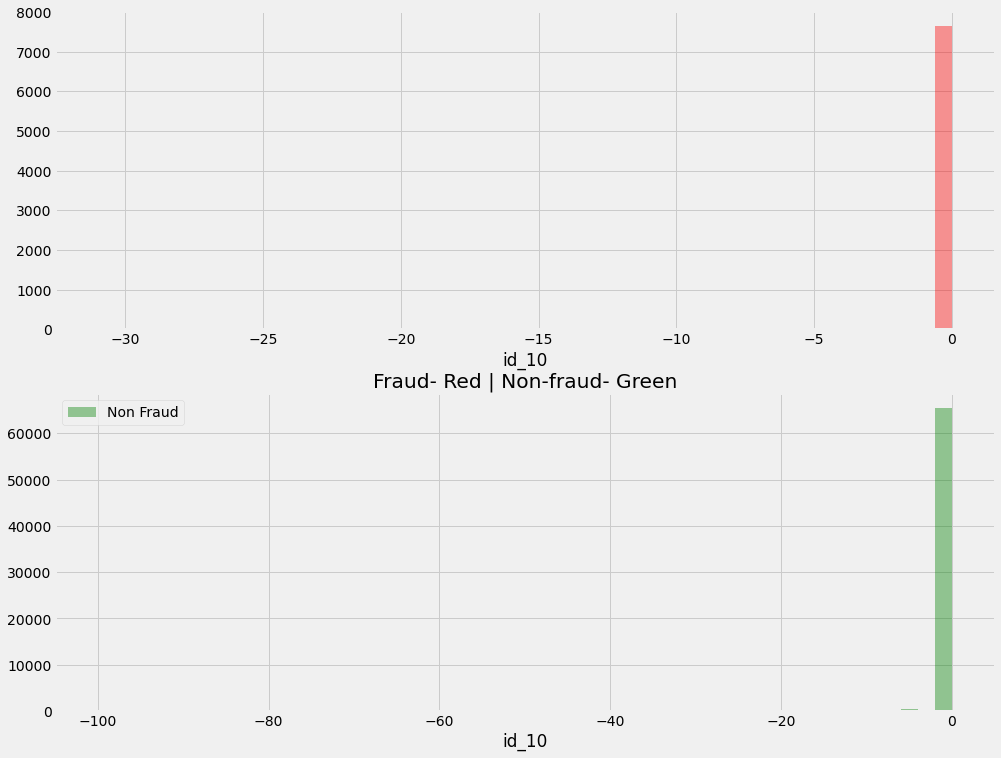

Missing data in  id_11 :  76.127 %
Distribution of  id_11 (Red: Fraud| Green: Non Fraud)


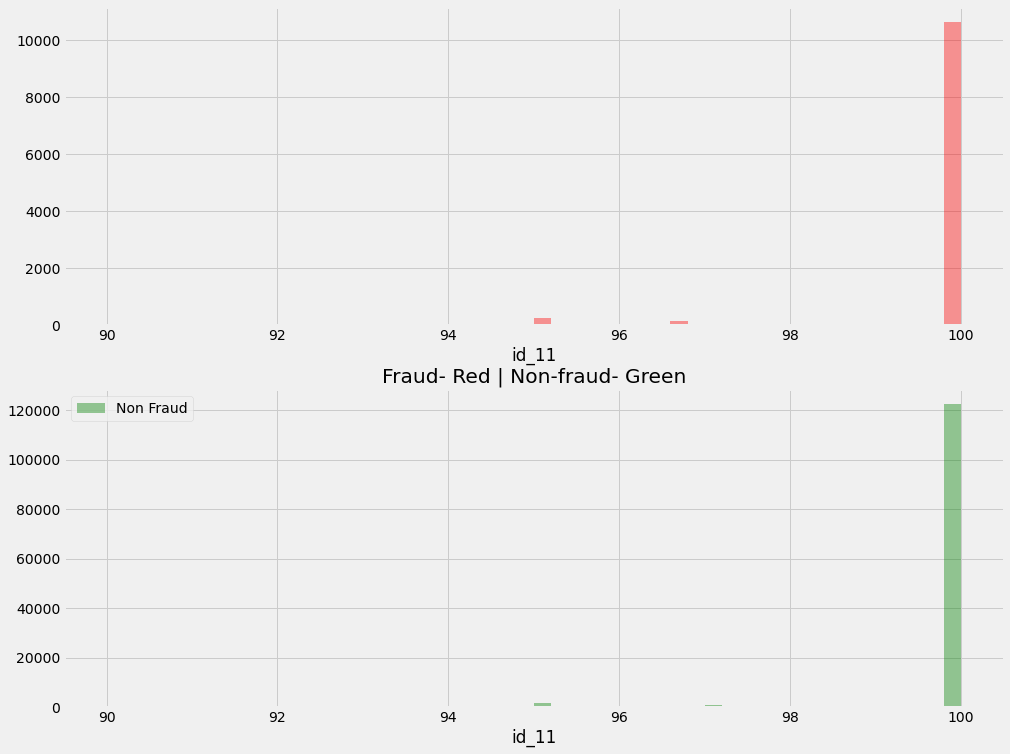

In [65]:
for i in id[:11]:
    analysis_numerical(str(i),rotate=0,fig_r=15,fig_c=12)

Observations:

id_01,id_06: left skewed(for both fraud and non-fraud data)

id_02: right skewed(for both fraud and non-fraud data)

id_05,id_07: normal distribution(for both fraud and non-fraud data)

id_08: normal distribution(for both fraud and non-fraud data) with two peaks

Missing values > 75% for id_01 - id_11

id_12 - id_38

Given:
    Categorical features

Missing data in  id_13 :  78.44 %
Count of  20   id_13 types for fraud and non-fraud


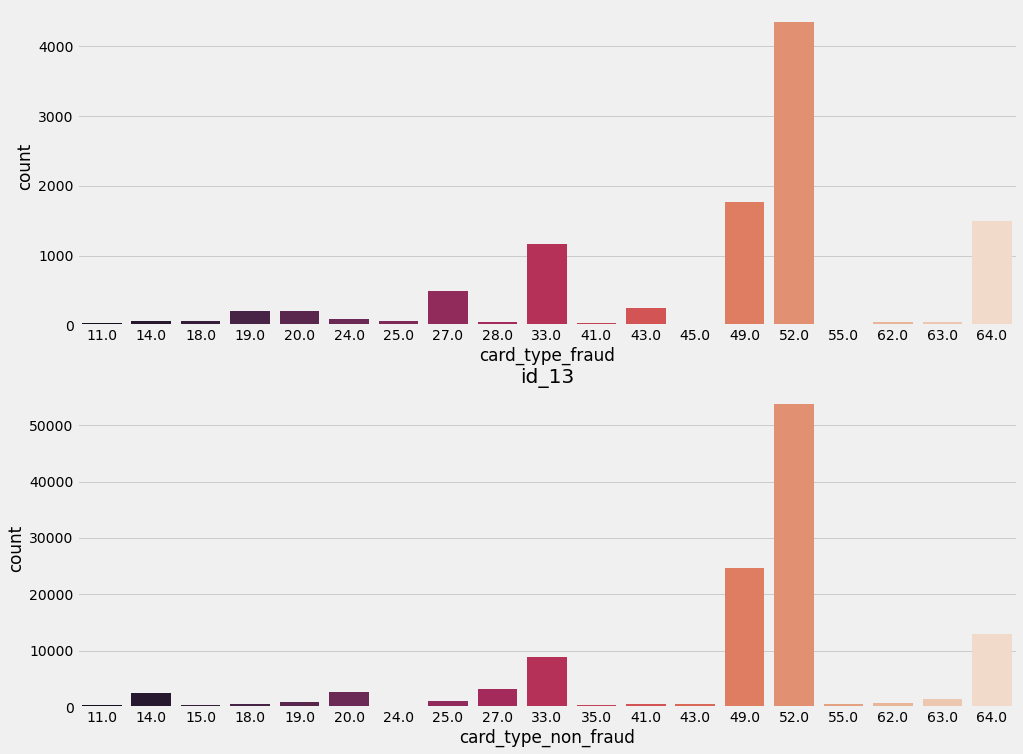

Missing data in  id_14 :  86.446 %
Count of  20   id_14 types for fraud and non-fraud


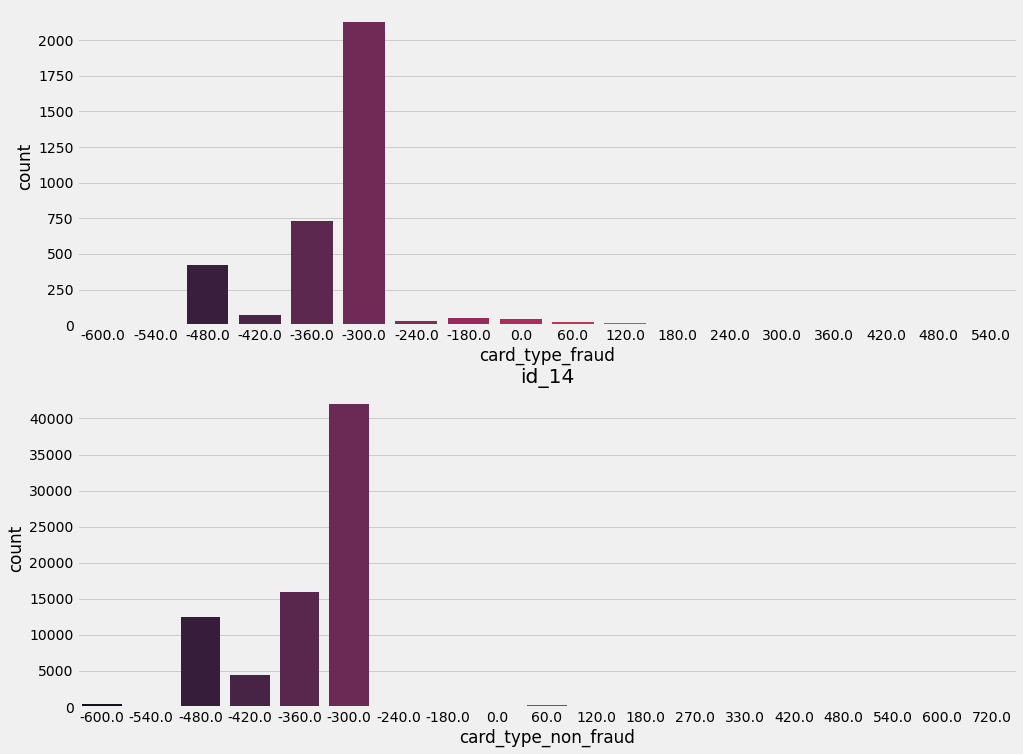

Missing data in  id_15 :  76.126 %
Count of  20   id_15 types for fraud and non-fraud


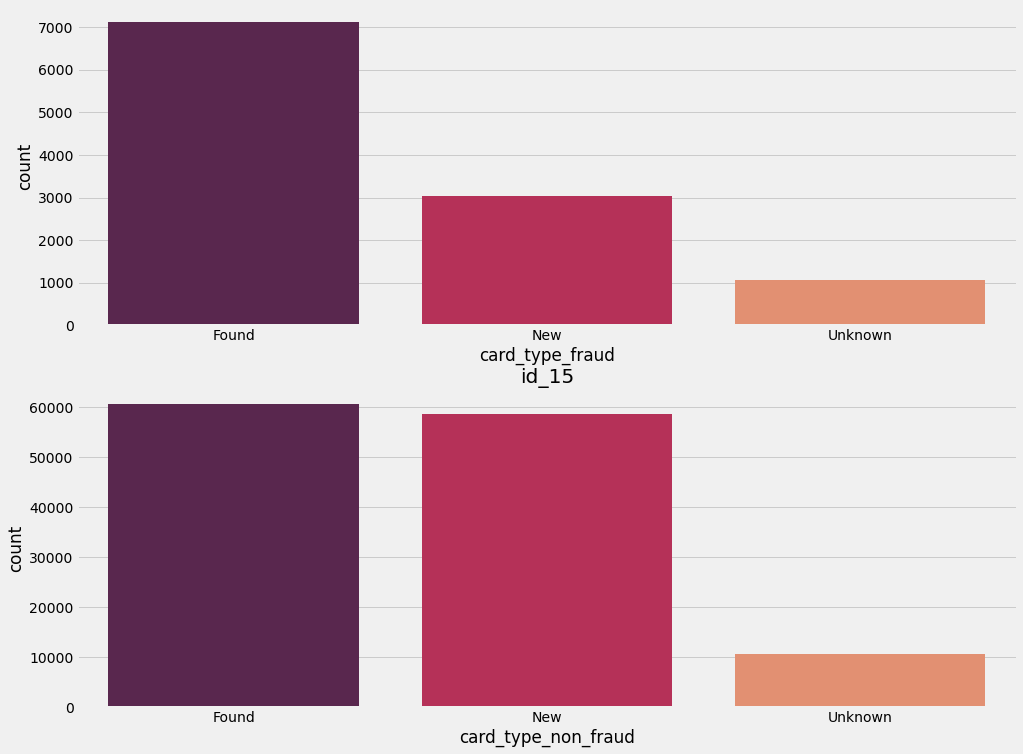

Missing data in  id_16 :  78.098 %
Count of  20   id_16 types for fraud and non-fraud


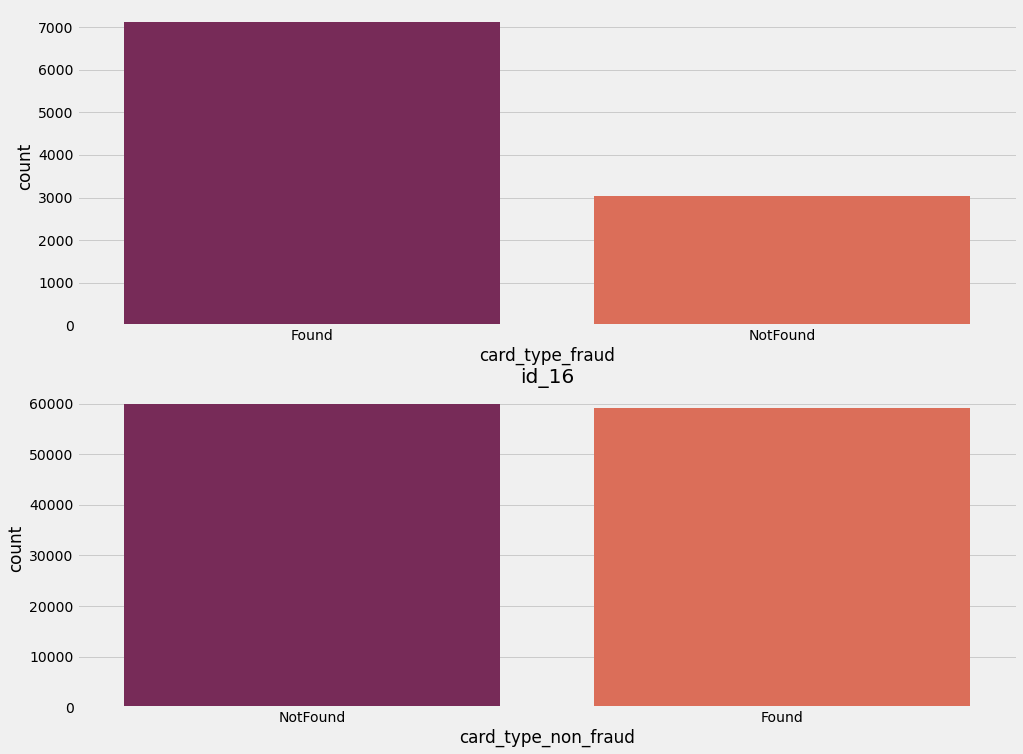

Missing data in  id_17 :  76.4 %
Count of  20   id_17 types for fraud and non-fraud


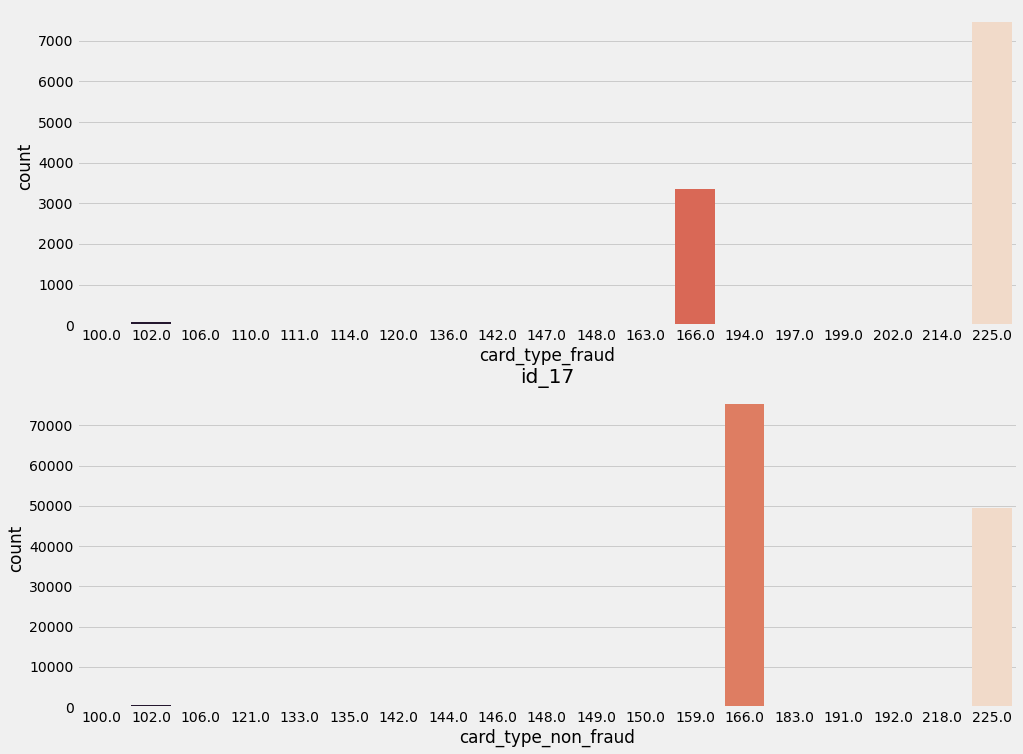

Missing data in  id_18 :  92.361 %
Count of  20   id_18 types for fraud and non-fraud


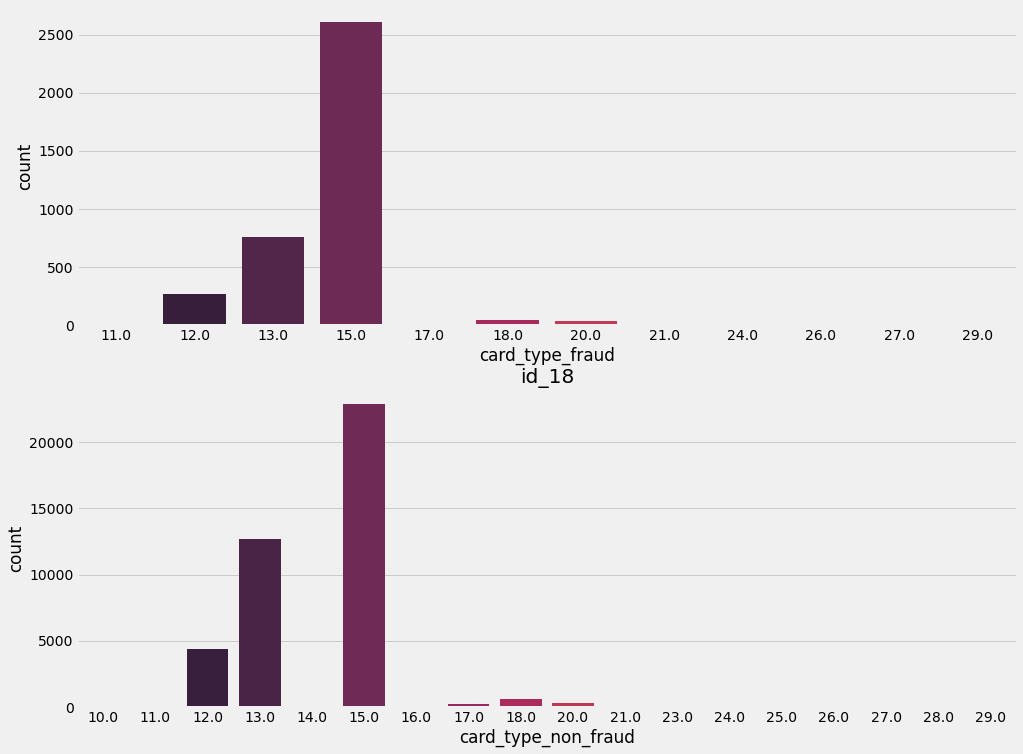

Missing data in  id_19 :  76.408 %
Count of  20   id_19 types for fraud and non-fraud


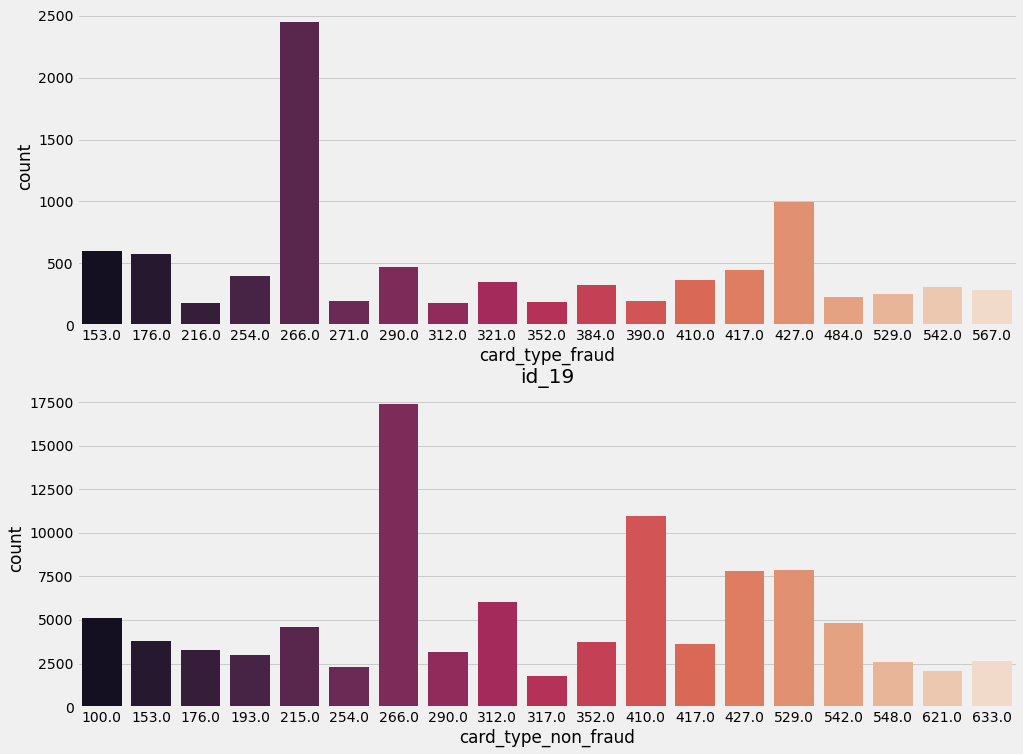

Missing data in  id_20 :  76.418 %
Count of  20   id_20 types for fraud and non-fraud


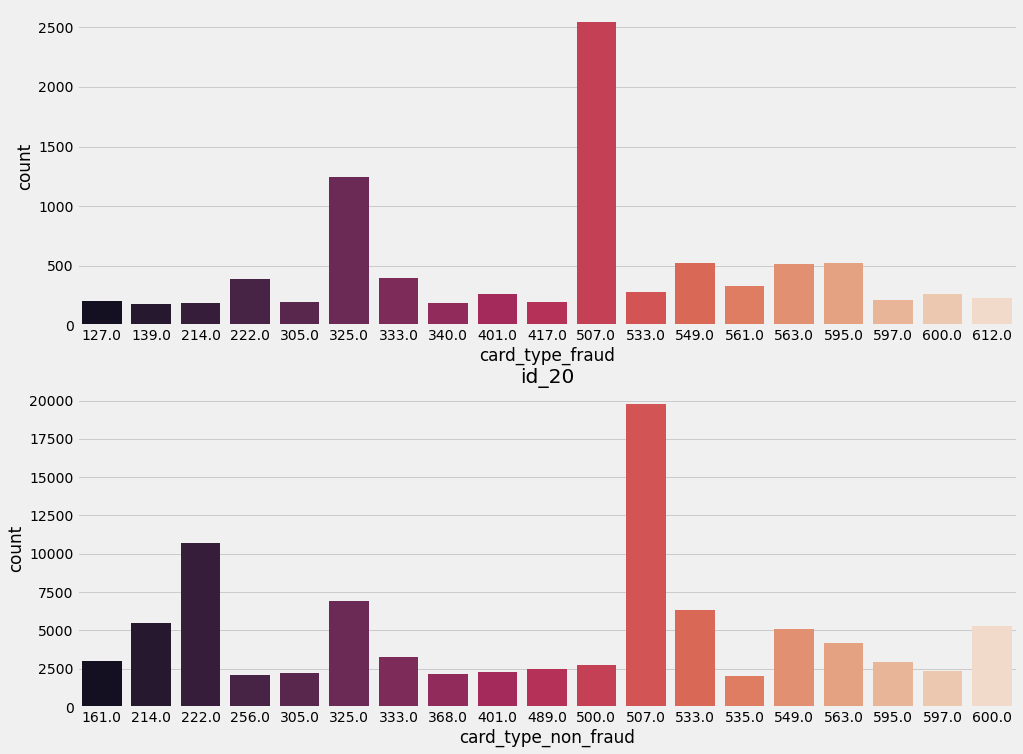

Missing data in  id_21 :  99.126 %
Count of  20   id_21 types for fraud and non-fraud


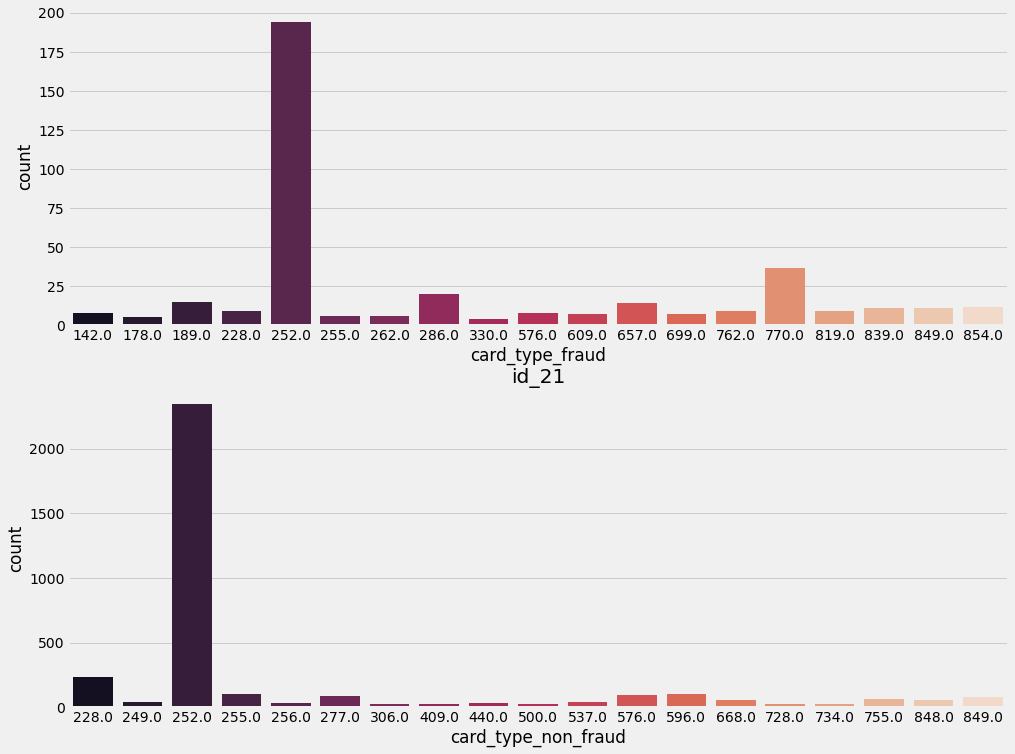

Missing data in  id_22 :  99.125 %
Count of  20   id_22 types for fraud and non-fraud


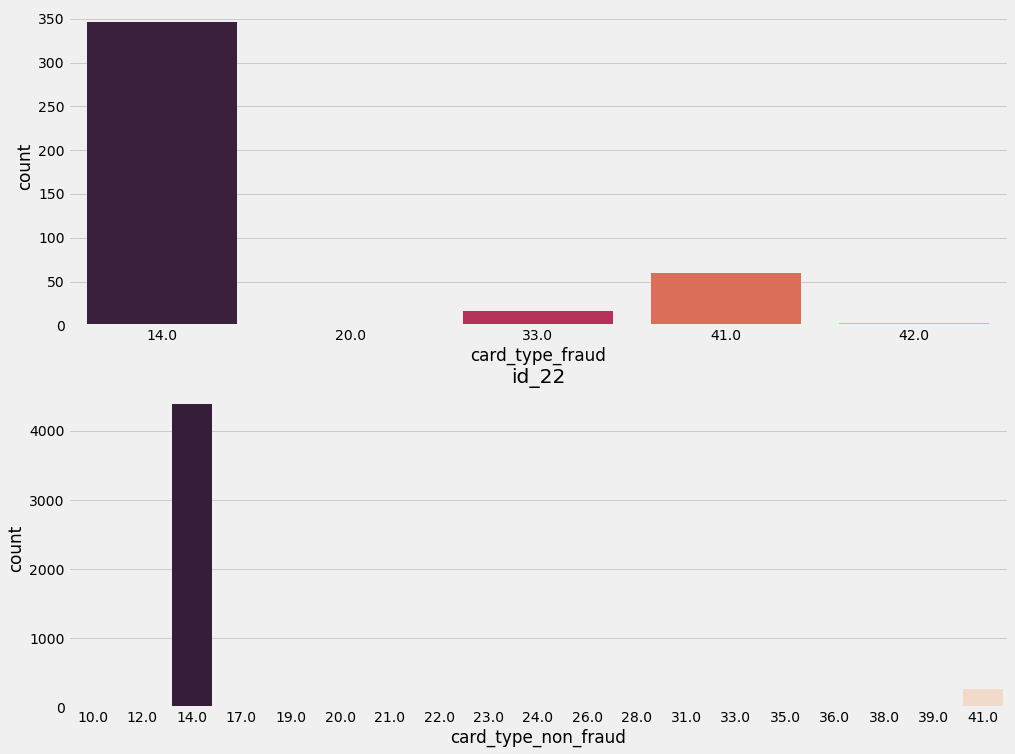

Missing data in  id_23 :  99.125 %
Count of  20   id_23 types for fraud and non-fraud


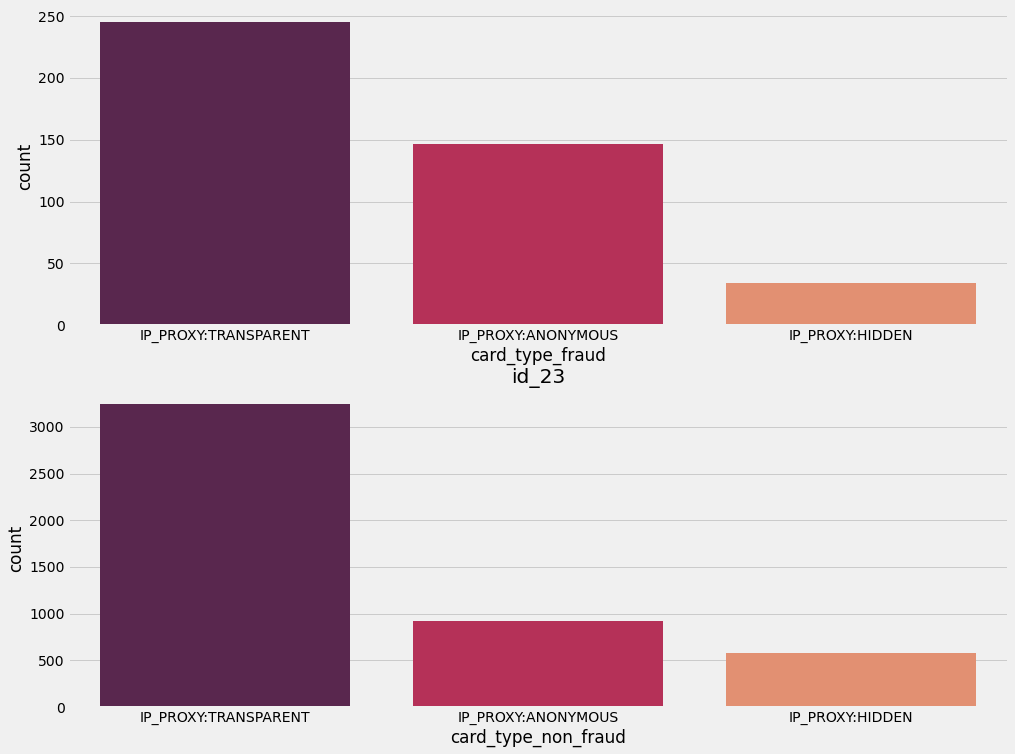

Missing data in  id_24 :  99.196 %
Count of  20   id_24 types for fraud and non-fraud


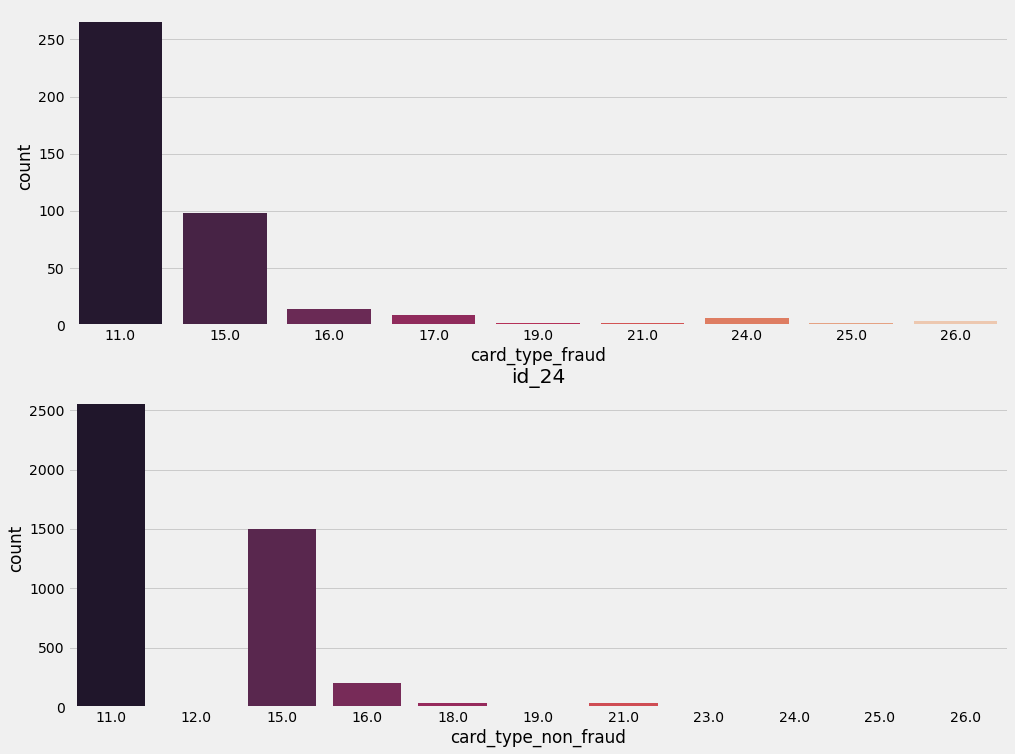

Missing data in  id_25 :  99.131 %
Count of  20   id_25 types for fraud and non-fraud


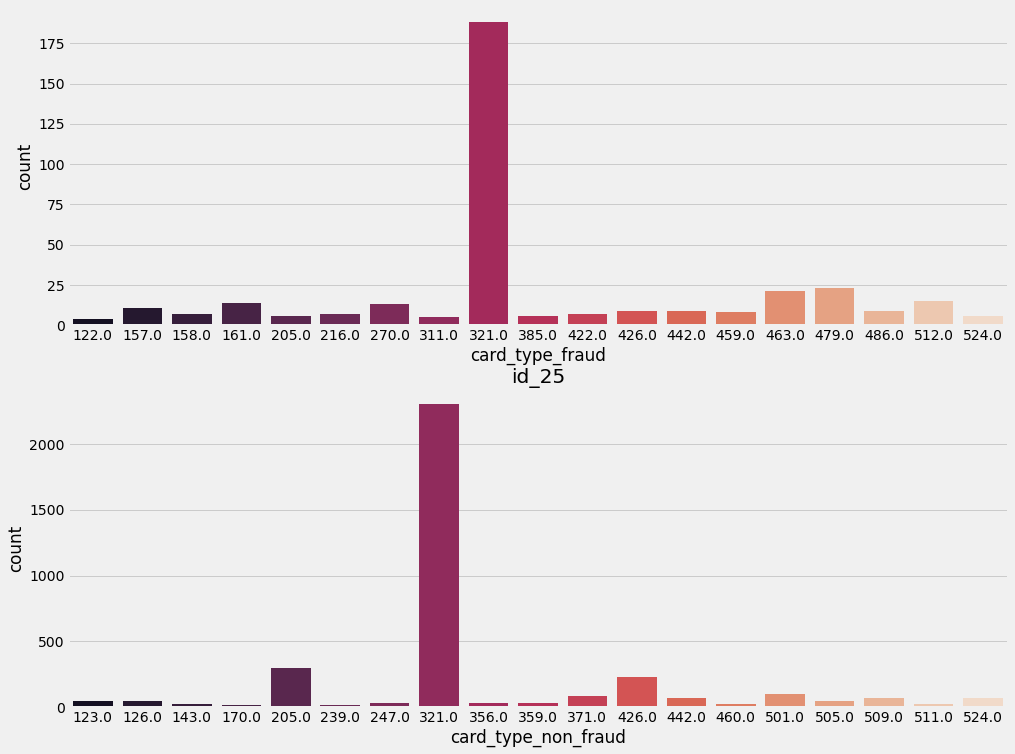

Missing data in  id_26 :  99.126 %
Count of  20   id_26 types for fraud and non-fraud


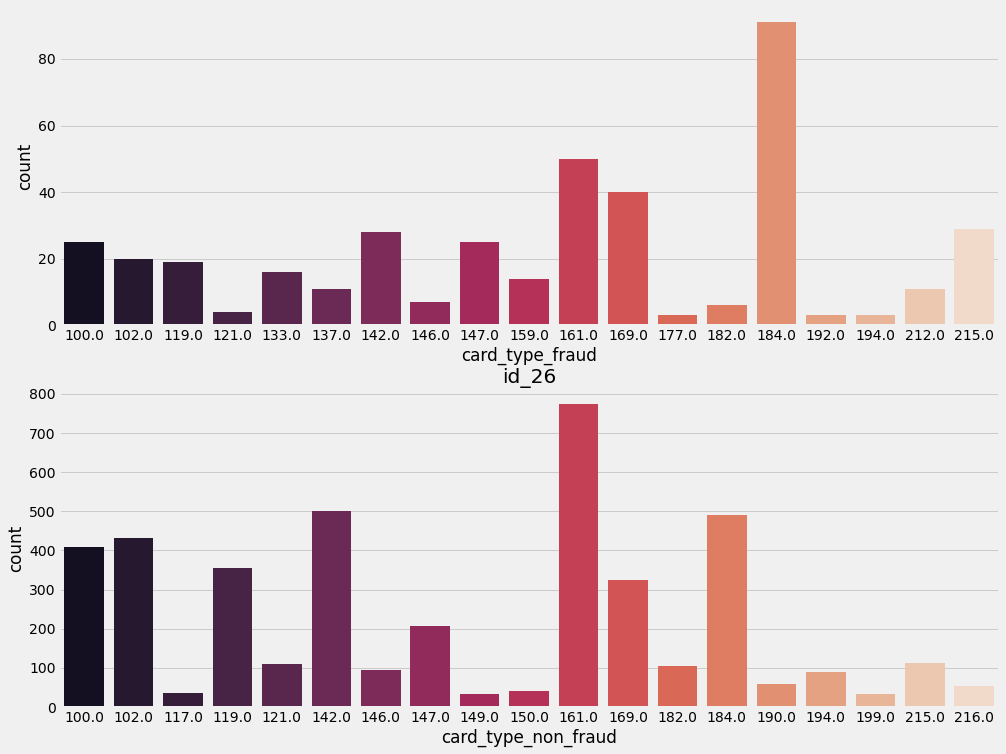

Missing data in  id_27 :  99.125 %
Count of  20   id_27 types for fraud and non-fraud


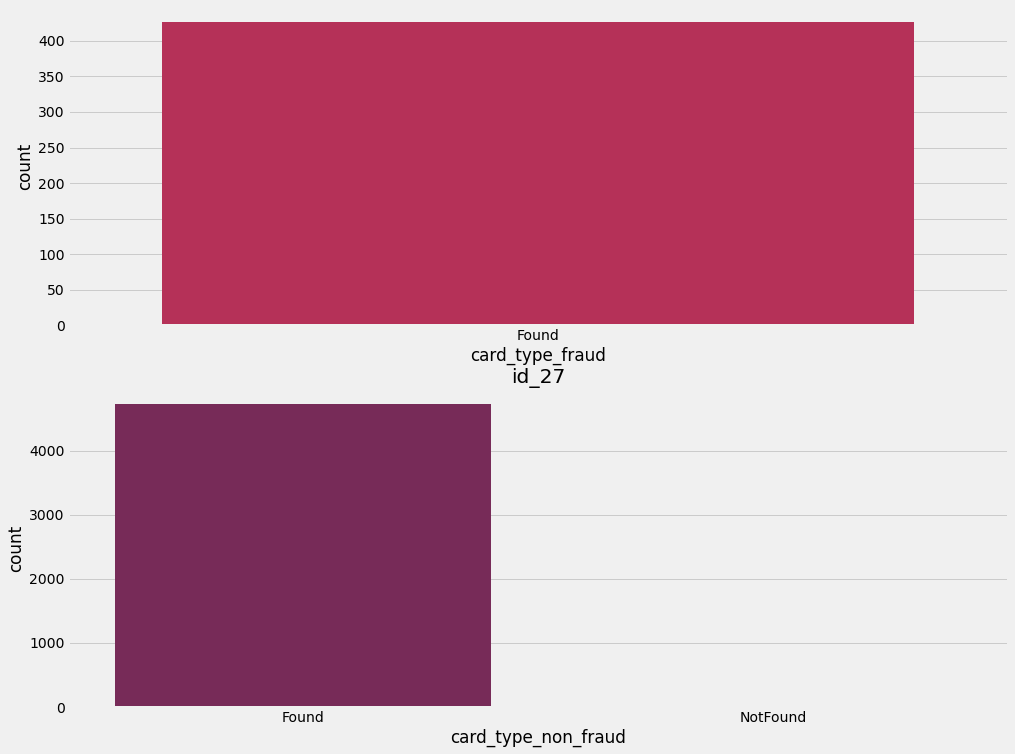

Missing data in  id_28 :  76.127 %
Count of  20   id_28 types for fraud and non-fraud


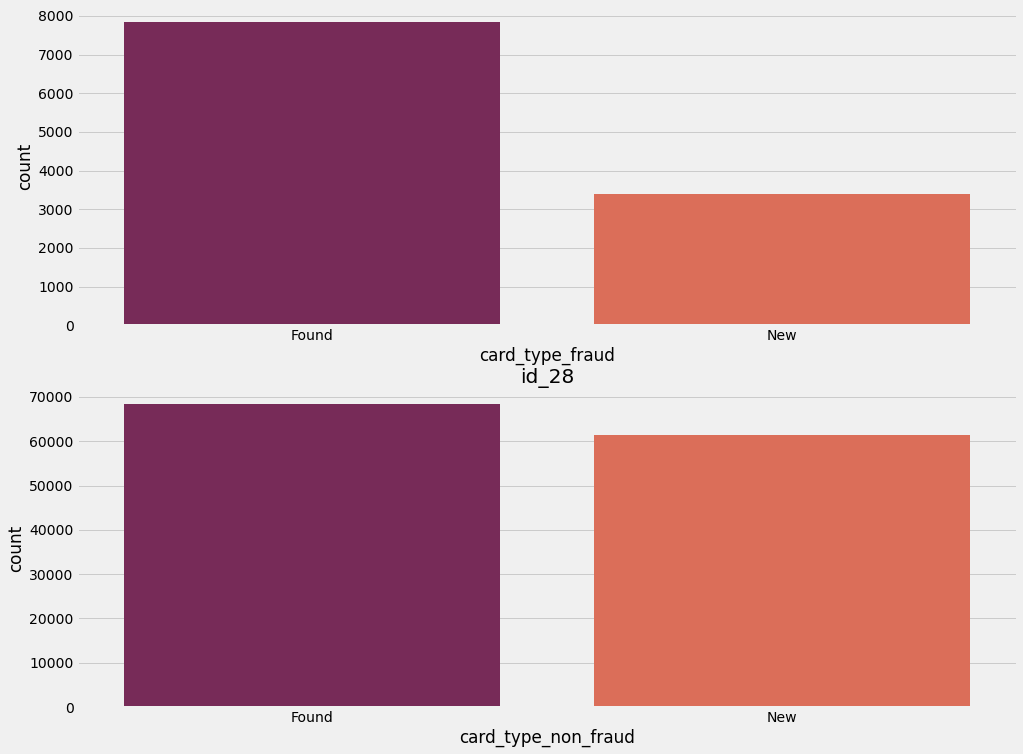

Missing data in  id_29 :  76.127 %
Count of  20   id_29 types for fraud and non-fraud


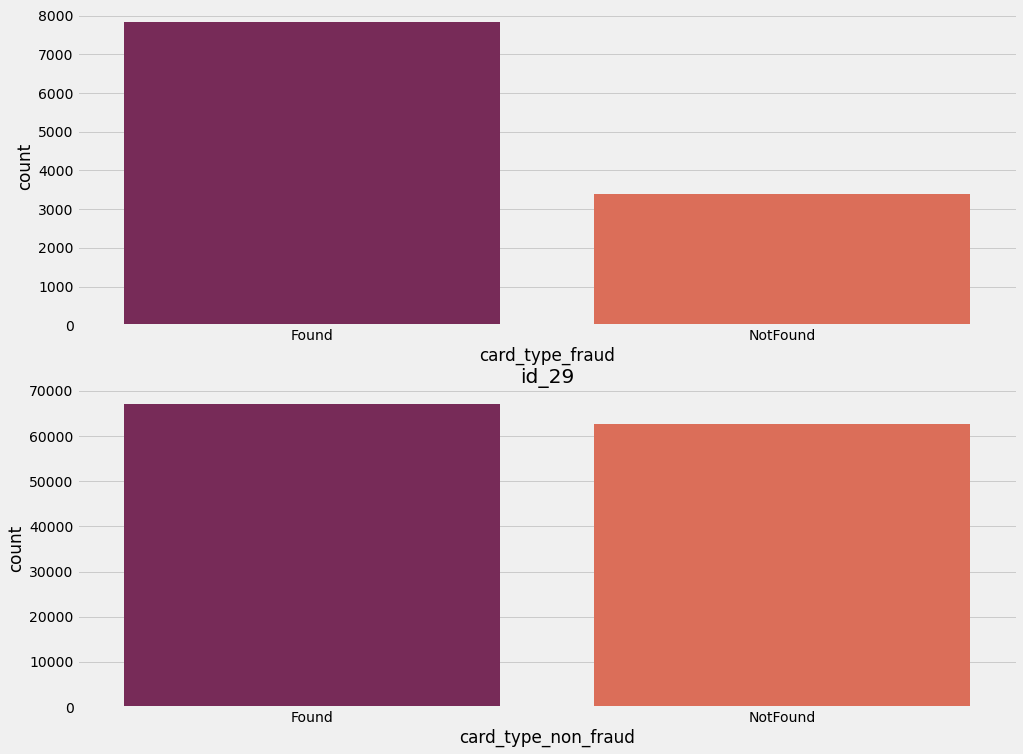

Missing data in  id_30 :  86.865 %
Count of  20   id_30 types for fraud and non-fraud


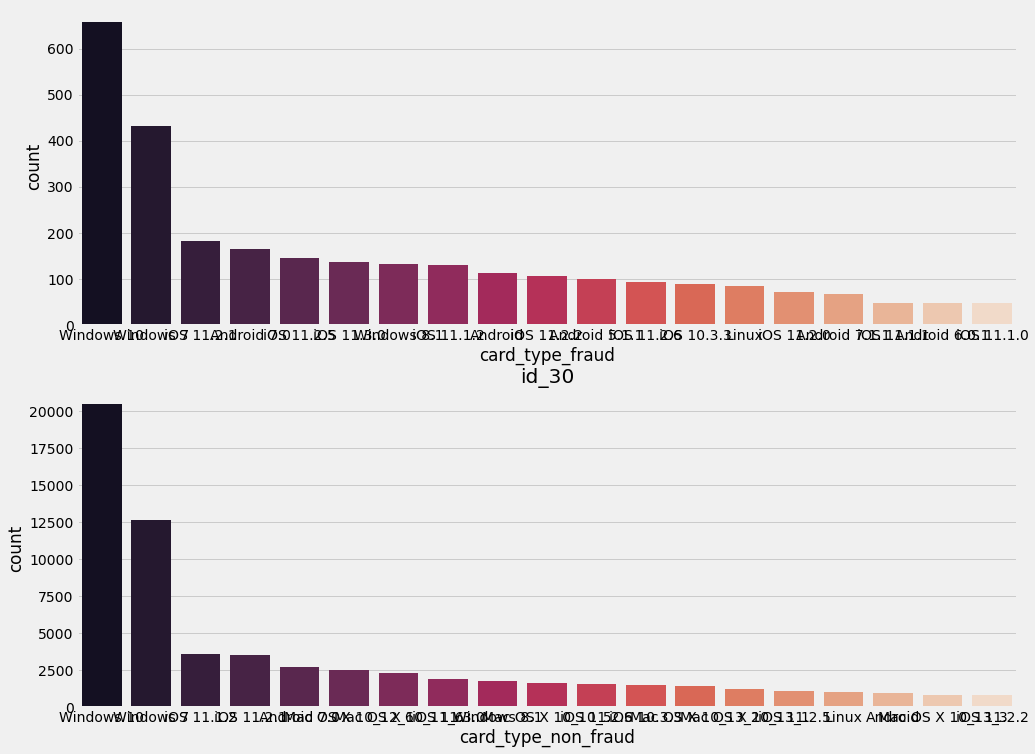

Missing data in  id_31 :  76.245 %
Count of  20   id_31 types for fraud and non-fraud


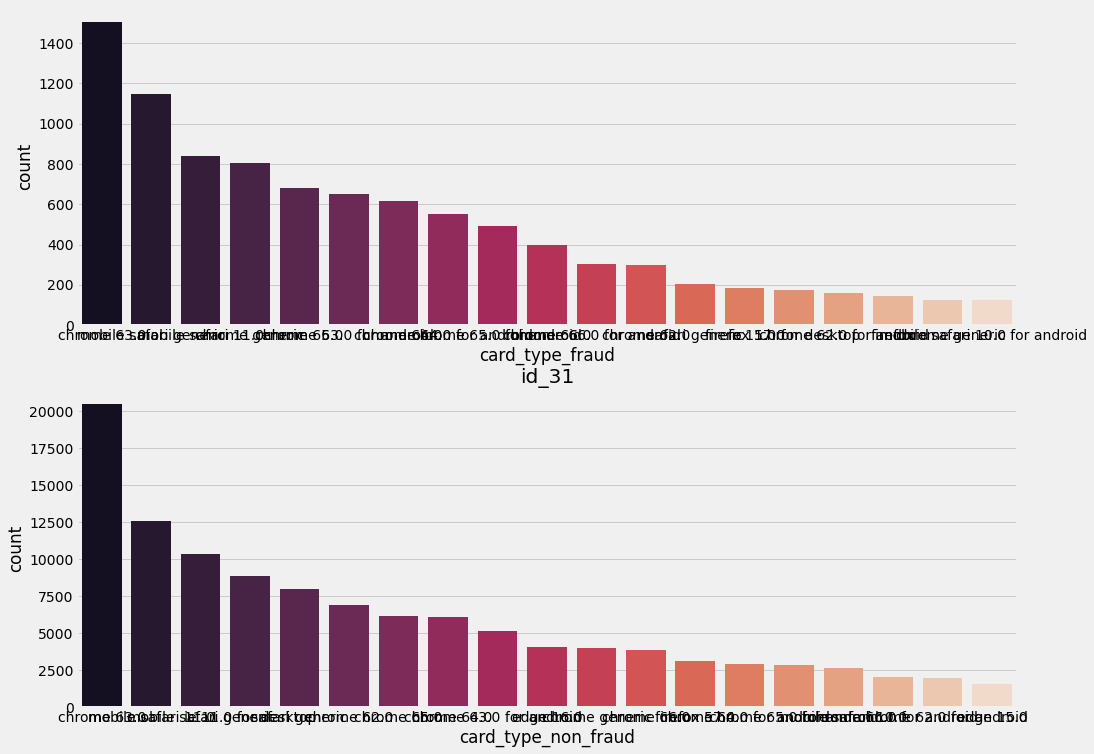

Missing data in  id_32 :  86.862 %
Count of  20   id_32 types for fraud and non-fraud


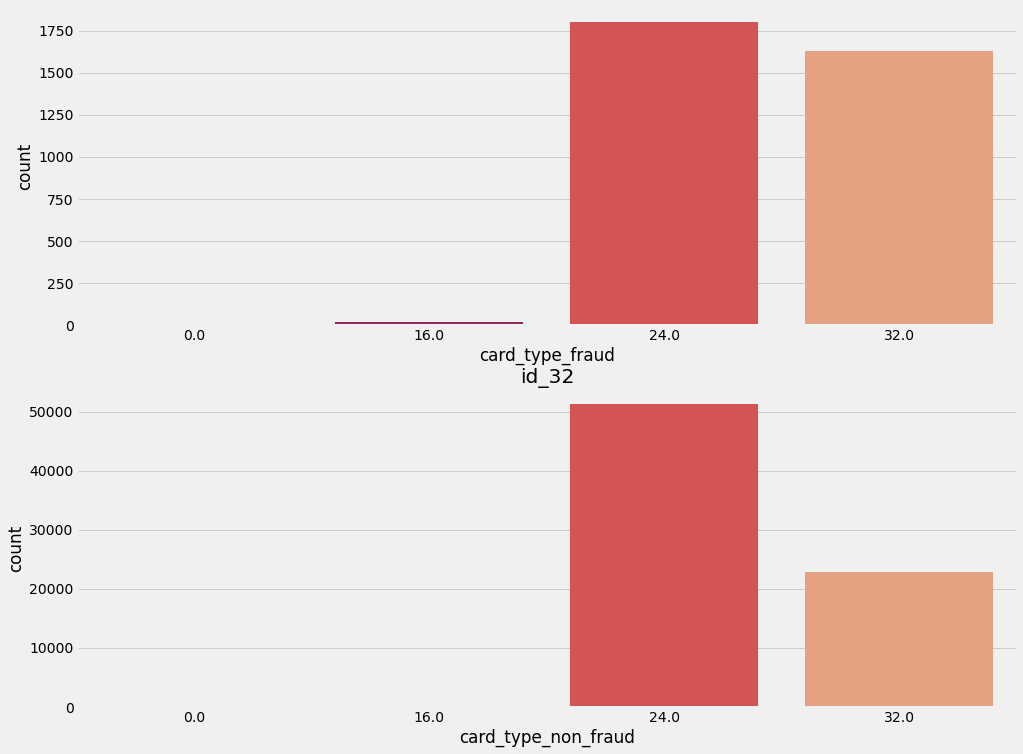

Missing data in  id_33 :  87.589 %
Count of  20   id_33 types for fraud and non-fraud


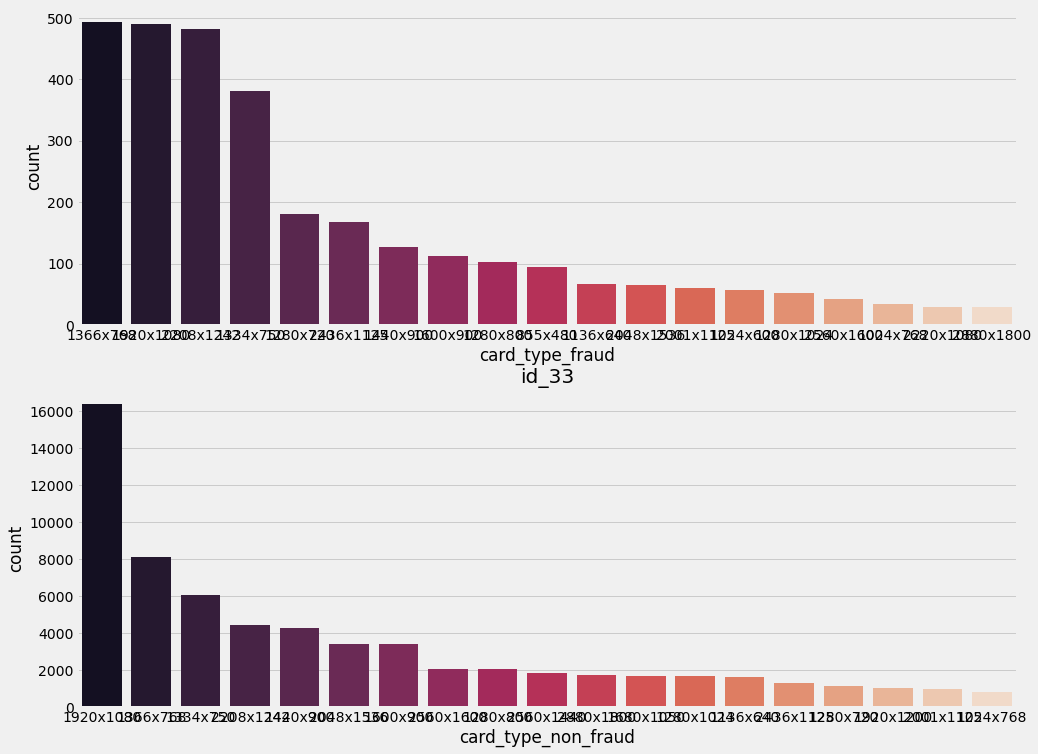

Missing data in  id_34 :  86.825 %
Count of  20   id_34 types for fraud and non-fraud


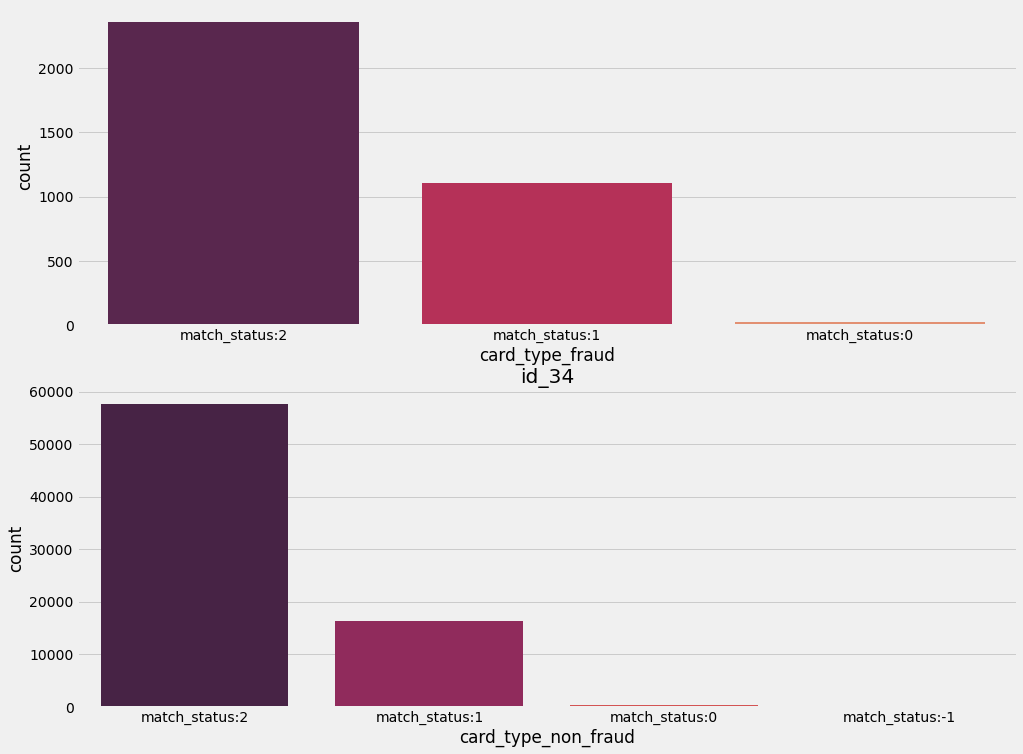

Missing data in  id_35 :  76.126 %
Count of  20   id_35 types for fraud and non-fraud


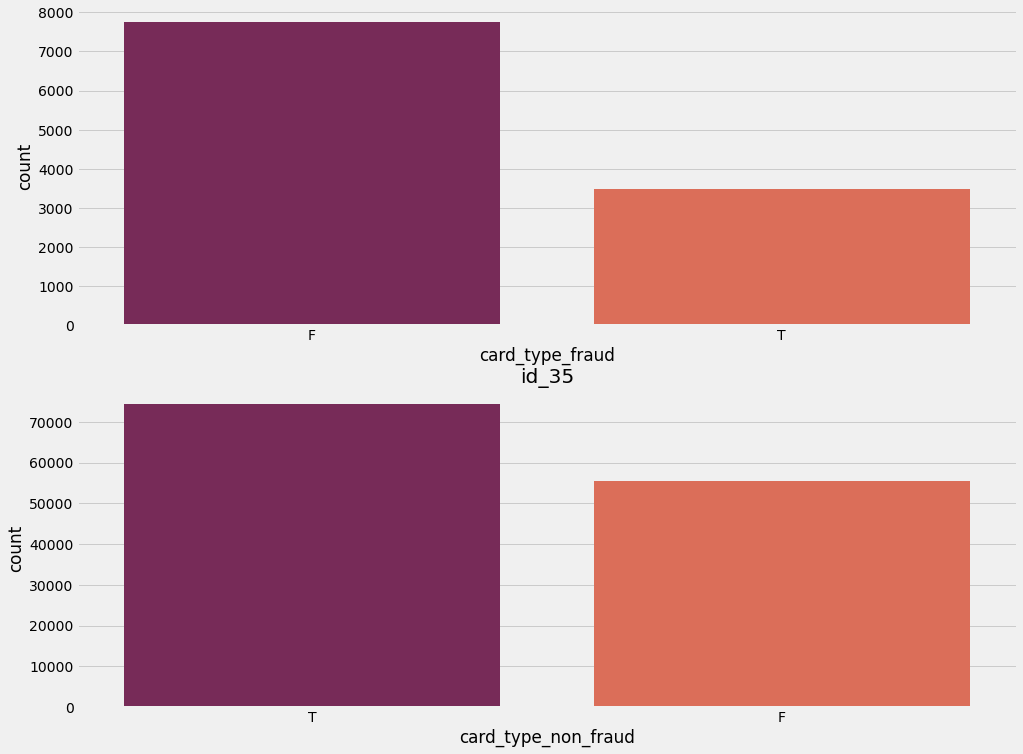

Missing data in  id_36 :  76.126 %
Count of  20   id_36 types for fraud and non-fraud


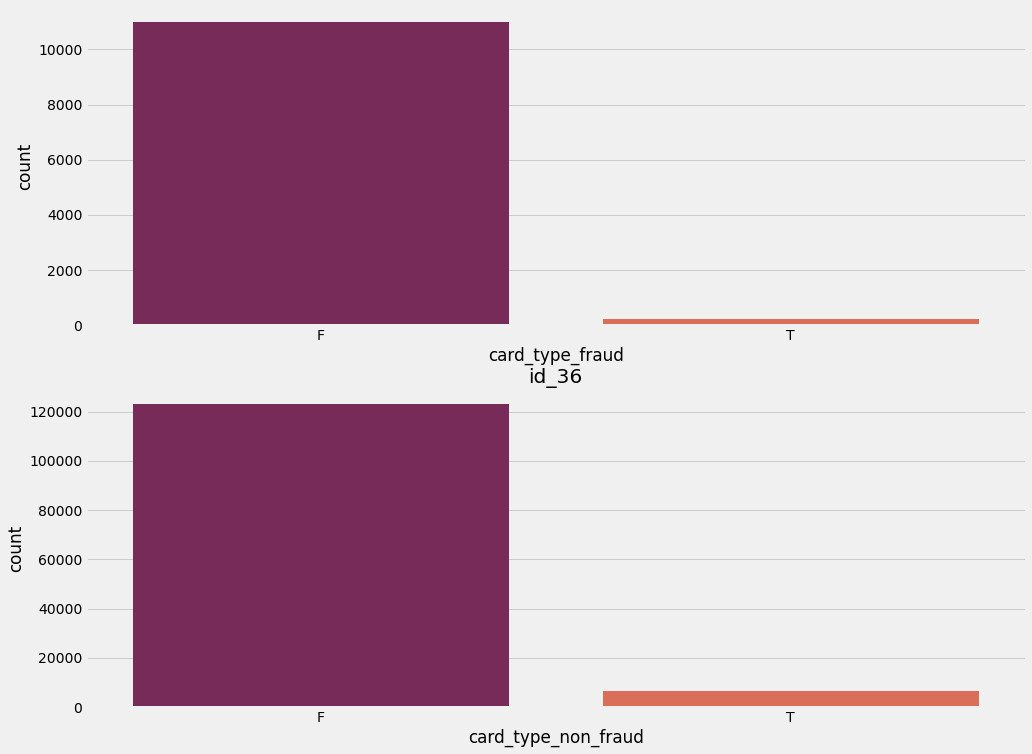

Missing data in  id_37 :  76.126 %
Count of  20   id_37 types for fraud and non-fraud


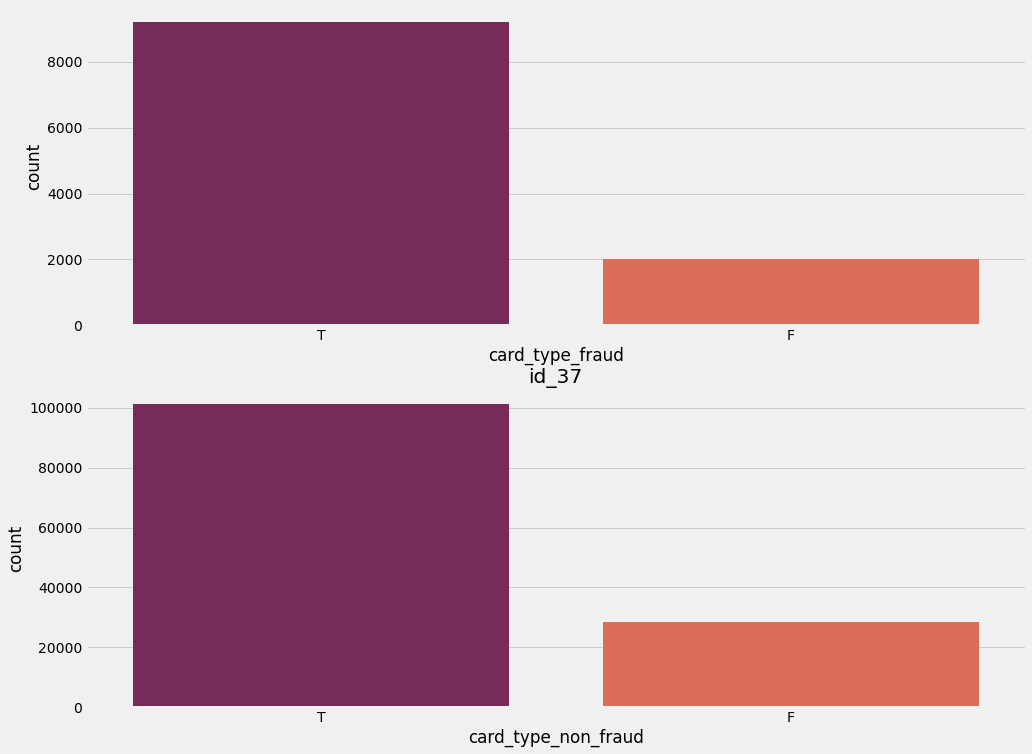

Missing data in  id_38 :  76.126 %
Count of  20   id_38 types for fraud and non-fraud


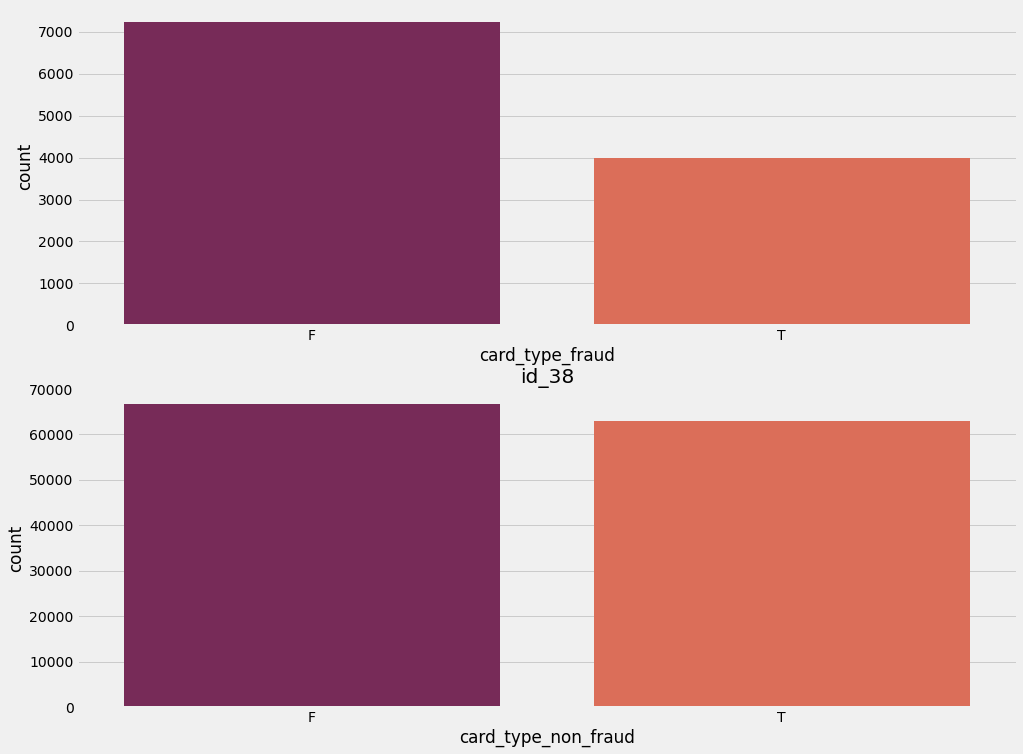

In [66]:
for i in id[12:]:
    analysis_categorical(str(i),20,rotate=0,fig_r=15,fig_c=12)

Observations:

id_15: Classes: Found,New,Unknown

id_16: Classes: Found,NotFound

id_23: Classes: IP_PROXY:TRANSPARENT,IP_PROXY:ANONYMOUS,IP_PROXY:HIDDEN

id_27: Classes: Found,NotFound

id_28: Classes: Found,New

id_29: Classes: Found,NotFound

id_34: Classes: match_status:2,match_status:1,match_status:0

id_35: Classes: F,T

id_36: Classes: F,T

id_37: Classes: F,T

id_38: Classes: F,T

Missing values > 75% for id_12 - id_38



DeviceType



Missing data in  DeviceType :  76.156 %
Count of  DeviceType types for fraud and non-fraud


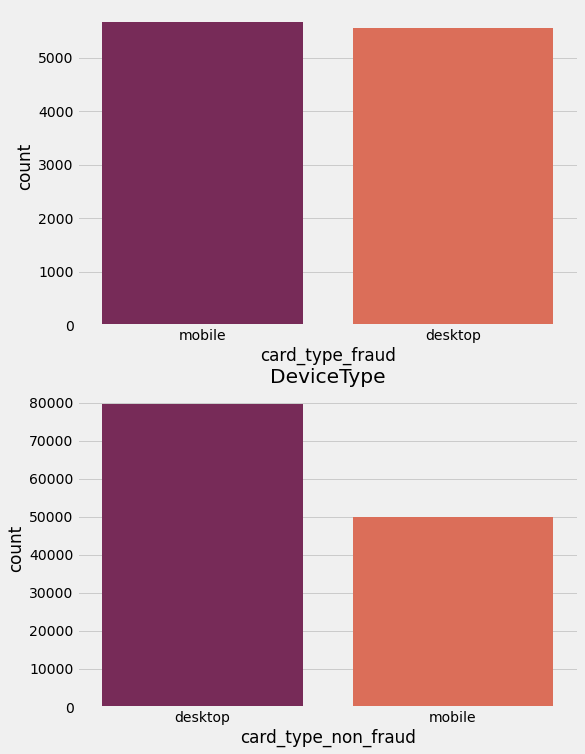

In [67]:
analysis_cat('DeviceType',3,fig_r=8,fig_c=12)

DeviceInfo

Missing data in  DeviceInfo :  79.906 %
Count of  DeviceInfo types for fraud and non-fraud


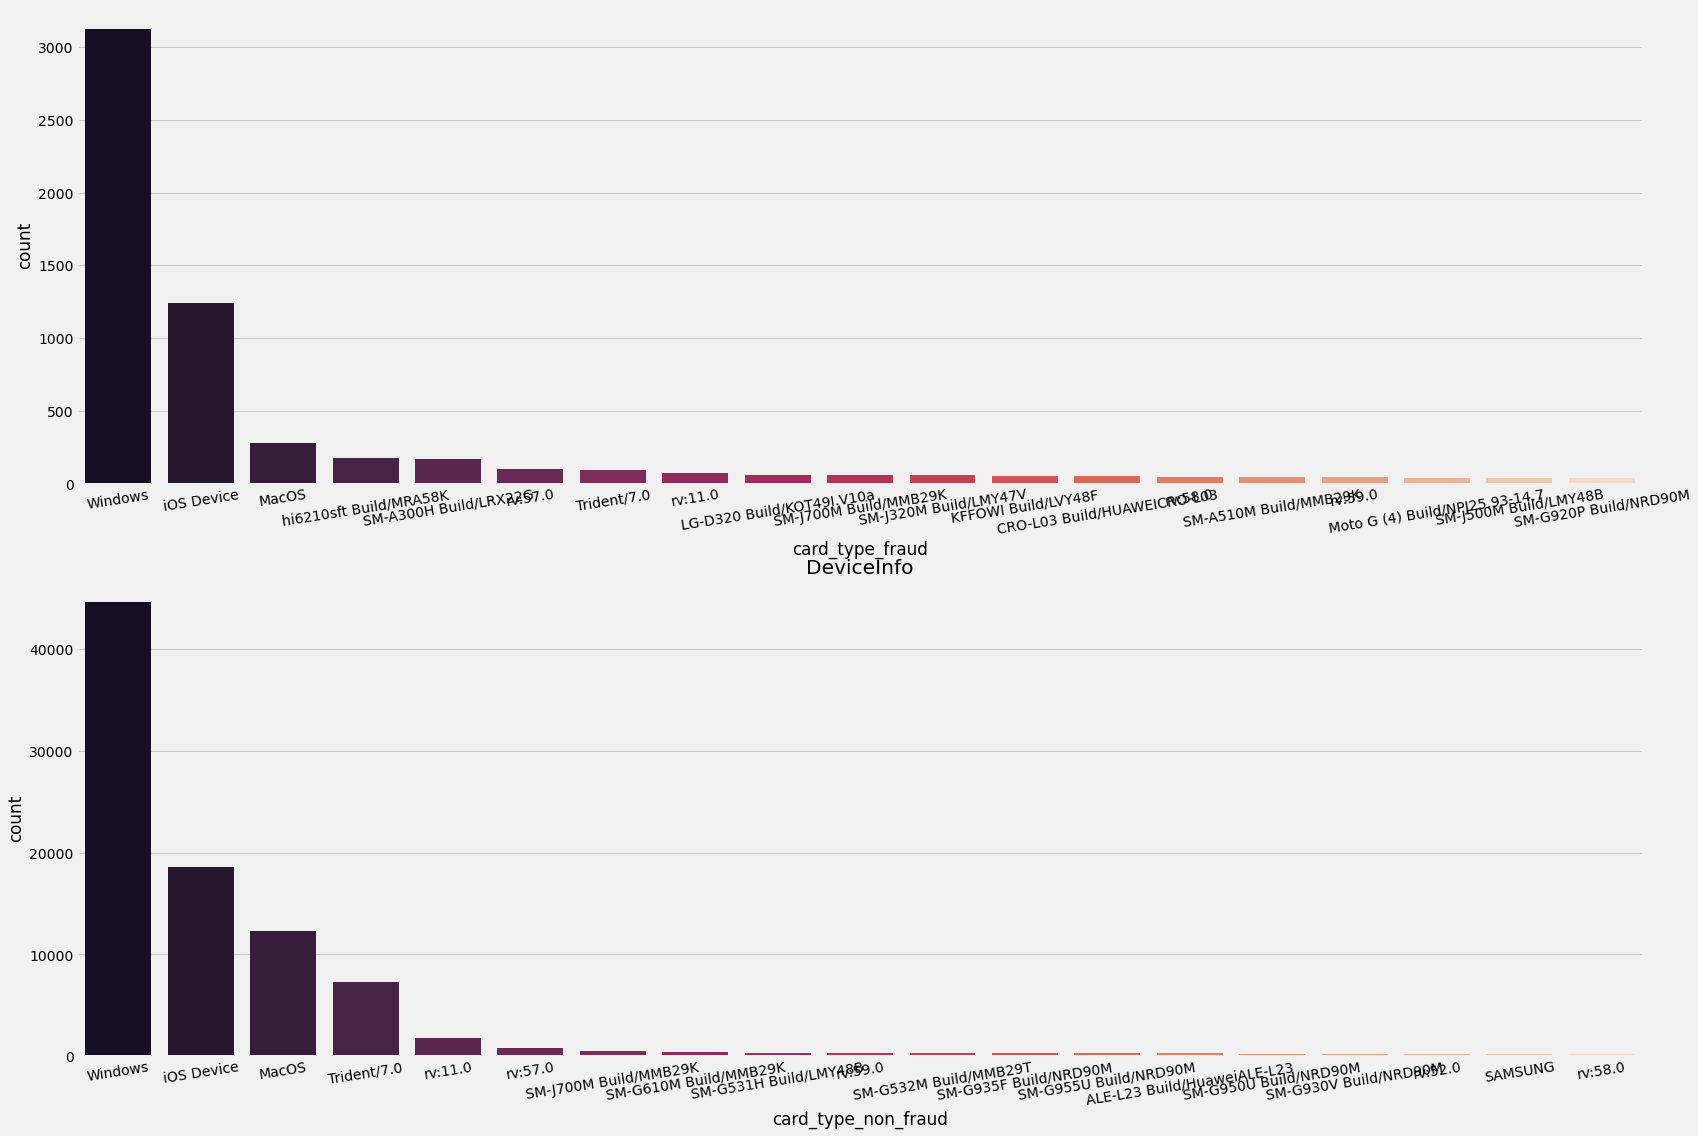

In [68]:
analysis_cat('DeviceInfo',20,fig_r=25,fig_c=18,rotate=9)



# Missing values

In [69]:
#Columns id_01 - id_38 of the train dataset is represented as id-02 - id_38.Hence, we convert the column names to make them similar
test.rename(columns={'id-01':'id_01','id-02':'id_02','id-03':'id_03','id-04':'id_04','id-05':'id_05','id-06':'id_06',
                     'id-07':'id_07','id-08':'id_08','id-09':'id_09','id-10':'id_10','id-11':'id_11','id-12':'id_12',
                     'id-13':'id_13','id-14':'id_14','id-15':'id_15','id-16':'id_16','id-17':'id_17','id-18':'id_18',
                     'id-19':'id_19','id-20':'id_20','id-21':'id_21','id-22':'id_22','id-23':'id_23','id-24':'id_24',
                     'id-25':'id_25','id-26':'id_26','id-27':'id_27','id-28':'id_28','id-29':'id_29','id-30':'id_30',
                     'id-31':'id_31','id-32':'id_32','id-33':'id_33','id-34':'id_34','id-35':'id_35','id-36':'id_36',
                     'id-37':'id_37','id-38':'id_38'},inplace=True)

In [70]:
#Categorical features
obj_train=[]
for t in train.columns:
    if(train[t].dtype=='O'):
        obj_train.append(t)
    
obj_test=[]
for t in test.columns:
    if(test[t].dtype=='O'):
        obj_test.append(t)

#Numerical features
num_train=[]
for t in train.columns:
    if(train[t].dtype!='O'):
        num_train.append(t)
        
num_test=[]
for t in test.columns:
    if(test[t].dtype!='O'):
        num_test.append(t)

In [71]:
print('Count of Numerical Features: ',len(num_train))
print('Count of Categorical Features: ',len(obj_train))

Count of Numerical Features:  403
Count of Categorical Features:  31


In [72]:
#Missing values in categorical features(in percentage)
print('Categorical features with their missing values')
train[obj_train].isna().sum()/len(train[obj_train])*100

Categorical features with their missing values


ProductCD         0.000000
card4             0.267044
card6             0.266028
P_emaildomain    15.994852
R_emaildomain    76.751617
M1               45.907136
M2               45.907136
M3               45.907136
M4               47.658753
M5               59.349409
M6               28.678836
M7               58.635317
M8               58.633115
M9               58.633115
id_12            75.576083
id_15            76.126088
id_16            78.098012
id_23            99.124699
id_27            99.124699
id_28            76.127273
id_29            76.127273
id_30            86.865411
id_31            76.245132
id_33            87.589494
id_34            86.824771
id_35            76.126088
id_36            76.126088
id_37            76.126088
id_38            76.126088
DeviceType       76.155722
DeviceInfo       79.905510
dtype: float64

In [73]:
train[obj_train]=train[obj_train].fillna('Unknown')
test[obj_test]=test[obj_test].fillna('Unknown')

In [74]:
le=LabelEncoder()
for col in obj_train:
    train[col]=le.fit_transform(train[col])
    test[col]=le.fit_transform(test[col])

In [75]:
#Missing values in numerical features(in percentage)
print('Numerical features with their missing values')
train[num_train].isna().sum()/len(train[num_train])*100

Numerical features with their missing values


TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card5              0.721204
addr1             11.126427
addr2             11.126427
dist1             59.652352
dist2             93.628374
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.214888
D2                47.549192
D3                44.514851
D4                28.604667
D5                52.467403
D6                87.606767
D7                93.409930
D8                87.312290
D9                87.312290
D10               12

In [76]:
for i in num_train:
    if train[i].isnull().sum()>0:
        train[i]=train[i].fillna(train[i].min()-2)

for i in num_test:
    if test[i].isnull().sum()>0:
        test[i]=test[i].fillna(test[i].min()-2)

# LIGHTGBM

In [77]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score,roc_curve
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

In [78]:
train_new=train.drop(['isFraud','TransactionID'],axis=1)
y=train.isFraud
test_new=test.drop(['TransactionID'],axis=1)
train_Id=train.TransactionID
test_Id=test.TransactionID
train_new.shape,test_new.shape,y.shape

((590540, 432), (506691, 432), (590540,))

In [79]:
# Split into 80% training and 20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(train_new, y, test_size = 0.2, random_state = 5, stratify = y)

In [80]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((472432, 432), (118108, 432), (472432,), (118108,))

In [81]:
train_data=lgb.Dataset(X_train, label=Y_train)

In [82]:
param = {'num_leaves': 500,
          'min_child_weight': 0.2,
          'feature_fraction': 0.4,
          'bagging_fraction': 0.4,
          'min_data_in_leaf': 100,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.05,
          "metric": 'auc',
          "bagging_seed": 12,
          "verbosity": -1,
          'random_state': 42,
          'reg_alpha': 0.4,
          'reg_lambda': 0.4,
         }

#training our model using light gbm
num_round=500
lgbm=lgb.train(param,train_data,num_round)

In [83]:
test_pred_lgbm = lgbm.predict(test_new)

In [84]:
final_dict_lgbm = {'TransactionID' : test_Id, 'isFraud': test_pred_lgbm}
Result_lgbm = pd.DataFrame(final_dict_lgbm)

In [85]:
Result_lgbm.head()

TransactionID   isFraud
0        3663549  0.000181
1        3663550  0.000256
2        3663551  0.000560
3        3663552  0.000513
4        3663553  0.000192

In [86]:
Result_lgbm.to_csv("Result_lgbm.csv", index = False)

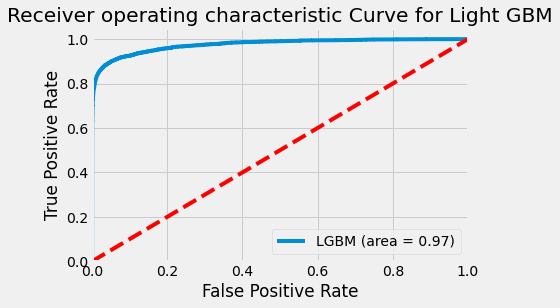

In [87]:
logit_roc_auc = roc_auc_score(Y_test, lgbm.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lgbm.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve for Light GBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

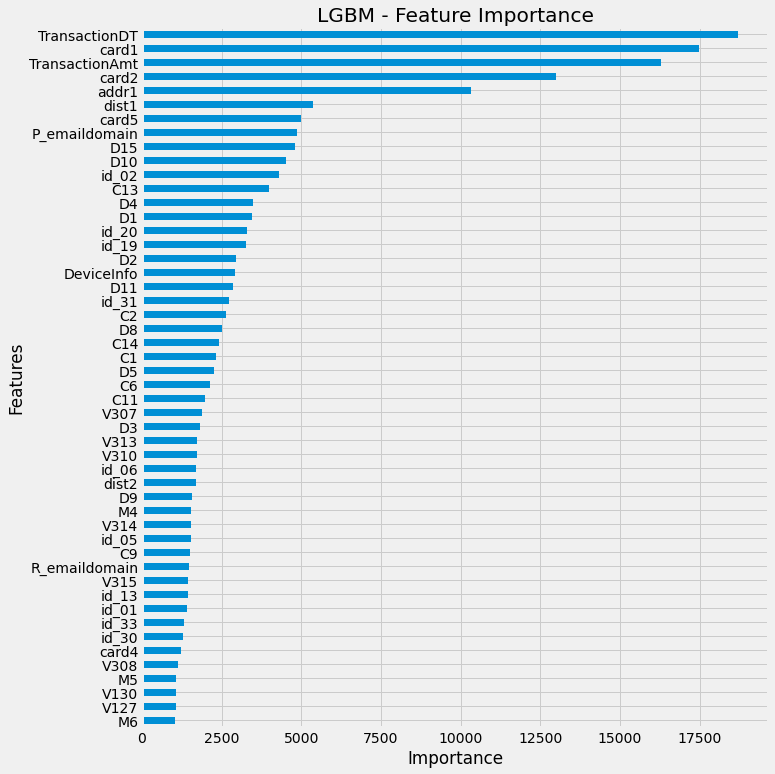

In [88]:
fea_imp = pd.DataFrame({'imp': lgbm.feature_importance(), 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 12), legend=None)
plt.title('LGBM - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [89]:
top_50_features_lgbm = fea_imp.col.values

print('*'*75)
print('Top 50 features: ')
print('*'*75)
print(top_50_features_lgbm)

***************************************************************************
Top 50 features: 
***************************************************************************
['M6' 'V127' 'V130' 'M5' 'V308' 'card4' 'id_30' 'id_33' 'id_01' 'id_13'
 'V315' 'R_emaildomain' 'C9' 'id_05' 'V314' 'M4' 'D9' 'dist2' 'id_06'
 'V310' 'V313' 'D3' 'V307' 'C11' 'C6' 'D5' 'C1' 'C14' 'D8' 'C2' 'id_31'
 'D11' 'DeviceInfo' 'D2' 'id_19' 'id_20' 'D1' 'D4' 'C13' 'id_02' 'D10'
 'D15' 'P_emaildomain' 'card5' 'dist1' 'addr1' 'card2' 'TransactionAmt'
 'card1' 'TransactionDT']


# VIF

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = train[top_50_features_lgbm].columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(train[top_50_features_lgbm].values, i) 
                          for i in range(len(train[top_50_features_lgbm].columns))] 

In [91]:
top_50_features_vif=vif_data.sort_values(by='VIF',ascending=False)[21:]

print('*'*50)
print('Top features(TOP 50 from LIGHTGBM) with VIF<11 ')
print('*'*50)
print(top_50_features_vif)

**************************************************
Top features(TOP 50 from LIGHTGBM) with VIF<11 
**************************************************
           feature        VIF
15              M4  10.570077
10            V315  10.451822
12              C9   9.520164
30           id_31   9.308110
35           id_20   8.525743
9            id_13   8.459513
45           addr1   8.030545
34           id_19   7.817933
20            V313   6.851403
46           card2   6.117609
0               M6   5.305133
48           card1   5.115267
19            V310   4.734208
41             D15   4.618710
2             V130   4.336896
14            V314   4.284881
49   TransactionDT   3.934144
40             D10   3.067499
42   P_emaildomain   2.714701
39           id_02   2.645764
11   R_emaildomain   2.591815
37              D4   2.451752
31             D11   1.989828
25              D5   1.566420
21              D3   1.533740
47  TransactionAmt   1.430414
28              D8   1.422470
44        

In [92]:
#Selecting top features(TOP 50 from LIGHTGBM) with VIF<11 
train_n=train[top_50_features_vif.feature]
test_n=test[top_50_features_vif.feature]
y_n=train.isFraud

print('Shape of new train set with features with VIF<11: ',train_n.shape)
print('Shape of new train set with features with VIF<11: ',test_n.shape)
print('Shape of label(isFraud): ',y_n.shape)

Shape of new train set with features with VIF<11:  (590540, 29)
Shape of new train set with features with VIF<11:  (506691, 29)
Shape of label(isFraud):  (590540,)


# FEATURE ENGINEERING

In [93]:
#TransactionDT
train_n['TransactionDT_minutes']=train_n['TransactionDT']/60
train_n['TransactionDT_hours']=train_n['TransactionDT']/(60*60)
train_n['TransactionDT_days']=train_n['TransactionDT']/(60*60*24)
train_n['TransactionDT_week']=train_n['TransactionDT']/(60*60*24*7)
train_n['TransactionDT_month']=train_n['TransactionDT']/(60*60*24*30)

test_n['TransactionDT_minutes']=test_n['TransactionDT']/60
test_n['TransactionDT_hours']=test_n['TransactionDT']/(60*60)
test_n['TransactionDT_days']=test_n['TransactionDT']/(60*60*24)
test_n['TransactionDT_week']=test_n['TransactionDT']/(60*60*24*7)
test_n['TransactionDT_month']=test_n['TransactionDT']/(60*60*24*30)

#card1,card2
train_n['TransactionAmt_by_mean_card_1']=train_n['TransactionAmt']/train_n.groupby(['card1'])['TransactionAmt'].transform('mean')
train_n['TransactionAmt_by_mean_card_2']=train_n['TransactionAmt']/train_n.groupby(['card2'])['TransactionAmt'].transform('mean')

test_n['TransactionAmt_by_mean_card_1']=test_n['TransactionAmt']/test_n.groupby(['card1'])['TransactionAmt'].transform('mean')
test_n['TransactionAmt_by_mean_card_2']=test_n['TransactionAmt']/test_n.groupby(['card2'])['TransactionAmt'].transform('mean')

#Log feature 
train_n['TransactionAmt_log']=np.log(train_n['TransactionAmt'])
test_n['TransactionAmt_log']=np.log(test_n['TransactionAmt'])

#TransactionAmt features
train_n['TransactionAmt_by_minutes']=train_n['TransactionAmt']/train_n['TransactionDT_minutes']
train_n['TransactionAmt_by_hours']=train_n['TransactionAmt']/train_n['TransactionDT_hours']
train_n['TransactionAmt_by_days']=train_n['TransactionAmt']/train_n['TransactionDT_days']
train_n['TransactionAmt_by_week']=train_n['TransactionAmt']/train_n['TransactionDT_week']
train_n['TransactionAmt_by_month']=train_n['TransactionAmt']/train_n['TransactionDT_month']

test_n['TransactionAmt_by_minutes']=test_n['TransactionAmt']/test_n['TransactionDT_minutes']
test_n['TransactionAmt_by_hours']=test_n['TransactionAmt']/test_n['TransactionDT_hours']
test_n['TransactionAmt_by_days']=test_n['TransactionAmt']/test_n['TransactionDT_days']
test_n['TransactionAmt_by_week']=test_n['TransactionAmt']/test_n['TransactionDT_week']
test_n['TransactionAmt_by_month']=test_n['TransactionAmt']/test_n['TransactionDT_month']

#Creating Unique_id of clients
train_n['unique_id_1']=train_n['card1'].astype(str)+'_'+train_n['card2'].astype(str)
train_n['unique_id_2']=train_n['unique_id_1'].astype(str)+'_'+train_n['addr1'].astype(str)
train_n['unique_id_3']=train_n['unique_id_2'].astype(str)+'_'+train_n['P_emaildomain'].astype(str)
train_n['unique_id_4']=train_n['unique_id_3'].astype(str)+'_'+train_n['R_emaildomain'].astype(str)

test_n['unique_id_1']=test_n['card1'].astype(str)+'_'+test_n['card2'].astype(str)
test_n['unique_id_2']=test_n['unique_id_1'].astype(str)+'_'+test_n['addr1'].astype(str)
test_n['unique_id_3']=test_n['unique_id_2'].astype(str)+'_'+test_n['P_emaildomain'].astype(str)
test_n['unique_id_4']=test_n['unique_id_3'].astype(str)+'_'+test_n['R_emaildomain'].astype(str)


train_n['unique_id_1_value_count']=train_n.unique_id_1.map(train_n.unique_id_1.value_counts().to_dict())
train_n['unique_id_2_value_count']=train_n.unique_id_2.map(train_n.unique_id_2.value_counts().to_dict())
train_n['unique_id_3_value_count']=train_n.unique_id_3.map(train_n.unique_id_3.value_counts().to_dict())
train_n['unique_id_4_value_count']=train_n.unique_id_4.map(train_n.unique_id_4.value_counts().to_dict())

test_n['unique_id_1_value_count']=test_n.unique_id_1.map(test_n.unique_id_1.value_counts().to_dict())
test_n['unique_id_2_value_count']=test_n.unique_id_2.map(test_n.unique_id_2.value_counts().to_dict())
test_n['unique_id_3_value_count']=test_n.unique_id_3.map(test_n.unique_id_3.value_counts().to_dict())
test_n['unique_id_4_value_count']=test_n.unique_id_4.map(test_n.unique_id_4.value_counts().to_dict())

#Creating columns by grouping and aggregation
columns=['card1','card2','addr1','P_emaildomain','R_emaildomain','unique_id_1',
         'unique_id_2','unique_id_3','unique_id_4']
for col in columns:
    train_n[col+'_TransactionAmt_mean']=train_n.groupby(col)['TransactionAmt'].transform('mean')
    test_n[col+'_TransactionAmt_mean']=test_n.groupby(col)['TransactionAmt'].transform('mean')

#D features
for col in ['D3','D4','D5','D8','D10','D11']:
    train_n[col+'_TransactionAmt_mean']=train_n.groupby(col)['TransactionAmt'].transform('mean')
    test_n[col+'_TransactionAmt_mean']=test_n.groupby(col)['TransactionAmt'].transform('mean')
    
#Value_count feature of C columns
train_n['C9_value_count']=train_n['C9'].map(train_n['C9'].value_counts().to_dict())
test_n['C9_value_count']=test_n['C9'].map(test_n['C9'].value_counts().to_dict())
    
#Value_count feature of card1,card2,card3,card4,card5,card6,addr1,addr2,dist1.dist2,P_emaildomain,R_emaildomain columns
columns=['card1','card2','addr1','dist1','dist2','P_emaildomain','R_emaildomain']
for col in columns:
    train_n[col+'_value_count']=train_n[col].map(train_n[col].value_counts().to_dict())
    test_n[col+'_value_count']=test_n[col].map(test_n[col].value_counts().to_dict())
    
#Value_count feature of D1-15 columns
for d in ['D3','D4','D5','D8','D10','D11']:
    train_n[d+'_value_count']=train_n[d].map(train_n[d].value_counts().to_dict())
    test_n[d+'_value_count']=test_n[d].map(test_n[d].value_counts().to_dict())

#Value_count feature of id
for i in ['id_02','id_13','id_19','id_20','id_31']:
    train_n[i+'_value_count']=train_n[i].map(train_n[i].value_counts().to_dict())
    test_n[i+'_value_count']=test_n[i].map(test_n[i].value_counts().to_dict())

<ipython-input-93-d4b8aaf9a6c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n['TransactionDT_minutes']=train_n['TransactionDT']/60
<ipython-input-93-d4b8aaf9a6c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n['TransactionDT_hours']=train_n['TransactionDT']/(60*60)
<ipython-input-93-d4b8aaf9a6c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<ipython-input-93-d4b8aaf9a6c2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n['unique_id_1']=train_n['card1'].astype(str)+'_'+train_n['card2'].astype(str)
<ipython-input-93-d4b8aaf9a6c2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n['unique_id_2']=train_n['unique_id_1'].astype(str)+'_'+train_n['addr1'].astype(str)
<ipython-input-93-d4b8aaf9a6c2>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

<ipython-input-93-d4b8aaf9a6c2>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n['C9_value_count']=train_n['C9'].map(train_n['C9'].value_counts().to_dict())
<ipython-input-93-d4b8aaf9a6c2>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_n['C9_value_count']=test_n['C9'].map(test_n['C9'].value_counts().to_dict())
<ipython-input-93-d4b8aaf9a6c2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [94]:
#Categorical features
red_obj=[]
for t in train_n.columns:
    if(train_n[t].dtype=='O'):
        red_obj.append(t)

In [95]:
for col in red_obj:
    train_n[col]=le.fit_transform(train_n[col])
    test_n[col]=le.fit_transform(test_n[col])

<ipython-input-95-0d61f0e4984e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_n[col]=le.fit_transform(train_n[col])
<ipython-input-95-0d61f0e4984e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_n[col]=le.fit_transform(test_n[col])


In [96]:
print('Shape of new train set after feature engineering: ',train_n.shape)
print('Shape of new train set after feature engineering: ',test_n.shape)

Shape of new train set after feature engineering:  (590540, 84)
Shape of new train set after feature engineering:  (506691, 84)


# Applying SMOTE

In [97]:
from imblearn.over_sampling import SMOTE


X = train_n
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y_n, test_size=0.3, random_state=0, stratify = y_n)
columns = X_train.columns
train_smote,y_smote=os.fit_sample(X_train, y_train)

In [98]:
print('Shape of new train set after applying SMOTE: ',train_smote.shape)
print('Shape of train label after applying SMOTE: ',y_smote.shape)

Shape of new train set after applying SMOTE:  (797828, 84)
Shape of train label after applying SMOTE:  (797828,)


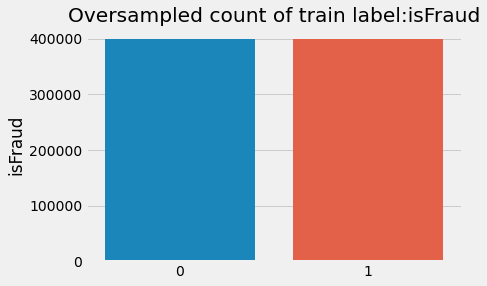

In [99]:
y=pd.DataFrame(y_smote.value_counts()).reset_index()

plt.title('Oversampled count of train label:isFraud')
sns.barplot(x=y.index,y=y.isFraud)
plt.show()

In [100]:
y_smote.head()

0    0
1    0
2    1
3    0
4    0
Name: isFraud, dtype: int8

In [101]:
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)

Shape of X_train is:  (413378, 84)
Shape of X_test is:  (177162, 84)


Reassiging the Newly created Train and Label Datasets back to the X_train and Y_train Variables¶

In [102]:
X_train = train_smote
Y_train = y_smote
Y_test = y_test

print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (797828, 84)
Shape of X_test is:  (177162, 84)
Shape of Y_train is:  (797828,)
Shape of Y_test is:  (177162,)


# LOGISTIC REGRESSION

In [103]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\sayee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
best_preds = logreg.predict_proba(X_test)[:,1]
train_preds = logreg.predict_proba(X_train)[:,1]

In [105]:
print("Train ROC-AUC Score = {}".format(roc_auc_score(Y_train, train_preds)))
print("Test ROC-AUC Score = {}".format(roc_auc_score(Y_test, best_preds)))

Train ROC-AUC Score = 0.6942371479664871
Test ROC-AUC Score = 0.6928942409139549


In [106]:
test_pred_log_reg = logreg.predict_proba(test_n)

In [107]:
Result_log_reg = pd.DataFrame()
Result_log_reg['TransactionID']=test_Id
Result_log_reg['isFraud']=test_pred_log_reg[:,1]

In [108]:
Result_log_reg.to_csv("Result_log_reg.csv", index = False)